# [1.3.1] Toy Models of Superposition & Sparse Autoencoders (exercises)

> **ARENA [Streamlit Page](https://arena-chapter1-transformer-interp.streamlit.app/11_🧬_[1.3.1]_Toy_Models_of_Superposition_&_SAEs)**
>
> **Colab: [exercises](https://colab.research.google.com/github/callummcdougall/ARENA_3.0/blob/main/chapter1_transformer_interp/exercises/part31_superposition_and_saes/1.3.1_Toy_Models_of_Superposition_&_SAEs_exercises.ipynb?t=20250423) | [solutions](https://colab.research.google.com/github/callummcdougall/ARENA_3.0/blob/main/chapter1_transformer_interp/exercises/part31_superposition_and_saes/1.3.1_Toy_Models_of_Superposition_&_SAEs_solutions.ipynb?t=20250423)**

Please send any problems / bugs on the `#errata` channel in the [Slack group](https://join.slack.com/t/arena-uk/shared_invite/zt-2zick19fl-6GY1yoGaoUozyM3wObwmnQ), and ask any questions on the dedicated channels for this chapter of material.

You can collapse each section so only the headers are visible, by clicking the arrow symbol on the left hand side of the markdown header cells.

Links to all other chapters: [(0) Fundamentals](https://arena-chapter0-fundamentals.streamlit.app/), [(1) Transformer Interpretability](https://arena-chapter1-transformer-interp.streamlit.app/), [(2) RL](https://arena-chapter2-rl.streamlit.app/).

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/headers/header-13-1.png" width="350">

# Introduction

Superposition is a crucially important concept for understanding how transformers work. A definition from Neel Nanda's glossary:

> Superposition is when a model represents more than n features in an $n$-dimensional activation space. That is, features still correspond to directions, but **the set of interpretable directions is larger than the number of dimensions**.

Why should we expect something like this to happen? In general, the world has way more features than the model has dimensions of freedom, and so we can't have a one-to-one mapping between features and values in our model. But the model has to represent these features somehow. Hence, it comes up with techniques for cramming multiple features into fewer dimensions (at the cost of adding noise and interference between features).

In these exercises, feel free to skip sections liberally. Specifically, we recommend skipping sections 3️⃣ and 4️⃣ unless you're particularly interested in exploring those topics in depth. If your goal is to get quickly to the cutting edge of SAE research without spending too much time wading through the theory, you can jump directly to section 0️⃣ in 1.3.2 (which offers a compressed version of sections 1️⃣, 2️⃣ and 5️⃣ in this material, before moving on to studying SAEs in actual LLMs).

Unlike many other topics in this chapter, there's quite a bit of theory which needs to be understood before we start making inferences from the results of our coding experiments. A key point to make here is that, perhaps more so than any other section in this chapter, we really don't understand superposition that well at all! It's hard to point to the seminal work in this field because we don't really know what the critical new insights will look like. That being said, we hope this material gives you enough directions to pursue when you're finished!

## Reading Material

* [200 COP in MI: Exploring Polysemanticity and Superposition](https://www.alignmentforum.org/posts/o6ptPu7arZrqRCxyz/200-cop-in-mi-exploring-polysemanticity-and-superposition), <b>15 mins</b>
    * Read the post, up to and including "Tips" (although some parts of it might make more sense after you've read the other things here).
* Neel Nanda's [Dynalist notes on superposition](https://dynalist.io/d/n2ZWtnoYHrU1s4vnFSAQ519J#z=3br1psLRIjQCOv2T4RN3V6F2), <b>10 mins</b>
    * These aren't long, you should skim through them, and also use them as a reference during these exercises.
* Anthropic's [Toy Models of Superposition](https://transformer-circuits.pub/2022/toy_model/index.html), <b>20 mins</b>
    * You should read up to & including the "Summary: A Hierarchy of Feature Properties" section.
    * The first few sections ("Key Results", "Definitions and Motivation", and "Empirical Phenomena" are particularly important).
    * We'll also be going through other parts of this paper as we work through the exercises.

## Content & Learning Objectives

### 1️⃣ Toy Models of Superposition: Superposition in a Nonprivileged Basis

In this section, you'll cover the basics of Anthropic's toy models of superposition. You'll learn through examples what superposition is, why it happens, and why it presents a problem for interpreting neural networks.

> ##### Learning Objectives
>
> - Understand the concept of superposition, and how it helps models represent a larger set of features
> - Understand the difference between superposition and polysemanticity
> - Learn how sparsity contributes to superposition
> - Understand the idea of the feature importance curve
> - Learn how feature correlation changes the nature and degree of superposition

### 2️⃣ Toy Models of Superposition: Superposition in a Privileged Basis

Superposition in a privileged basis is a bit different than a nonprivileged basis. Firstly, the model has a tendency to align more with the basis directions (even though it often needs some degree of misalignment in order to represent all features). Secondly, many privileged bases are privileged because they are performing some kind of computation on their inputs, rather than just storing representations, so it's important to understand how our model is able to perform this computation.

> ##### Learning Objectives
>
> - Understand the difference between neuron vs bottleneck superposition (or computational vs representational superposition)
> - Learn how models can perform computation in superposition, via the example `f(x) = abs(x)`

### 3️⃣ Feature Geometry

The section takes a slightly deeper dive into the geometry of superposition. It's not as essential as any exercises from the previous three sections, but should still be of interest and worth doing if you have time, or just want to dive more deeply into superposition. We cover **dimensionality** (a measure of how much capacity the model is affording to a single feature), and relate this metric to the forming of increasingly complex geometric structures.

> ##### Learning Objectives
>
> - Learn about *dimensionality*, which essentially measures what fraction of a dimension is allocated to a specific feature
> - Understand the geometric intuitions behind superposition, and how they relate to the more general ideas of superposition in larger models

### 4️⃣ Superposition & Deep Double Descent

Deep Double Descent is a long observed phenomena in deep learning, wherein the model's performance on a task first improves with model size, then plateaus, then starts to decrease again with further increases in model size. The plateau is in line with the predictions of classical statistics (i.e. model overfitting), but the further decrease isn't. Anthropic's paper on deep double descent connects this phenomenon to the idea of superposition, essentially arguing that the two scaling phases represent a memorizing solution and a generalizing solution respectively, with the first characterized by representing *datapoints* in superposition, the second by representing *features* in superposition.

This section guides you through a replication of this paper's key results. Relative to the other material here, this is quite unguided, so we recommend you treat it more as an optional extension than an exercise on the core pathway for today.

> ##### Learning Objectives
>
> - Understand and characterise the deep double descent phenomena
> - Relate the different phases of double descent to the idea of superposition
> - Practice replicating results from a paper in a more unguided way

### 5️⃣ Sparse Autoencoders in Toy Models

In this last section, you'll learn about sparse autoencoders, and how they might help us resolve problems of superposition. You'll train a sparse autoencoder on the toy model setup from earlier sections, and you'll also implement techniques like neuron resampling and different architectures (e.g. the Gated architecture from [DeepMind's paper](https://deepmind.google/research/publications/88147/)).

> ##### Learning Objectives
>
> - Learn about sparse autoencoders, and how they might be used to disentangle features represented in superposition
> - Train your own SAEs on the toy models from earlier sections, and visualise the feature reconstruction process
> - Understand important SAE training strategies (e.g. resampling) and architecture variants (e.g. Gated, Jump ReLU)

### ☆ Bonus

We end with a section of suggested bonus material & paper replications, like usual.

## Questions

Here are a set of questions (with some brief answers provided) which you should be able to answer for yourself after reading the above material. Search for them on Neel's Dynalist notes if you didn't come across them during your reading.

What is a **privileged basis**? Why should we expect neuron activations to be privileged by default? Why *shouldn't* we expect the residual stream to be privileged?

<details>
<summary>Answer</summary>

A privileged basis is one where the **standard basis directions are meaningful** (due to the structure of computation being done on that basis). This doesn't necessarily mean that the basis is interpretable.

**Neurons**

Neuron activations are privileged because of the **elementwise nonlinear function that gets applied**. ReLU is easily described in the standard basis, e.g. in 2D:

$$\begin{bmatrix} x \\ y \end{bmatrix} \to \begin{bmatrix} \max(x, 0) \\ \max(y, 0) \end{bmatrix}$$

but if you redefine a basis $x' = (x+y)/\sqrt{2}$, $y' = (x-y)/\sqrt{2}$, then describing ReLU in this new basis becomes really messy. More importantly, we now get interference between the components $x'$ and $y'$, i.e. the ReLU is no longer acting on them independently.

$$\begin{bmatrix} x' \\ y' \end{bmatrix} \to \frac{1}{\sqrt{2}} \begin{bmatrix} \max(x, 0) + \max(y, 0) \\ \max(x, 0) - \max(y, 0) \end{bmatrix} = \frac{1}{2} \begin{bmatrix} \max(x'+y', 0) + \max(x'-y', 0) \\ \max(x'+y', 0) - \max(x'-y', 0) \end{bmatrix}$$

**Residual stream**

The residual stream is not privileged because anything that reads from it and writes to it uses a linear map. As a thought experiment, if we changed all the writing matrices (i.e. $W_{out}$ in the MLP layers and $W_O$ in the attention layers) to $W \to W R$, and all the reading matrices (i.e. $W_{in}$ in the MLP layers and $W_Q$, $W_K$, $W_V$ in the attention layers) to $W \to W R^{-1}$ where $R$ is some arbitrary rotation matrix, then the model's computation would be unchanged. Since the matrix $R$ is arbitrary, it can change the basis in any way it wants, so that basis can't be privileged.

To put this another way - if you claimed "I think the 47th element of the residual stream encoded some special information e.g. the plurality of the noun at that sequence position", I could call bullshit on your claim, because this thought experiment shows that any basis direction could just as easily be rotated & distributed as a linear combination of several different basis directions without fundamentally changing the computation done by the transformer. The same does not apply to neurons, because a rotation / change of basis would change the nature of computation done on them.

**Summary**

**Something is a privileged basis if it is not rotation-independent**, i.e. the nature of computation done on it means that the **basis directions have some special significance.**

Common misconception: privileged basis is equivalent to interpretable basis. This is **NOT true** (although it is the case that a basis must be privileged if the individual basis directions have some interpretable meaning; this is necessary but not sufficient).

</details>

What is the difference between **superposition** and **polysemanticity**?

<details>
<summary>Answer</summary>

Polysemanticity happens when one neuron corresponds to multiple features (see [here](https://distill.pub/2020/circuits/zoom-in/#:~:text=lot%20of%20effort.-,Polysemantic%20Neurons,-This%20essay%20may) for more discussion & examples). If we only had polysemanticity, this wouldn't really be a problem for us (there might exist a basis for features s.t. each basis vector corresponds to a single feature).

Superposition is when there are **more features than dimensions**. So it implies polysemanticity (because we must have dimensions representing more than one feature), but the converse is not true.

</details>


What are the **importance** and **sparsity** of features? Do you expect more or less polysemantic neurons if sparsity is larger?

<details>
<summary>Answer</summary>

**Importance** = how useful is this feature for achieving lower loss?

**Sparsity** = how frequently is it in the input data?

If sparsity is larger, then we expect more polysemantic neurons. This is because a single neuron can afford to represent several different sparse features (usually it'll only be representing one of them at any given time, so there won't be interference).
</details>

How would you define a **feature**?

<details>
<summary>Answer</summary>

There's no single correct answer to this. Many of the definitions are unfortunately circular (e.g. "a feature is a thing which could be represented by a neuron"). A few possible definitions are this one from Neel's [Dynalist notes](https://dynalist.io/d/n2ZWtnoYHrU1s4vnFSAQ519J#q=feature):

> A feature is a property of an input to the model, or some subset of that input (eg a token in the prompt given to a language model, or a patch of an image).

or this similar one from Chris Olah's [Distill circuits Thread](https://distill.pub/2020/circuits/zoom-in/):

> A feature is a a scalar function of the input. In this essay, neural network features are directions, and often simply individual neurons. We claim such features in neural networks are typically meaningful features which can be rigorously studied. A **meaningful feature** is one that genuinely responds to an articulable property of the input, such as the presence of a curve or a floppy ear.
</details>

## Setup (don't read, just run)

In [1]:
import os
import sys
from pathlib import Path

IN_COLAB = "google.colab" in sys.modules

chapter = "chapter1_transformer_interp"
repo = "ARENA_3.0"
branch = "main"

# Install dependencies
try:
    import transformer_lens
except:
    %pip install einops datasets jaxtyping "sae_lens>=3.23.1" tabulate eindex-callum transformer_lens==2.11.0
    %pip install --force-reinstall numpy pandas

# Get root directory, handling 3 different cases: (1) Colab, (2) notebook not in ARENA repo, (3) notebook in ARENA repo
root = (
    "/content"
    if IN_COLAB
    else "/root"
    if repo not in os.getcwd()
    else str(next(p for p in Path.cwd().parents if p.name == repo))
)

if Path(root).exists() and not Path(f"{root}/{chapter}").exists():
    if not IN_COLAB:
        !sudo apt-get install unzip
        %pip install jupyter ipython --upgrade

    if not os.path.exists(f"{root}/{chapter}"):
        !wget -P {root} https://github.com/callummcdougall/ARENA_3.0/archive/refs/heads/{branch}.zip
        !unzip {root}/{branch}.zip '{repo}-{branch}/{chapter}/exercises/*' -d {root}
        !mv {root}/{repo}-{branch}/{chapter} {root}/{chapter}
        !rm {root}/{branch}.zip
        !rmdir {root}/{repo}-{branch}


if f"{root}/{chapter}/exercises" not in sys.path:
    sys.path.append(f"{root}/{chapter}/exercises")

os.chdir(f"{root}/{chapter}/exercises")

In [2]:
import sys
from collections import defaultdict
from dataclasses import dataclass
from pathlib import Path
from typing import Any, Callable, Literal

import einops
import numpy as np
import pandas as pd
import plotly.express as px
import torch as t
from IPython.display import HTML, display
from jaxtyping import Float
from torch import Tensor, nn
from torch.distributions.categorical import Categorical
from torch.nn import functional as F
from tqdm.auto import tqdm
import torch

device = t.device("mps" if t.backends.mps.is_available() else "cuda" if t.cuda.is_available() else "cpu")

# Make sure exercises are in the path
chapter = "chapter1_transformer_interp"
section = "part31_superposition_and_saes"
root_dir = next(p for p in Path.cwd().parents if (p / chapter).exists())
exercises_dir = root_dir / chapter / "exercises"
section_dir = exercises_dir / section

import part31_superposition_and_saes.tests as tests
import part31_superposition_and_saes.utils as utils
from plotly_utils import imshow, line

MAIN = __name__ == "__main__"

# 1️⃣ TMS: Superposition in a Nonprivileged Basis

> ##### Learning Objectives
>
> - Understand the concept of superposition, and how it helps models represent a larger set of features
> - Understand the difference between superposition and polysemanticity
> - Learn how sparsity contributes to superposition
> - Understand the idea of the feature importance curve
> - Learn how feature correlation changes the nature and degree of superposition

## Toy Model setup

In this section, we'll be examining & running experiments on the toy model studied in [Anthropic's paper](https://transformer-circuits.pub/2022/toy_model/index.html).

You can follow along with the paper from the [Demonstrating Superposition](https://transformer-circuits.pub/2022/toy_model/index.html#demonstrating) section onwards; it will approximately follow the order of the sections in this notebook.

This paper presented a very rudimentary model for **bottleneck superposition** - when you try and represent more than $n$ features in a vector space of dimension $n$. The model is as follows:

* We take a 5-dimensional input $x$
* We map it down into 2D space
* We map it back up into 5D space (using the transpose of the first matrix)
* We add a bias and ReLU

$$
\begin{aligned}
h &= W x \\
x' &= \operatorname{ReLU}(W^T h + b)
\end{aligned}
$$

### What's the motivation for this setup?

The input $x$ represents our five features (they're uniformly sampled between 0 and 1).

Each feature can have **importance** and **sparsity**. Recall our earlier definitions:

* **Importance** = how useful is this feature for achieving lower loss?
* **Sparsity** = how frequently is it in the input data?

This is realised in our toy model as follows:

* **Importance** = the coefficient on the weighted mean squared error between the input and output, which we use for training the model
    * In other words, our loss function is $L = \sum_x \sum_i I_i (x_i - x_i^\prime)^2$, where $I_i$ is the importance of feature $i$.
* **Sparsity** = the probability of the corresponding element in $x$ being zero
    * In other words, this affects the way our training data is generated (see the method `generate_batch` in the `Module` class below)
    * We often refer to **feature probability** (1 minus sparsity) rather than sparsity

The justification for using $W^T W$ is as follows: we can think of $W$ (which is a matrix of shape `(2, 5)`) as a grid of "overlap values" between the features and bottleneck dimensions. The values of the 5x5 matrix $W^T W$ are the dot products between the 2D representations of each pair of features. To make this intuition clearer, imagine each of the columns of $W$ were unit vectors, then $W^T W$ would be a matrix of cosine similarities between the features (with diagonal elements equal to 1, because the similarity of a feature with itself is 1). To see this for yourself:

In [3]:
t.manual_seed(2)

W = t.randn(2, 5)
W_normed = W / W.norm(dim=0, keepdim=True)

imshow(
    W_normed.T @ W_normed,
    title="Cosine similarities of each pair of 2D feature embeddings",
    width=600,
)

To put it another way - if the columns of $W$ were orthogonal, then $W^T W$ would be the identity. This can't actually be the case because $W$ is a 2x5 matrix, but its columns can be "nearly orthgonal" in the sense of having pairwise cosine similarities close to 0.

<details>
<summary>Question - can you prove that <code>W.T @ W</code> can't be the identity when <code>W</code> has more columns than rows (or alternatively, when the hidden dimension is strictly smaller than the input dimension)?</summary>

Proof #1: the rank of a matrix product $AB$ is upper-bounded by the maximum of the two factors $A$ and $B$. In the case of $W^T W$, both matrices have rank at most 2, so the product has rank at most 2.

Proof #2: for any vector $x$, $W^T W x = W^T (Wx)$ is in the span of the columns of $W^T$, which is vector space with rank 2.

</details>

Another nice thing about using two bottleneck dimensions is that we get to visualise our output! We've got a few helper functions for this purpose.

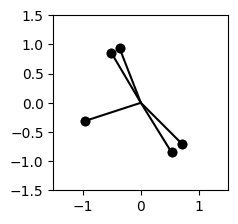

In [9]:
utils.plot_features_in_2d(
    W_normed.unsqueeze(0),  # shape [instances=1 d_hidden=2 features=5]
)

Compare this plot to the `imshow` plot above, and make sure you understand what's going on here (and how the two plots relate to each other). A lot of the subsequent exercises run with this idea of a geometric interpretation of the model's features and bottleneck dimensions.

<details>
<summary>Help - I'm confused about how these plots work.</summary>

As mentioned, you can view $W$ as being a set of five 2D vectors, one for each of our five features. The heatmap shows us the cosine similarities between each pair of these vectors, and the second plot shows us these five vectors in 2D space.

In the example above, we can see two pairs of vectors (the 1st & 2nd, and the 0th & 4th) have very high cosine similarity. This is reflected in the 2D plot, where these features are very close to each other (the 0th feature is the darkest color, the 4th feature is the lightest).

</details>

### Defining our model

Below is some code for your model (with most methods not filled out yet). It should be familiar to you if you've already built simple neural networks earlier in this course.

Some notes on the initialization method, which is filled out for you:

#### Weights & instances

The `Config` class has an `n_inst` class. This is so we can optimize multiple models at once in a single training loop (this'll be useful later on). You should treat this as basically like a batch dimension for your weights: each of your weights/biases will actually be `n_inst` separate weights/biases stacked along the zeroth dimension, and each of these will be trained independently, on different data, in parallel (using the same optimizer).

We initialize weights `W` and `b_final`, which correspond to $W$ and $b$ in the Anthropic paper.

#### Sparsity & Importance

The `feature_probability` argument tells us the probability that any given feature will be active. We have the relation  `feature_probability = 1 - sparsity`. We'll often be dealing with very small feature probabilities $p = 1 - S \approx 0$, i.e. sparsities close to 1. The feature probability is used to generate our training data; the importance is used in our loss function (see later for both of these). The default is `feature_probability = 0.01`, i.e. each feaure is present with probability 1%.

The `importance` argument is used when calculating loss (see later exercise). The default is `importance = None` which results in uniform importance.

In the `__init__` method, we have code to broadcast `feature_probability` and `importance`, so that by the end they both always have shape `(n_inst, n_features)`.

### Exercise - implement `forward`

> ```yaml
> Difficulty: 🔴🔴⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 10-20 minutes on this exercise.
> ```

For now, you just need to fill in the `forward` method. As the exercises go on, you'll fill in some more of these functions, but for now you can ignore the others.

In [4]:
def linear_lr(step, steps):
    return 1 - (step / steps)


def constant_lr(*_):
    return 1.0


def cosine_decay_lr(step, steps):
    return np.cos(0.5 * np.pi * step / (steps - 1))


@dataclass
class ToyModelConfig:
    # We optimize n_inst models in a single training loop to let us sweep over sparsity or importance
    # curves efficiently. You should treat the number of instances `n_inst` like a batch dimension,
    # but one which is built into our training setup. Ignore the latter 3 arguments for now, they'll
    # return in later exercises.
    n_inst: int
    n_features: int = 5
    d_hidden: int = 2
    n_correlated_pairs: int = 0
    n_anticorrelated_pairs: int = 0
    feat_mag_distn: Literal["unif", "normal"] = "unif"


class ToyModel(nn.Module):
    W: Float[Tensor, "inst d_hidden feats"]
    b_final: Float[Tensor, "inst feats"]

    # Our linear map (for a single instance) is x -> ReLU(W.T @ W @ x + b_final)

    def __init__(
        self,
        cfg: ToyModelConfig,
        feature_probability: float | Tensor = 0.01,
        importance: float | Tensor = 1.0,
        device=device,
    ):
        super(ToyModel, self).__init__()
        self.cfg = cfg

        if isinstance(feature_probability, float):
            feature_probability = t.tensor(feature_probability)
        self.feature_probability = feature_probability.to(device).broadcast_to((cfg.n_inst, cfg.n_features))
        if isinstance(importance, float):
            importance = t.tensor(importance)
        self.importance = importance.to(device).broadcast_to((cfg.n_inst, cfg.n_features))

        self.W = nn.Parameter(nn.init.xavier_normal_(t.empty((cfg.n_inst, cfg.d_hidden, cfg.n_features))))
        self.b_final = nn.Parameter(t.zeros((cfg.n_inst, cfg.n_features)))
        self.to(device)

    def forward(
        self,
        features: Float[Tensor, "... inst feats"],
    ) -> Float[Tensor, "... inst feats"]:
        """
        Performs a single forward pass. For a single instance, this is given by:
            x -> ReLU(W.T @ W @ x + b_final)
        """
        x_proj = torch.einsum("nhf,bnf->nbh", self.W, features)
        x = torch.einsum("nhf,nbh->bnf", self.W, x_proj)
        return F.relu(x + self.b_final)

    def generate_batch(self, batch_size: int) -> Float[Tensor, "batch inst feats"]:
        """
        Generates a batch of data of shape (batch_size, n_instances, n_features).
        """
        features = torch.bernoulli(self.feature_probability.unsqueeze(0).expand(batch_size, -1, -1))
        return features * torch.zeros_like(features).uniform_()

    def calculate_loss(
        self,
        out: Float[Tensor, "batch inst feats"],
        batch: Float[Tensor, "batch inst feats"],
    ) -> Float[Tensor, ""]:
        """
        Calculates the loss for a given batch (as a scalar tensor), using this loss described in the
        Toy Models of Superposition paper:

            https://transformer-circuits.pub/2022/toy_model/index.html#demonstrating-setup-loss

        Note, `self.importance` is guaranteed to broadcast with the shape of `out` and `batch`.
        """
        # You'll fill this in later
        loss = ((out - batch)**2 * self.importance).mean(dim=-1).mean(dim=0).sum()
        return loss

    def optimize(
        self,
        batch_size: int = 1024,
        steps: int = 5_000,
        log_freq: int = 50,
        lr: float = 1e-3,
        lr_scale: Callable[[int, int], float] = constant_lr,
    ):
        """
        Optimizes the model using the given hyperparameters.
        """
        optimizer = t.optim.Adam(list(self.parameters()), lr=lr)

        progress_bar = tqdm(range(steps))

        for step in progress_bar:
            # Update learning rate
            step_lr = lr * lr_scale(step, steps)
            for group in optimizer.param_groups:
                group["lr"] = step_lr

            # Optimize
            optimizer.zero_grad()
            batch = self.generate_batch(batch_size)
            out = self(batch)
            loss = self.calculate_loss(out, batch)
            loss.backward()
            optimizer.step()

            # Display progress bar
            if step % log_freq == 0 or (step + 1 == steps):
                progress_bar.set_postfix(loss=loss.item() / self.cfg.n_inst, lr=step_lr)


tests.test_model(ToyModel)

All tests in `test_model` passed!


<details><summary>Solution</summary>

```python
def forward(
    self,
    features: Float[Tensor, "... inst feats"],
) -> Float[Tensor, "... inst feats"]:
    """
    Performs a single forward pass. For a single instance, this is given by:
        x -> ReLU(W.T @ W @ x + b_final)
    """
    h = einops.einsum(
        features, self.W, "... inst feats, inst hidden feats -> ... inst hidden"
    )
    out = einops.einsum(
        h, self.W, "... inst hidden, inst hidden feats -> ... inst feats"
    )
    return F.relu(out + self.b_final)
```

</details>

### Exercise - implement `generate_batch`

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 10-15 minutes on this exercise.
> ```

Next, you should implement the function `generate_batch` above. This should return a tensor of shape `(n_batch, instances, features)`, where:

* The `instances` and `features` values are taken from the model config,
* Each feature is present with probability `self.feature_probability`,
* For each present feature, its **magnitude** is sampled from a uniform distribution between 0 and 1.

Make sure you understand this function well (we recommend looking at the solutions even after you pass the tests), because we'll be making more complicated versions of this function in the section on correlations.

Remember, you can assume `model.feature_probability` has shape `(n_inst, n_features)`.

When you've implemented this function, run the code below to test it.

In [32]:
# Go back up and edit your `ToyModel.generate_batch` method, then run the test below

tests.test_generate_batch(ToyModel)

All tests in `test_generate_batch` passed!


<details><summary>Solution</summary>

```python
def generate_batch(self: ToyModel, batch_size: int) -> Float[Tensor, "batch inst feats"]:
    """
    Generates a batch of data of shape (batch_size, n_instances, n_features).
    """
    batch_shape = (batch_size, self.cfg.n_inst, self.cfg.n_features)
    feat_mag = t.rand(batch_shape, device=self.W.device)
    feat_seeds = t.rand(batch_shape, device=self.W.device)
    return t.where(feat_seeds <= self.feature_probability, feat_mag, 0.0)


ToyModel.generate_batch = generate_batch
```
</details>

## Training our model

The details of training aren't very conceptually important, so we've given you most of the code for this (in the `optimize` method). We use **learning rate schedulers** to control the learning rate as the model trains - you'll use this later on during the RL chapter.

### Exercise - implement `calculate_loss`

> ```yaml
> Difficulty: 🔴🔴⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 5-10 minutes on this exercise.
> ```

You should fill in the `calculate_loss` function below. The loss function **for a single instance** is given by:

$$
L=\frac{1}{BF}\sum_x \sum_i I_i\left(x_i-x_i^{\prime}\right)^2
$$

where:

* $B$ is the batch size,
* $F$ is the number of features,
* $x_i$ are the inputs and $x_i'$ are the model's outputs,
* $I_i$ is the importance of feature $i$,
* $\sum_i$ is a sum over features,
* $\sum_x$ is a sum over the elements in the batch.

For the general case, we sum this formula over all instances.

<details>
<summary>Question - why do you think we take the mean over the feature and batch dimensions, but we sum over the instances dimension?</summary>

We take the mean over batch size because this is standard for loss functions (and means we don't have to use a different learning rate for different batch sizes).

We take the mean over the feature dimension because that's [normal for MSE loss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html).

We sum over the instances dimension because we want to train each instance independently, and at the same rate as we would train a single instance.

</details>

In [51]:
# Go back up and edit your `ToyModel.calculate_loss` method, then run the test below

tests.test_calculate_loss(ToyModel)

All tests in `test_calculate_loss` passed!


<details><summary>Solution</summary>

```python
def calculate_loss(
    self: ToyModel,
    out: Float[Tensor, "batch inst feats"],
    batch: Float[Tensor, "batch inst feats"],
) -> Float[Tensor, ""]:
    """
    Calculates the loss for a given batch, using this loss described in the Toy Models paper:

        https://transformer-circuits.pub/2022/toy_model/index.html#demonstrating-setup-loss

    Remember, `self.importance` will always have shape (n_inst, n_features).
    """
    error = self.importance * ((batch - out) ** 2)
    loss = einops.reduce(error, "batch inst feats -> inst", "mean").sum()
    return loss


ToyModel.calculate_loss = calculate_loss
```
</details>

Now, we'll reproduce a version of the figure from the introduction. A few notes:

* The `importance` argument is the same for all instances. It takes values between 1 and ~0.66 for each feature (so for every instance, there will be some features which are more important than others).
* The `feature_probability` is the same for all features, but it varies across instances. In other words, we're runnning several different experiments at once, and we can compare the effect of having larger feature sparsity in these experiments.

In [52]:
cfg = ToyModelConfig(n_inst=8, n_features=5, d_hidden=2)

# importance varies within features for each instance
importance = 0.9 ** t.arange(cfg.n_features)

# sparsity is the same for all features in a given instance, but varies over instances
feature_probability = 50 ** -t.linspace(0, 1, cfg.n_inst)

line(
    importance,
    width=600,
    height=400,
    title="Importance of each feature (same over all instances)",
    labels={"y": "Feature importance", "x": "Feature"},
)
line(
    feature_probability,
    width=600,
    height=400,
    title="Feature probability (varied over instances)",
    labels={"y": "Probability", "x": "Instance"},
)

model = ToyModel(
    cfg=cfg,
    device=device,
    importance=importance[None, :],
    feature_probability=feature_probability[:, None],
)
model.optimize()

  0%|          | 0/5000 [00:00<?, ?it/s]

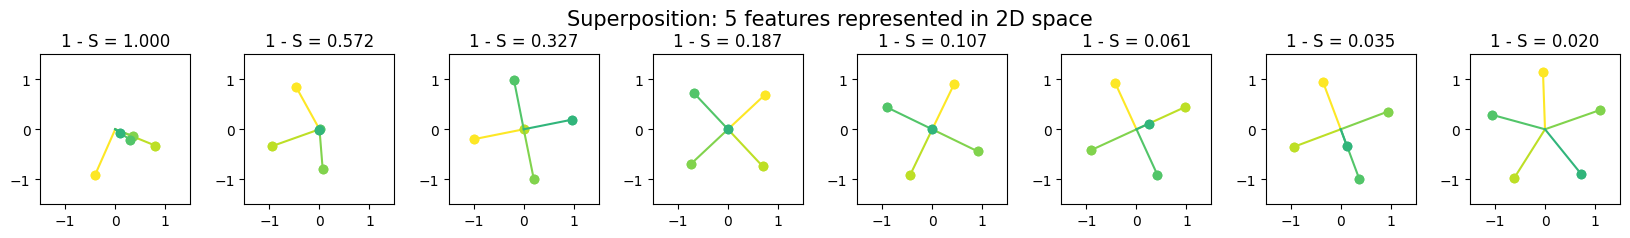

In [53]:
utils.plot_features_in_2d(
    model.W,
    colors=model.importance,
    title=f"Superposition: {cfg.n_features} features represented in 2D space",
    subplot_titles=[f"1 - S = {i:.3f}" for i in feature_probability.squeeze()],
)

### Exercise - interpret these diagrams

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵🔵🔵⚪
>
> You should spend up to 10-20 minutes on this exercise.
>
> ```

Remember that for all these diagrams, the darker colors have lower importance and the lighter colors have higher importance. Also, the sparsity of all features is increasing as we move from left to right (at the far left there is no sparsity, at the far right feature probability is 5% for all features, i.e. sparsity of 95%).

<details>
<summary>Hint</summary>

For low sparsity, think about what the model would learn to do if all 5 features were present all the time. What's the best our model could do in this case, and how does that relate to the **importance** values?

For high sparsity, think about what the model would learn to do if there was always exactly one feature present. Does this make interference between features less of a problem?
</details>

<details>
<summary>Answer (intuitive)</summary>

When there is no sparsity, the model can never represent more than 2 features faithfully, so it makes sense for it to only represent the two most important features. It stores them orthogonally in 2D space, and sets the other 3 features to zero. This way, it can reconstruct these two features perfectly, and ignores all the rest.

When there is high sparsity, we get a pentagon structure. Most of the time at most one of these five features will be active, which helps avoid **interference** between features. When we try to recover our initial features by projecting our point in 2D space onto these five directions, most of the time when feature $i$ is present, we can be confident that our projection onto the $i$-th feature direction only captures this feature, rather than being affected by the presence of other features. We omit the mathematical details here.

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/img/ch13-sparsity-diagram-tms.png" width="900">

The key idea here is that two forces are competing in our model: **feature benefit** (representing more thing is good!), and **interference** (representing things non-orthogonally is bad). The higher the sparsity, the more we can reduce the negative impact of interference, and so the trade-off skews towards "represent more features, non-orthogonally".

</details>


We can also generate a batch and visualise its embedding. Most interestingly, you should see that in the plots with high sparsity (to the right), we very rarely have interference between the five features, because most often $\leq 1$ of those features is present, and the model can recover it by projecting along the corresponding feature dimension without losing any information.

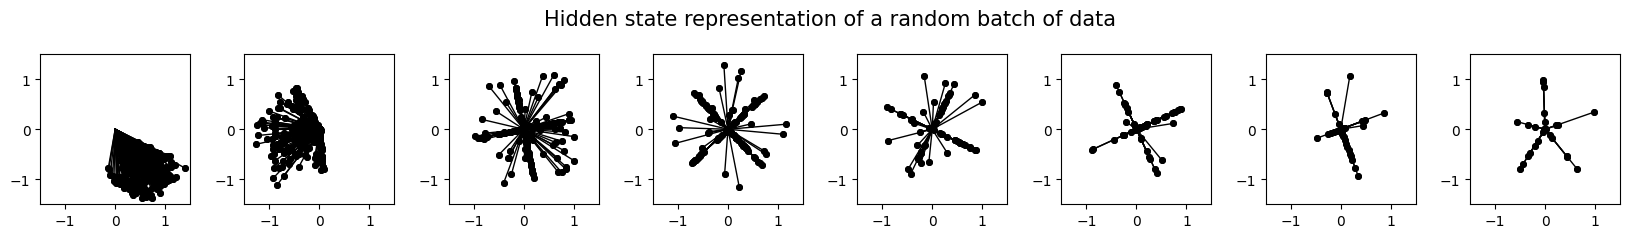

In [54]:
with t.inference_mode():
    batch = model.generate_batch(200)
    hidden = einops.einsum(
        batch,
        model.W,
        "batch instances features, instances hidden features -> instances hidden batch",
    )

utils.plot_features_in_2d(hidden, title="Hidden state representation of a random batch of data")

### Visualizing features across varying sparsity

Now that we've got our pentagon plots and started to get geometric intuition for what's going on, let's scale things up! We're now operating in dimensions too large to visualise, but hopefully our intuitions will carry over.

In [55]:
cfg = ToyModelConfig(n_inst=10, n_features=100, d_hidden=20)

importance = 100 ** -t.linspace(0, 1, cfg.n_features)
feature_probability = 20 ** -t.linspace(0, 1, cfg.n_inst)

line(
    importance,
    width=600,
    height=400,
    title="Feature importance (same over all instances)",
    labels={"y": "Importance", "x": "Feature"},
)
line(
    feature_probability,
    width=600,
    height=400,
    title="Feature probability (varied over instances)",
    labels={"y": "Probability", "x": "Instance"},
)

model = ToyModel(
    cfg=cfg,
    device=device,
    importance=importance[None, :],
    feature_probability=feature_probability[:, None],
)
model.optimize(steps=10_000)

  0%|          | 0/10000 [00:00<?, ?it/s]

Because we can't plot features in 2D anymore, we're going to use a different kind of visualisation:

* The **bottom row plots** shows a bar graph of all the features and their corresponding embedding norms $||W_i||$.
    * As we increase sparsity, the model is able to represent more features (i.e. we have more features with embedding norms close to 1).
    * We also color the bars according to whether they're orthogonal to other features (purple) or not (yellow). So we can see that for low sparsity most features are represented orthogonally (like our left-most plots above) but as we increase sparsity we transition to all features being represented non-orthogonally (like our right-most pentagon plots above).
* The **top row plots** show us the dot products between all pairs of feature vectors (kinda like the heatmaps we plotted at the start of this section).
    * This is another way of visualising the increasing interference between features as we increase sparsity.
    * Note that all these right hand plots represent **matrices with rank at most `d_hidden=20`**. The first few are approximately submatrices of the identity (because we perfectly reconstruct 20 features and delete the rest), but the later plots start to display inference as we plot more than 20 values (the diagonals of these matrices have more than 20 non-zero elements).

See the section [Basic Results](https://transformer-circuits.pub/2022/toy_model/index.html#demonstrating-basic-results) for more of an explanation of this graph and what you should interpret from it.

In [ ]:
utils.plot_features_in_Nd(
    model.W,
    height=800,
    width=1600,
    title="ReLU output model: n_features = 100, d_hidden = 20, I<sub>i</sub> = 0.9<sup>i</sup>",
    subplot_titles=[f"Feature prob = {i:.3f}" for i in feature_probability],
)

## Superposition with correlation

> Note, if you're aiming to progress quickly through these exercises in order to just cover the key ideas behind superposition, this is probably the point at which you can jump to the next section! The key idea here is essentially that negative correlation between features leads to more superposition, because the model suffers less from interference (the cases when both features are active at once). If you're interested in the details and actually performing the replication, read on!

One major thing we haven't considered in our experiments is **correlation**. We could guess that superposition is even more common when features are **anticorrelated** (for a similar reason as why it's more common when features are sparse). Most real-world features are anticorrelated (e.g. the feature "this is a sorted Python list" and "this is some text in an edgy teen vampire romance novel" are probably anticorrelated - that is, unless you've been reading some pretty weird fanfics).

In this section, you'll define a new data-generating function for correlated features, and run the same experiments as in the first section.

### Exercise - implement `generate_correlated_batch`

> ```yaml
> Difficulty: 🔴🔴🔴🔴⚪
> Importance: 🔵🔵⚪⚪⚪
>
> You should spend up to 20-40 minutes on this exercise.
> The exercise itself is a bit fiddly / delicate, so you should definitely look at the solutions if you get stuck.
> ```

You should now fill in the three methods `generate_correlated_features`, `generate_anticorrelated_features` and `generate_uncorrelated_features` in the `Model` class, which are created to generate correlated / anticorrelated data. We've given you a new `generate_batch` function which returns the aggregation from all of these methods.

Note, in the correlated & anticorrelated cases you can assume that the feature probability is the same for all features in each instance. We start these functions by asserting this for you, and creating a vector `p` which contains this feature probability for each instance (which is what you should use instead of `model.feature_probability`). The same is also true for the uncorrelated case, when the number of uncorrelated features we're generating is less than `cfg.n_features` (since if not, it's fine to use the full `self.feature_probability` tensor).

You'll also need to be careful with your probabilities in the anticorrelated case. For example, if you do the following for your pair of features 1 & 2:

```python
feat1_is_present = t.rand() < p
feat2_is_present = t.rand() < p & ~feat1_is_present
```

then your `feat2` probability will actually be `p * (1 - p)` rather than the intended `p`. You want to try and make both features have probability `p`, while _also_ ensuring that they are never both active at the same time! The hints provide some guidance on how you can implement this (it's a bit fiddly and not very conceptually important!).

For more details, you can read the [experimental details in Anthropic's paper](https://transformer-circuits.pub/2022/toy_model/index.html#geometry-correlated-setup), where they describe how they setup correlated and anticorrelated sets.

<details>
<summary>Help - I'm confused about how to implement the correlated features function.</summary>

Try first creating a boolean mask of shape `(batch_size, n_inst, n_correlated_pairs)` representing whether the pair is present, then repeating that mask across feature pairs with `einops.repeat`.

</details>

<details>
<summary>Help - I'm confused about how to implement the anticorrelated features function.</summary>

Here are 2 suggested methods:

1. Create a boolean mask of shape `(batch_size, n_inst, n_anticorrelated_pairs)` with probability $2p$, which represents whether *either* feature is present - and where true, we choose the present feature uniform randomly from the pair. This works because both features will have probability $2p \times 0.5 = p$.
2. Create 2 boolean masks `M1, M2` both of shape `(batch_size, n_inst, n_anticorrelated_pairs)` with probability $p$ and $p / (1 - p)$ respectively. Set the first feature to be present where `M1` is true, and the second feature to be present where `~M1 && M2` is true. This works because the first feature will have probability $p$, and the second will have probability $\frac{(1 - p)p}{(1 - p)} = p$.

The solutions use a method like (2), but either is valid.

</details>

In [ ]:
def generate_correlated_features(
    self: ToyModel, batch_size: int, n_correlated_pairs: int
) -> Float[Tensor, "batch inst 2*n_correlated_pairs"]:
    """
    Generates a batch of correlated features. For each pair `batch[i, j, [2k, 2k+1]]`, one of
    them is non-zero if and only if the other is non-zero.
    """
    assert t.all((self.feature_probability == self.feature_probability[:, [0]]))
    p = self.feature_probability[:, [0]]  # shape (n_inst, 1)

    # YOUR CODE HERE!
    raise NotImplementedError()


def generate_anticorrelated_features(
    self: ToyModel, batch_size: int, n_anticorrelated_pairs: int
) -> Float[Tensor, "batch inst 2*n_anticorrelated_pairs"]:
    """
    Generates a batch of anti-correlated features. For each pair `batch[i, j, [2k, 2k+1]]`, each
    of them can only be non-zero if the other one is zero.
    """
    assert t.all((self.feature_probability == self.feature_probability[:, [0]]))
    p = self.feature_probability[:, [0]]  # shape (n_inst, 1)

    assert p.max().item() <= 0.5, "For anticorrelated features, must have 2p < 1"

    # YOUR CODE HERE!
    raise NotImplementedError()


def generate_uncorrelated_features(self: ToyModel, batch_size: int, n_uncorrelated: int) -> Tensor:
    """
    Generates a batch of uncorrelated features.
    """
    if n_uncorrelated == self.cfg.n_features:
        p = self.feature_probability
    else:
        assert t.all((self.feature_probability == self.feature_probability[:, [0]]))
        p = self.feature_probability[:, [0]]  # shape (n_inst, 1)

    # YOUR CODE HERE!
    raise NotImplementedError()


def generate_batch(self: ToyModel, batch_size) -> Float[Tensor, "batch inst feats"]:
    """
    Generates a batch of data, with optional correlated & anticorrelated features.
    """
    n_corr_pairs = self.cfg.n_correlated_pairs
    n_anti_pairs = self.cfg.n_anticorrelated_pairs
    n_uncorr = self.cfg.n_features - 2 * n_corr_pairs - 2 * n_anti_pairs

    data = []
    if n_corr_pairs > 0:
        data.append(generate_correlated_features(self, batch_size, n_corr_pairs))
    if n_anti_pairs > 0:
        data.append(generate_anticorrelated_features(self, batch_size, n_anti_pairs))
    if n_uncorr > 0:
        data.append(generate_uncorrelated_features(self, batch_size, n_uncorr))
    batch = t.cat(data, dim=-1)
    return batch


ToyModel.generate_batch = generate_batch

<details><summary>Solution</summary>

```python
def generate_correlated_features(
    self: ToyModel, batch_size: int, n_correlated_pairs: int
) -> Float[Tensor, "batch inst 2*n_correlated_pairs"]:
    """
    Generates a batch of correlated features. For each pair `batch[i, j, [2k, 2k+1]]`, one of
    them is non-zero if and only if the other is non-zero.
    """
    assert t.all((self.feature_probability == self.feature_probability[:, [0]]))
    p = self.feature_probability[:, [0]]  # shape (n_inst, 1)

    feat_mag = t.rand((batch_size, self.cfg.n_inst, 2 * n_correlated_pairs), device=self.W.device)
    feat_set_seeds = t.rand((batch_size, self.cfg.n_inst, n_correlated_pairs), device=self.W.device)
    feat_set_is_present = feat_set_seeds <= p
    feat_is_present = einops.repeat(
        feat_set_is_present,
        "batch instances features -> batch instances (features pair)",
        pair=2,
    )
    return t.where(feat_is_present, feat_mag, 0.0)


def generate_anticorrelated_features(
    self: ToyModel, batch_size: int, n_anticorrelated_pairs: int
) -> Float[Tensor, "batch inst 2*n_anticorrelated_pairs"]:
    """
    Generates a batch of anti-correlated features. For each pair `batch[i, j, [2k, 2k+1]]`, each
    of them can only be non-zero if the other one is zero.
    """
    assert t.all((self.feature_probability == self.feature_probability[:, [0]]))
    p = self.feature_probability[:, [0]]  # shape (n_inst, 1)

    assert p.max().item() <= 0.5, "For anticorrelated features, must have 2p < 1"

    feat_mag = t.rand((batch_size, self.cfg.n_inst, 2 * n_anticorrelated_pairs), device=self.W.device)
    even_feat_seeds, odd_feat_seeds = t.rand(
        (2, batch_size, self.cfg.n_inst, n_anticorrelated_pairs),
        device=self.W.device,
    )
    even_feat_is_present = even_feat_seeds <= p
    odd_feat_is_present = (even_feat_seeds > p) & (odd_feat_seeds <= p / (1 - p))
    feat_is_present = einops.rearrange(
        t.stack([even_feat_is_present, odd_feat_is_present], dim=0),
        "pair batch instances features -> batch instances (features pair)",
    )
    return t.where(feat_is_present, feat_mag, 0.0)


def generate_uncorrelated_features(self: ToyModel, batch_size: int, n_uncorrelated: int) -> Tensor:
    """
    Generates a batch of uncorrelated features.
    """
    if n_uncorrelated == self.cfg.n_features:
        p = self.feature_probability
    else:
        assert t.all((self.feature_probability == self.feature_probability[:, [0]]))
        p = self.feature_probability[:, [0]]  # shape (n_inst, 1)

    if n_uncorrelated == self.cfg.n_features:
        p = self.feature_probability
    else:
        assert t.all((self.feature_probability == self.feature_probability[:, [0]]))
        p = self.feature_probability[:, [0]]  # shape (n_inst, 1)

    feat_mag = t.rand((batch_size, self.cfg.n_inst, n_uncorrelated), device=self.W.device)
    feat_seeds = t.rand((batch_size, self.cfg.n_inst, n_uncorrelated), device=self.W.device)
    return t.where(feat_seeds <= p, feat_mag, 0.0)
```
</details>

The code below tests your function, by generating a large number of batches and measuring them statistically.

In [ ]:
cfg = ToyModelConfig(n_inst=30, n_features=4, d_hidden=2, n_correlated_pairs=1, n_anticorrelated_pairs=1)

feature_probability = 10 ** -t.linspace(0.5, 1, cfg.n_inst).to(device)

model = ToyModel(cfg=cfg, device=device, feature_probability=feature_probability[:, None])

# Generate a batch of 4 features: first 2 are correlated, second 2 are anticorrelated
batch = model.generate_batch(batch_size=100_000)
corr0, corr1, anticorr0, anticorr1 = batch.unbind(dim=-1)

assert ((corr0 != 0) == (corr1 != 0)).all(), "Correlated features should be active together"
assert ((corr0 != 0).float().mean(0) - feature_probability).abs().mean() < 0.002, (
    "Each correlated feature should be active with probability `feature_probability`"
)

assert not ((anticorr0 != 0) & (anticorr1 != 0)).any(), "Anticorrelated features should never be active together"
assert ((anticorr0 != 0).float().mean(0) - feature_probability).abs().mean() < 0.002, (
    "Each anticorrelated feature should be active with probability `feature_probability`"
)

We can also visualise these features, in the form of a bar chart. You should see the correlated features always co-occurring, and the anticorrelated features never co-occurring.

In [ ]:
# Generate a batch of 4 features: first 2 are correlated, second 2 are anticorrelated
batch = model.generate_batch(batch_size=1)
correlated_feature_batch, anticorrelated_feature_batch = batch.split(2, dim=-1)

# Plot correlated features
utils.plot_correlated_features(
    correlated_feature_batch,
    title="Correlated feature pairs: should always co-occur",
)
utils.plot_correlated_features(
    anticorrelated_feature_batch,
    title="Anti-correlated feature pairs: should never co-occur",
)

Now, let's try training our model & visualising features in 2D, when we have 2 pairs of correlated features (matching the [first row of the correlation figure](https://transformer-circuits.pub/2022/toy_model/index.html#geometry-organization) in the Anthropic paper).

In [ ]:
cfg = ToyModelConfig(n_inst=5, n_features=4, d_hidden=2, n_correlated_pairs=2)

# All same importance, very low feature probabilities (ranging from 5% down to 0.25%)
feature_probability = 400 ** -t.linspace(0.5, 1, cfg.n_inst)

model = ToyModel(
    cfg=cfg,
    device=device,
    feature_probability=feature_probability[:, None],
)
model.optimize(steps=10_000)

In [ ]:
utils.plot_features_in_2d(
    model.W,
    colors=["blue"] * 2 + ["limegreen"] * 2,
    title="Correlated feature sets are represented in local orthogonal bases",
    subplot_titles=[f"1 - S = {i:.3f}" for i in feature_probability],
)

### Exercise - generate more correlated feature plots

> ```yaml
> Difficulty: 🔴🔴⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to ~10 minutes on this exercise.
> It should just involve changing the parameters in your code above.
> ```

You should now reproduce the second and third rows from the paper's [correlation figure](https://transformer-circuits.pub/2022/toy_model/index.html#geometry-organization). You may not get exactly the same results as the paper, but they should still roughly match (e.g. you should see no antipodal pairs in the code above, but you should see at least some when you test the anticorrelated sets, even if not all of them are antipodal). You can look at the solutions colab to see some examples.

<details>
<summary>Question - for the anticorrelated feature plots, you'll have to increase the feature probability to something like ~10%, or else you won't always form antipodal pairs. Why do you think this is?</summary>

The reason antipodal pairs are better for handling anticorrelated features is that the model can be sure only one of these antipodal pairs will be active at a time, so they won't interfere with each other. So effectively we can be sure that a maximum of 2 directions will be non-zero at a time, and those 2 directions are guaranteed to be orthogonal if they co-occur (because they're from 2 different orthogonal pairs, which lie in orthogonal subspaces to each other). So we can get zero loss. If we don't have antipodal pairs, then we'll sometimes get interference between features from different feature pairs (since their directions might be antipodal).

The key point here - antipodal pairs are only better because they handle interference better, i.e. the cases where both feature pairs are active. This happens with $O(p^2)$ probability (where $p$ is the feature probability). So for very small values of $p$, the edge that the antipodal solution has over the non-antipodal solution is much smaller, and it may end up just settling on whichever solution it finds first.

</details>

In [ ]:
# YOUR CODE HERE - generate more correlated feature plots

<details>
<summary>Solution (example code, and what you should find)</summary>

```python
# Anticorrelated feature pairs
cfg = ToyModelConfig(n_inst=5, n_features=4, d_hidden=2, n_anticorrelated_pairs=2)

# All same importance, not-super-low feature probabilities (all >10%)
feature_probability = 10 ** -t.linspace(0.5, 1, cfg.n_inst)

model = ToyModel(cfg=cfg, device=device, feature_probability=feature_probability[:, None])
model.optimize(steps=10_000)

utils.plot_features_in_2d(
    model.W,
    colors=["red"] * 2 + ["orange"] * 2,
    title="Anticorrelated feature sets are frequently represented as antipodal pairs",
    subplot_titles=[f"1 - S = {i:.3f}" for i in feature_probability],
)
```

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/media-1320/1320-E4.png" width="950">

```python
# 3 correlated feature pairs
cfg = ToyModelConfig(n_inst=5, n_features=6, d_hidden=2, n_correlated_pairs=3)

# All same importance, very low feature probabilities (ranging from 5% down to 0.25%)
feature_probability = 100 ** -t.linspace(0.5, 1, cfg.n_inst)

model = ToyModel(cfg=cfg, device=device, feature_probability=feature_probability[:, None])
model.optimize(steps=10_000)

utils.plot_features_in_2d(
    model.W,
    colors=["blue"] * 2 + ["limegreen"] * 2 + ["purple"] * 2,
    title="Correlated feature sets are side by side if they can't be orthogonal (and sometimes we get collapse)",
    subplot_titles=[f"1 - S = {i:.3f}" for i in feature_probability],
)
```

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/media-1320/1320-E5.png" width="950">

</details>

# 2️⃣ TMS: Superposition in a Privileged Basis

> ##### Learning Objectives
>
> - Understand the difference between neuron vs bottleneck superposition (or computational vs representational superposition)
> - Learn how models can perform computation in superposition, via the example `f(x) = abs(x)`

## Introduction

So far, we've explored superposition in a model without a privileged basis. We can rotate the hidden activations arbitrarily and, as long as we rotate all the weights, have the exact same model behavior. That is, for any ReLU output model with weights
$W$, we could take an arbitrary orthogonal matrix $O$ and consider the model $W' = OW$. Since $(OW)^T(OW) = W^T W$, the result would be an identical model!

Models without a privileged basis are elegant, and can be an interesting analogue for certain neural network representations which don't have a privileged basis – word embeddings, or the transformer residual stream. But we'd also (and perhaps primarily) like to understand neural network representations where there are neurons which do impose a privileged basis, such as transformer MLP layers or conv net neurons.

Our goal in this section is to explore the simplest toy model which gives us a privileged basis. There are at least two ways we could do this: we could add an activation function or apply $L_1$ regularization to the hidden layer. We'll focus on adding an activation function, since the representation we are most interested in understanding is hidden layers with neurons, such as the transformer MLP layer.

This gives us the following "ReLU hidden layer" model. It's the simplest one we can use which is still likely to give us a privileged basis; we just take our previous setup and apply ReLU to the hidden layer.

$$
\begin{aligned}
h & =\operatorname{ReLU}(W x) \\
x^{\prime} & =\operatorname{ReLU}\left(W^T h+b\right)
\end{aligned}
$$

### Exercise - implement `NeuronModel`

> ```yaml
> Difficulty: 🔴🔴⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to ~10 minutes on this exercise.
> ```

In this section, you'll replicate the [first set of results](https://transformer-circuits.pub/2022/toy_model/index.html#demonstrating-setup-loss:~:text=model%20and%20a-,ReLU%20hidden%20layer%20model,-%3A) in the Anthropic paper on studying superposition in a privileged basis. To do this, you'll need a new `NeuronModel` class. It can inherit most methods from the `Model` class, but you'll need to redefine the `forward` method to include an intermediate ReLU.

In [8]:
class NeuronModel(ToyModel):
    def forward(self, features: Float[Tensor, "... inst feats"]) -> Float[Tensor, "... inst feats"]:
        h = F.relu(torch.einsum("nhf,bnf->bnh", self.W, features))
        return F.relu(torch.einsum("nhf,bnh->bnf", self.W, h) + self.b_final)


tests.test_neuron_model(NeuronModel)

All tests in `test_neuron_model` passed!


<details><summary>Solution</summary>

```python
class NeuronModel(ToyModel):
    def forward(self, features: Float[Tensor, "... inst feats"]) -> Float[Tensor, "... inst feats"]:
        activations = F.relu(
            einops.einsum(features, self.W, "... inst feats, inst d_hidden feats -> ... inst d_hidden")
        )
        out = F.relu(
            einops.einsum(activations, self.W, "... inst d_hidden, inst d_hidden feats -> ... inst feats")
            + self.b_final
        )
        return out
```
</details>

Once you've passed these tests, you can run the cells below to train the model in the same way as before. We use just one instance, with zero sparsity and uniform importance.

We also visualize the matrix $W$. In these plots, we make it so the top-row visualisation is of $W$ rather than $W^T W$ - we can get away with this now because (unlike before) the individual elements of $W$ *are* meaningful. We're working with a **privileged basis**, and $W$ connects features to basis-aligned neurons.

In [9]:
cfg = ToyModelConfig(n_inst=7, n_features=10, d_hidden=5)

importance = 0.75 ** t.arange(1, 1 + cfg.n_features)
feature_probability = t.tensor([0.75, 0.35, 0.15, 0.1, 0.06, 0.02, 0.01])

model = NeuronModel(
    cfg=cfg,
    device=device,
    importance=importance[None, :],
    feature_probability=feature_probability[:, None],
)
model.optimize(steps=10_000)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [10]:
utils.plot_features_in_Nd(
    model.W,
    height=600,
    width=1000,
    title=f"Neuron model: {cfg.n_features=}, {cfg.d_hidden=}, I<sub>i</sub> = 0.75<sup>i</sup>",
    subplot_titles=[f"1 - S = {i:.2f}" for i in feature_probability.squeeze()],
    neuron_plot=True,
)

### Exercise - interpret these plots

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵🔵🔵⚪
>
> You should spend up to 10-15 minutes on this exercise.
> ```

The first row shows plots of $W$. The rows are features, the columns are hidden dimensions (neurons).

The second row shows stacked weight plots: in other words, each column is a neuron, and the values in a column are the exposures of the features to that particular neuron. In these plots, each feature is colored differently based on its interference with other features (dark blue means the feature is orthogonal to all other features, and lighter colors means the sum of squared dot products with other features is large).

What is your interpretation of these plots? You should discuss things like monosemanticity / polysemanticity and how this changes with increasing sparsity.

<details>
<summary>Explanation for some of these plots</summary>

**Low sparsity / high feature probability**

With very low sparsity (feature prob $\approx 1$), we get no superposition: every feature is represented faithfully by a different one of the model's neurons, or not represented at all. In other words, we have **pure monosemanticity**.

In the heatmaps, we see a diagonal plot (up to rearrangement of neurons), i.e. each of the 5 most important features has a corresponding neuron which detects that particular feature, and no other.

In the bar charts, we see this monosemanticity represented: each neuron has just one feature exposed to it.

**Medium sparsity / medium feature probability**

At intermediate values, we get some monosemantic neurons, and some polysemantic ones. You should see reoccurring block patterns like these (up to rearrangements of rows and/or columns):

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/three_two2.png" width="130">

Can you see what geometric arrangements these correspond to? The answer is in the nested dropdown below.

<details>
<summary>Answer</summary>

The 3x2 block shows 3 features embedded in 2D space. Denoting the 3 features $i, j, k$ respectively, we can see that $j$ is represented along the direction $(1, 1)$ (orthogonal to the other two), and $i, k$ are represented as $(-1, 1)$ and $(1, -1)$ respectively (antipodal pairs).

As for the 3x3 block, it's actually 3 of the 4 points from a regular tetrahedron! This hints at an important fact which we'll explore in the next (optional) set of exercises: **superposition results in features organizing themselves into geometric structures**, which often represent uniform polyhedra.

</details>

The bar chart shows some neurons are starting to become polysemantic, with exposures to more than one feature.

**High sparsity / low feature probability**

With high sparsity, all neurons are polysemantic, and most / all features are represented in some capacity. The neurons aren't orthogonal (since we have way more features than neurons), but they don't need to be orthogonal: we saw in earlier sections how high sparsity can allow us to represent more features than we had dimensions. The same is true in this case.

Note - Anthropic [finds](https://transformer-circuits.pub/2022/toy_model/index.html#privileged-basis:~:text=The%20solutions%20are%20visualized%20below) that with very high sparsity, each feature will correspond to a pair of neurons. However, you may not find this for your own plots (I didn't!). This is because - as Anthropic mention - they trained many separate instances and took the ones with smallest loss, since these models proved more difficult to optimize than others in their toy model setup.

Overall, it looks a great deal like there are **neuron-level phase changes from monosemantic to polysemantic** as we increase the sparsity, mirroring the feature phase changes we saw earlier.

</details>

Try playing around with different settings (sparsity, importance). What kind of results do you get?

### Exercise (optional) - replicate plots more faithfully

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵⚪⚪⚪⚪
>
> You should spend up to 10-25 minutes on this exercise, if you choose to do it.
> ```

Anthropic mention in their paper that they trained 1000 instances and chose the ones which achieved lowest loss. This is why your results might have differed from theirs, especially when the sparsity is very high / feature probability is very low.

Can you implement this "choose lowest loss" method in your own class? Some suggestions:

* The most basic way would be to modify the `optimize` function to return the loss per instance, and also use a for loop to run several `optimize` calls & at the end give you the best instances for each different level of sparsity.
* A much better way would be to train more instances at once (e.g. `N` instances per level of sparsity), then for each level of sparsity you can argmax over `N` at the end to get a single instance. This will be much faster (although you'll have to be careful not to train 1000 instances at once; your GPU might not support it!).
* To get very fancy, you could even add another dimension to the weight matrices, corresponding to this `N` dimension you argmax over. Then this "taking lowest-loss instance" behavior will be automatic.

## Computation in superposition

The example above was interesting, but in some ways it was also limited. The key problem here is that **the model doesn't benefit from the ReLU hidden layer**. Adding a ReLU does encourage the model to have a privileged basis, but since the model is trying to reconstruct the input (i.e. the identity, which is a linear function) it doesn't actually need to use the ReLU, and it will try anything it can to circumvent it - including learning biases which shift all the neurons into a positive regime where they behave linearly. This is a mark against using this toy model to study superposition.

To extend this point: we don't want to study boring linear functions like the identity, we want to study **how models perform (nonlinear) computation in superposition**. The MLP layer in a transformer isn't just a way to represent information faithfully and recover it; it's a way to perform computation on that information. So for this next section, we'll train a model to perform some non-linear computation. Specifically, we'll train our model to **compute the absolute value of inputs $x$**.

Our data $x$ are now sampled from the range $[-1, 1]$ rather than $[0, 1]$ (otherwise calculating the absolute value would be equivalent to reconstructing the input). This is about as simple as a nonlinear function can get, since $abs(x)$ is equivalent to $\operatorname{ReLU}(x) + \operatorname{ReLU}(-x)$. But since it's nonlinear, we can be sure that the model has to use the hidden layer ReLU.

### Exercise - implement `NeuronComputationModel`

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 20-30 minutes on this exercise.
> ```

You should fill in the `NeuronComputationModel` class below. Specifically, you'll need to fill in the `forward`, `generate_batch` and `calculate_loss` methods. Some guidance:

* The model's **forward function** is different - it has a ReLU hidden layer in its forward function (as described above & in the paper).
* The model's **data** is different - see the discussion above. Your `generate_batch` function should be rewritten - it will be the same as the first version of this function you wrote (i.e. without correlations) except for one difference: the value is sampled uniformly from the range $[-1, 1]$ rather than $[0, 1]$.
* The model's **loss function** is different. Rather than computing the importance-weighted $L_2$ error between the input $x$ and output $x'$, we're computing the importance-weighted $L_2$ error between $\operatorname{abs}(x)$ and $x'$. This should just require changing one line. The `optimize` function can stay the same, but it will now be optimizing this new loss function.

In [4]:
class NeuronComputationModel(ToyModel):
    W1: Float[Tensor, "inst d_hidden feats"]
    W2: Float[Tensor, "inst feats d_hidden"]
    b_final: Float[Tensor, "inst feats"]

    def __init__(
        self,
        cfg: ToyModelConfig,
        feature_probability: float | Tensor = 1.0,
        importance: float | Tensor = 1.0,
        device=device,
    ):
        super(ToyModel, self).__init__()
        self.cfg = cfg

        if isinstance(feature_probability, float):
            feature_probability = t.tensor(feature_probability)
        self.feature_probability = feature_probability.to(device).broadcast_to((cfg.n_inst, cfg.n_features))
        if isinstance(importance, float):
            importance = t.tensor(importance)
        self.importance = importance.to(device).broadcast_to((cfg.n_inst, cfg.n_features))

        self.W1 = nn.Parameter(nn.init.kaiming_uniform_(t.empty((cfg.n_inst, cfg.d_hidden, cfg.n_features))))
        self.W2 = nn.Parameter(nn.init.kaiming_uniform_(t.empty((cfg.n_inst, cfg.n_features, cfg.d_hidden))))
        self.b_final = nn.Parameter(t.zeros((cfg.n_inst, cfg.n_features)))
        self.to(device)

    def forward(self, features: Float[Tensor, "... inst feats"]) -> Float[Tensor, "... inst feats"]:
        h = F.relu(torch.einsum("nhf,bnf->bnh", self.W1, features))
        return F.relu(torch.einsum("nfh,bnh->bnf", self.W2, h) + self.b_final)

    def generate_batch(self, batch_size) -> Tensor:
        features = torch.bernoulli(self.feature_probability.unsqueeze(0).expand(batch_size, -1, -1))
        return features * torch.zeros_like(features).uniform_(-1, 1)

    def calculate_loss(
        self,
        out: Float[Tensor, "batch instances features"],
        batch: Float[Tensor, "batch instances features"],
    ) -> Float[Tensor, ""]:
        loss = ((out - torch.abs(batch))**2 * self.importance).mean(dim=-1).mean(dim=0).sum()
        return loss


tests.test_neuron_computation_model(NeuronComputationModel)

All tests in `test_neuron_computation_model` passed!


<details>
<summary>Solution for <code>forward</code></summary>

```python
def forward(self, features: Float[Tensor, "... inst feats"]) -> Float[Tensor, "... inst feats"]:
    activations = F.relu(
        einops.einsum(features, self.W1, "... inst feats, inst d_hidden feats -> ... inst d_hidden")
    )
    out = F.relu(
        einops.einsum(activations, self.W2, "... inst d_hidden, inst feats d_hidden -> ... inst feats")
        + self.b_final
    )
    return out
```

</details>

<details>
<summary>Solution for <code>generate_batch</code></summary>

```python
def generate_batch(self, batch_size) -> Tensor:
    feat_mag = 2 * t.rand((batch_size, self.cfg.n_inst, self.cfg.n_features), device=self.W1.device) - 1
    feat_seed = t.rand(
        (batch_size, self.cfg.n_inst, self.cfg.n_features),
        device=self.W1.device,
    )
    batch = t.where(feat_seed < self.feature_probability, feat_mag, 0.0)
    return batch
```

</details>

<details>
<summary>Solution for <code>calculate_loss</code></summary>

```python
def calculate_loss(
    self,
    out: Float[Tensor, "batch instances features"],
    batch: Float[Tensor, "batch instances features"],
) -> Float[Tensor, ""]:
    error = self.importance * ((batch.abs() - out) ** 2)
    loss = einops.reduce(error, "batch inst feats -> inst", "mean").sum()
    return loss
```

</details>

Once you've passed these tests, you can run the code below to make the same visualisation as above.

You should see similar patterns: with very low sparsity most/all neurons are monosemantic, but more polysemantic neurons appear as sparsity increases (until all neurons are polysemantic). Another interesting observation: in the monosemantic (or mostly monosemantic) cases, for any given feature there will be some neurons which have positive exposures to that feature and others with negative exposure. This is because some neurons are representing the value $\operatorname{ReLU}(x_i)$ and others are representing the value of $\operatorname{ReLU}(-x_i)$ (as discussed above, we require both of these to compute the absolute value).

In [5]:
cfg = ToyModelConfig(n_inst=7, n_features=100, d_hidden=40)

importance = 0.8 ** t.arange(1, 1 + cfg.n_features)
feature_probability = t.tensor([1.0, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001])

model = NeuronComputationModel(
    cfg=cfg,
    device=device,
    importance=importance[None, :],
    feature_probability=feature_probability[:, None],
)
model.optimize()

  0%|          | 0/5000 [00:00<?, ?it/s]

In [6]:
utils.plot_features_in_Nd(
    model.W1,
    height=800,
    width=1600,
    title=f"Neuron computation model: n_features = {cfg.n_features}, d_hidden = {cfg.d_hidden}, I<sub>i</sub> = 0.75<sup>i</sup>",
    subplot_titles=[f"1 - S = {i:.3f}" for i in feature_probability.squeeze()],
    neuron_plot=True,
)

To further confirm that this is happening, we can color the values in the bar chart discretely by feature, rather than continuously by the polysemanticity of that feature. We'll use a feature probability of 50% for this visualisation, which is high enough to make sure each neuron is monosemantic. You should find that the input weights $W_1$ form pairs of antipodal neurons (i.e. ones with positive / negative exposures to that feature direction), but both of these neurons have positive output weights $W_2$ for that feature.

In [7]:
cfg = ToyModelConfig(n_inst=6, n_features=20, d_hidden=10)

importance = 0.8 ** t.arange(1, 1 + cfg.n_features)
feature_probability = 0.5

model = NeuronComputationModel(
    cfg=cfg,
    device=device,
    importance=importance[None, :],
    feature_probability=feature_probability,
)
model.optimize()

  0%|          | 0/5000 [00:00<?, ?it/s]

In [8]:
utils.plot_features_in_Nd_discrete(
    W1=model.W1,
    W2=model.W2,
    title="Neuron computation model (colored discretely, by feature)",
    legend_names=[f"I<sub>{i}</sub> = {importance.squeeze()[i]:.3f}" for i in range(cfg.n_features)],
)

## Bonus - the asymmetric superposition motif

In the [Asymmetric Superposition Motif](https://transformer-circuits.pub/2022/toy_model/index.html#computation-asymmetric-motif) section from Anthropic's paper, they discuss a particular quirk of this toy model in detail. Their section explains it in more detail than we will here (including some visual explanations), but we'll provide a relatively brief explanation here.

> When we increase sparsity in our model & start to get superposed features, we don't always have monosemantic neurons which each calculate either $\operatorname{ReLU}(x_i)$ or $\operatorname{ReLU}(-x_i)$ for some feature $i$. Instead, we sometimes have **asymmetric superposition**, where a single neuron detects two different features $i$ and $j$, and stores these features with different magnitudes (assume the $W_1$ vector for feature $i$ is much larger). The $W_2$ vectors have flipped magnitudes (i.e. the vector for $j$ is much larger). When $i$ is present and $j$ is not, there's no problem, because the output for feature $i$ is `large * small` (correct size) and for $j$ is `small * small` (near zero). But when $j$ is present and $i$ is not, the output for feature $j$ is `small * large` (correct size) and for $i$ is `large * large` (much larger than it should be). In particular, this is bad when the sign of output for $i$ is positive. The model fixes this by repurposing another neuron to correct for the case when $j$ is present and $i$ is not. We omit the exact mechanism, but it takes advantage of the fact that the model has a ReLU at the very end, so it doesn't matter if output for a feature is very large and negative (the loss will be truncated at zero), but being large and positive is very bad.

You should read the linked section of the Anthropic paper for details. We've given you code below to replicate the results of this plot - note that some plots will display the kind of asymmetric superposition described above, whereas others will simply have a single pair of neurons for each feature - you might have to fun a few random seeds to observe something exactly resembling Anthropic's plots. Can you understand what the output represents? Can you play around with the hyperparameters to see how this behaviour varies (e.g. with different feature probability or importance)?

In [ ]:
cfg = ToyModelConfig(n_inst=6, n_features=10, d_hidden=10)

importance = 0.8 ** t.arange(1, 1 + cfg.n_features)
feature_probability = 0.35  # slightly lower feature probability, to encourage a small degree of superposition

model = NeuronComputationModel(
    cfg=cfg,
    device=device,
    importance=importance[None, :],
    feature_probability=feature_probability,
)
model.optimize()

In [ ]:
utils.plot_features_in_Nd_discrete(
    W1=model.W1,
    W2=model.W2,
    title="Neuron computation model (colored discretely, by feature)",
    legend_names=[f"I<sub>{i}</sub> = {importance.squeeze()[i]:.3f}" for i in range(cfg.n_features)],
)

## Summary - what have we learned?

With toy models like this, it's important to make sure we take away generalizable lessons, rather than just details of the training setup.

The core things to take away form this paper are:

* What superposition is
* How it varies over feature importance and sparsity
* How it varies when we have correlated or anticorrelated features
* The difference between neuron and bottleneck superposition (or equivalently "computational and representational supervision")

# 3️⃣ Feature Geometry

> ##### Learning Objectives
>
> - Learn about *dimensionality*, which essentially measures what fraction of a dimension is allocated to a specific feature
> - Understand the geometric intuitions behind superposition, and how they relate to the more general ideas of superposition in larger models

> Note - this section is optional, since it goes into quite extreme detail about the specific problem setup we're using here. If you want, you can jump to the next section.

## Dimensionality

We've seen that superposition can allow a model to represent extra features, and that the number of extra features increases as we increase sparsity. In this section, we'll investigate this relationship in more detail, discovering an unexpected geometric story: features seem to organize themselves into geometric structures such as pentagons and tetrahedrons!

The code below runs a third experiment, with all importances the same. We're first interested in the number of features the model has learned to represent. This is well represented with the squared **Frobenius norm** of the weight matrix $W$, i.e. $||W||_F^2 = \sum_{ij}W_{ij}^2$.

<details>
<summary>Question - can you see why this is a good metric for the number of features represented?</summary>

By reordering the sums, we can show that the squared Frobenius norm is the sum of the squared norms of each of the 2D embedding vectors:

$$
\big\|W\big\|_F^2 = \sum_j \left(\sum_i W_{ij}^2\right) = \sum_{j}\big\|W_{[:, j]}\big\|^2
$$

Each of these embedding vectors has squared norm approximately $1$ if a feature is represented, and $0$ if it isn't. So this is roughly the total number of represented features.
</details>

If you run the code below, you'll also plot the total number of "dimensions per feature", $m/\big\|W\big\|_F^2$.

In [5]:
cfg = ToyModelConfig(n_features=200, d_hidden=20, n_inst=20)

# For this experiment, use constant importance across features (but still vary sparsity across instances)
feature_probability = 20 ** -t.linspace(0, 1, cfg.n_inst)

model = ToyModel(
    cfg=cfg,
    device=device,
    feature_probability=feature_probability[:, None],
)
model.optimize(steps=10_000)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [6]:
utils.plot_feature_geometry(model)

Surprisingly, we find that this graph is "sticky" at $1$ and $1/2$. On inspection, the $1/2$ "sticky point" seems to correspond to a precise geometric arrangement where features come in "antipodal pairs", each being exactly the negative of the other, allowing two features to be packed into each hidden dimension. It appears that antipodal pairs are so effective that the model preferentially uses them over a wide range of the sparsity regime.

It turns out that antipodal pairs are just the tip of the iceberg. Hiding underneath this curve are a number of extremely specific geometric configurations of features.

How can we discover these geometric configurations? Consider the following metric, which the authors named the **dimensionality** of a feature:

$$
D_i = \frac{\big\|W_i\big\|^2}{\sum_{j} \big( \hat{W_i} \cdot W_j \big)^2}
$$

Intuitively, this is a measure of what "fraction of a dimension" a specific feature gets. Let's try and get a few intuitions for this metric:

* It's never less than zero.
    * It's equal to zero if and only if the vector is the zero vector, i.e. the feature isn't represented.
* It's never greater than one (because when $j = i$, the term in the denominator sum is equal to the numerator).
    * It's equal to one if and only if the $i$-th feature vector $W_i$ is orthogonal to all other features (because then $j=i$ is the only term in the denominator sum).
    * Intuitively, in this case the feature has an entire dimension to itself.
* If there are $k$ features which are all parallel to each other, and orthogonal to all others, then they "share" the dimensionality equally, i.e. $D_i = 1/k$ for each of them.
* The sum of all $D_i$ can't be greater than the total number of features $m$, with equality if and only if all the vectors are orthogonal.

### Exercise - compute dimensionality

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 10-20 minutes on this exercise.
> ```

Remember, $W$ has shape `(n_inst, d_hidden, n_features)`. The vectors $W_i$ refer to the feature vectors (i.e. they have length `d_hidden`), and you should broadcast your calculations over the `n_inst` dimension.

In [7]:
@t.inference_mode()
def compute_dimensionality(W: Float[Tensor, "n_inst d_hidden n_features"]) -> Float[Tensor, "n_inst n_features"]:
    norm = torch.linalg.norm(W, dim=1, keepdim=True)
    W_normalized = W / (norm + 1e-8)
    temp = torch.einsum("nhf,nhg->nfg", W_normalized, W).pow(2).sum(axis=-1)
    return norm.squeeze().pow(2) / temp


tests.test_compute_dimensionality(compute_dimensionality)

All tests in `test_compute_dimensionality` passed!


<details><summary>Solution</summary>

```python
@t.inference_mode()
def compute_dimensionality(W: Float[Tensor, "n_inst d_hidden n_features"]) -> Float[Tensor, "n_inst n_features"]:
    W_norms = W.norm(dim=1, keepdim=True)
    numerator = W_norms.squeeze() ** 2

    # Compute denominator terms
    W_normalized = W / (W_norms + 1e-8)
    denominator = einops.einsum(W_normalized, W, "i h f1, i h f2 -> i f1 f2").pow(2).sum(-1)

    return numerator / denominator
```
</details>

The code below plots the fractions of dimensions, as a function of increasing levels of sparsity across our instances.

In [8]:
W = model.W.detach()
dim_fracs = compute_dimensionality(W)

utils.plot_feature_geometry(model, dim_fracs=dim_fracs)

What's going on here? It turns out that the model likes to create specific weight geometries and kind of jumps between the different configurations. For example:

* With zero (or very small) sparsity, the feature basis isn't privileged by anything, and so the model represents features with arbitrary directions instead. There's no reason for some features to be represented faithfully and others not to be.
* When we get to higher levels of sparsity, the feature basis becomes privileged. So the model phase-transitions to representing some features in antipodal pairs, and the rest aren't interpreted.
* With further increases in sparsity, we transition to different geometries (see diagram below).

The moral? Superposition is very hard to pin down! There are many points between a dimensionality of 0 (not learning a feature) and 1 (dedicating a dimension to a feature). As an analogy, we often think of water as only having three phases: ice, water and steam. But this is a simplification: there are actually many phases of ice, often corresponding to different crystal structures (eg. hexagonal vs cubic ice). In a vaguely similar way, neural network features seem to also have many other phases within the general category of "superposition."

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/grid_all.png" width="900">

Note that we should take care not to read too much significance into these results. A lot of it depends delicately on the details of our experimental setup (e.g. we used $W^T W$, a positive semidefinite matrix, and there's a correspondence between low-dimensional symmetric pos-semidef matrices like these and the kinds of polytopes that we've seen in the plots above). But hopefully this has given you a sense of the relevant considerations when it comes to packing features into fewer dimensions.

# 4️⃣ Superposition & Deep Double Descent

> ##### Learning Objectives
>
> - Understand and characterise the deep double descent phenomena
> - Relate the different phases of double descent to the idea of superposition
> - Practice replicating results from a paper in a more unguided way

> Note - this is less of a structured exercise set, and more of a guided replication. If you're interested in improving your ability to replicate papers (especially those concerning toy models and some low level maths & ML) then we recommend you try them. If you're more interested in moving through exercise sets with fast feedback loops & learning all you can about superposition & SAEs, then you might just want to read the key results from this section (or skip it altogether).

For this suggested replication, we'll look at the [Anthropic paper](https://transformer-circuits.pub/2023/toy-double-descent/index.html) on Double Descent & superposition. This paper ties the phenomena of [double descent](https://openai.com/research/deep-double-descent) to models of superposition. The theory posed by this paper goes roughly as follows:

* Initially, the model learns a **memorising solution** where datapoints are represented in superposition. This doesn't generalize, so we get low training loss but high test loss.
* Later, the model learns a **generalizing solution** where features are learned and represented in superposition. This generalizes, so we get low training loss and low test loss.
* The spike in loss between these two happens when the model transitions between the memorising and generalizing solutions.

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/ddd-superposn.png" width="700">

What does it mean to represent datapoints in superposition? If you've done the exercises on correlated / anticorrelated features in an earlier section, you'll know that anticorrelated features are easier to represent in superposition because they don't interfere with each other. This is especially true if features aren't just anticorrelated but are **mutually exclusive**. From the Anthropic paper:

> Consider the case of a language model which verbatim memorizes text. How can it do this? One naive idea is that it might use neurons to create a lookup table mapping sequences to arbitrary continuations. For every sequence of tokens it wishes to memorize, it could dedicate one neuron to detecting that sequence, and then implement arbitrary behavior when it fires. The problem with this approach is that it's extremely inefficient – but it seems like a perfect candidate for superposition, since each case is mutually exclusive and can't interfere.

We'll study this theory in the context of a toy model. Specifically, we'll use the toy model that we worked with in the first section of this paper, but we'll train it in a very particular way: by generating a random batch of data, and then using that same batch for the entire training process. We'll see what happens when the batch sizes change, but the number of features change. According to our theory, the model should represent datapoints in superposition when the batch size is smaller than the number of features, and it should represent features in superposition when the batch size is larger than the number of features.

Rather than giving you a set of exercises to complete, we're leaving this section open-ended. You should consider it more as a paper replication than a set of structured exercises. However, we will give you a few tips:

* Rather than using the Adam optimizer, the paper recommends AdamW, with a default weight decay of `WEIGHT_DECAY = 1e-2`.
    * Weight decay constrains the norm of weights, so that they don't grow too large. With no weight decay, we could in theory memorize an arbitrarily large number of datapoints and represent them evenly spaced around the unit circle; then we can perfectly reconstruct them as long as we have a large enough weight vector to project them onto.
* The paper recommends a learning rate consisting of a linear warmup up to `NUM_WARMUP_STEPS = 2500` (i.e. we increase the learning rate linearly from zero up to `LEARNING_RATE = 1e-3`), followed by cosine decay until the end of training at `NUM_BATCH_UPDATES = 50_000`.
* The paper recommends using a sparsity of 0.999 for the features, and 10,000 features total. However, we recommend instead using `SPARSITY = 0.99` and `N_FEATURES = 1000` (following the replication by Marius Hobbhahn). This will cause our model to train faster, while still observing fundamentally the same patterns.
* When generating the batch of data, you should normalize it (so each vector for a given batch index & instance has unit norm). The rest of the data generation process should be the same as in the first section of this notebook.
* Technically you only need one instance. However, we recommend using a few (e.g. 5-10) so you can pick the instance with lowest loss at the end of training. This is because (thanks to our best frend randomness) not all instances will necessarily learn the optimal solution. In our implementation (code below), we rewrite the `optimize` function to return `(batch_inst, W_inst)` at the end, where `batch_inst` is the batch which had the lowest loss by the end of training, and `W_inst` are the learned weights for that same instance. This is precisely the data you'll need to make the 2D feature plots featured in the paper.
* You can repurpose the function to calculate **dimensionality** from the section on feature geometry. See the paper for a discussion of a generalized dimensionality function, which doesn't just measure dimensionality of features, but also of datapoints.

To get you started, here are some constants which you might find useful:

In [5]:
NUM_WARMUP_STEPS = 2500
NUM_BATCH_UPDATES = 50_000

WEIGHT_DECAY = 1e-2
LEARNING_RATE = 1e-3

BATCH_SIZES = [3, 5, 6, 8, 10, 15, 30, 50, 100, 200, 500, 1000, 2000]

N_FEATURES = 1000
N_INSTANCES = 5
N_HIDDEN = 2
SPARSITY = 0.99
FEATURE_PROBABILITY = 1 - SPARSITY

Also, if you want some help with the visualisation, the code below will produce the 2D feature visualisations like those found at the bottom of [this figure](https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/fig-2d.png), for all batch sizes stacked horizontally, assuming:

* `features_list` is a list of detached `W`-matrices for single instances, i.e. each has shape `(2, n_features)` (these will be used to produce the blue plots on the first row)
* `data_list` is a list of the projections of our batch of data onto the hidden directions of that same instance, i.e. each has shape `(2, batch_size)` (these will be used to produce the red plots on the second row)

A demonstration is given below (the values are meaningless, they've just been randomly generated to illustrate how to use this function).

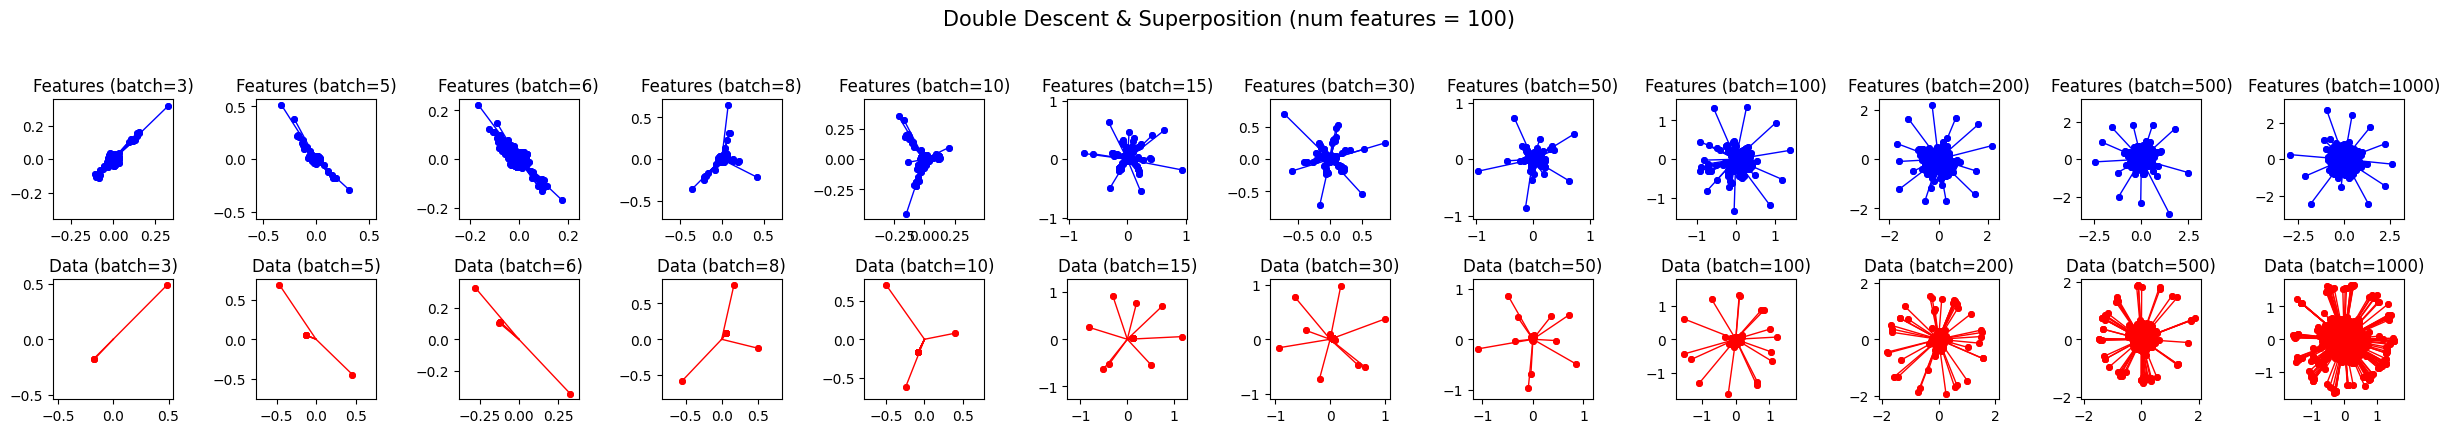

In [28]:
# features_list = [t.randn(size=(2, 100)) for _ in BATCH_SIZES]
# hidden_representations_list = [t.randn(size=(2, batch_size)) for batch_size in BATCH_SIZES]
BATCH_SIZES = BATCH_SIZES[:len(features_list)]
utils.plot_features_in_2d(
    features_list + [x.T for x in hidden_representations_list],
    colors=[["blue"] for _ in range(len(BATCH_SIZES))] + [["red"] for _ in range(len(BATCH_SIZES))],
    title="Double Descent & Superposition (num features = 100)",
    subplot_titles=[f"Features (batch={bs})" for bs in BATCH_SIZES] + [f"Data (batch={bs})" for bs in BATCH_SIZES],
    allow_different_limits_across_subplots=True,
    n_rows=2,
)

In [27]:
hidden_representations_list[0].shape

torch.Size([3, 2])

We've provided an implementation below, although we recommend that you give it a go yourself first before looking at too much of the code. You can use the different dropdowns to get different degrees of hints, if you're struggling.

In [12]:
# YOUR CODE HERE - replicate the results from the Superposition & Deep Double Descent paper!

class ToyModel2(ToyModel):
    def generate_batch(self, batch_size: int) -> Float[Tensor, "batch inst feats"]:
        """
        Generates a batch of data of shape (batch_size, n_instances, n_features).
        """
        features = torch.bernoulli(self.feature_probability.unsqueeze(0).expand(batch_size, -1, -1))
        data = features * torch.zeros_like(features).uniform_()
        return data / torch.linalg.norm(data, dim=-1, keepdim=True)

    def optimize(
        self,
        batch_size: int = 1024,
        steps: int = 5_000,
        log_freq: int = 50,
        lr: float = 1e-3,
        lr_scale: Callable[[int, int], float] = constant_lr,
    ):
        """
        Optimizes the model using the given hyperparameters.
        """
        optimizer = t.optim.AdamW(list(self.parameters()), lr=lr, weight_decay=WEIGHT_DECAY)

        progress_bar = tqdm(range(steps))

        # generate one batch for everyone
        batch = self.generate_batch(batch_size)

        for step in progress_bar:
            # Update learning rate
            step_lr = lr * lr_scale(step, steps)
            for group in optimizer.param_groups:
                group["lr"] = step_lr

            # Optimize
            optimizer.zero_grad()
            out = self(batch)
            loss = self.calculate_loss(out, batch)
            loss.backward()
            optimizer.step()

            # Display progress bar
            if step % log_freq == 0 or (step + 1 == steps):
                progress_bar.set_postfix(loss=loss.item() / self.cfg.n_inst, lr=step_lr)

        best_model = torch.argmin(loss)
        return model.W[best_model].squeeze(), batch[:, best_model].squeeze()


def lr_scale(step, steps):
    if step <= NUM_WARMUP_STEPS:
        return 1
    else:
        return np.cos(((step - NUM_WARMUP_STEPS) / (steps - NUM_WARMUP_STEPS)) * (np.pi) / 2)


cfg = ToyModelConfig(n_inst=N_INSTANCES, n_features=N_FEATURES, d_hidden=N_HIDDEN)

importance = 0.8 ** t.arange(1, 1 + cfg.n_features)

features_list = []
hidden_representations_list = []
for batch_size in BATCH_SIZES:
    model = ToyModel2(
        cfg=cfg,
        device=device,
        importance=importance[None, :],
        feature_probability=FEATURE_PROBABILITY,
    )
    best_model, batch = model.optimize(batch_size=batch_size, steps=NUM_BATCH_UPDATES, lr=LEARNING_RATE, lr_scale=lr_scale)
    features_list.append(best_model)
    hidden_representations_list.append(torch.einsum("hf,bf->bh", best_model, batch))

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

KeyboardInterrupt: 

The first 4 hints give you specific bits of code, if there's any particular part of the implementation you're struggling with:

<details>
<summary>Hint (basic setup code)</summary>

Basic imports and constants:

```python
import math
from typing import Any
import pandas as pd
import plotly.express as px

NUM_WARMUP_STEPS = 2500
NUM_BATCH_UPDATES = 50_000
# EVAL_N_DATAPOINTS = 1_000

WEIGHT_DECAY = 1e-2
LEARNING_RATE = 1e-3

BATCH_SIZES = [3, 4, 5, 6, 8, 10, 15, 20, 30, 50, 100, 200, 300, 500, 1000, 2000, 3000]
# SMALLER_BATCH_SIZES = [3, 6, 10, 30, 100, 500, 2000]

N_FEATURES = 1000
N_INSTANCES = 10
D_HIDDEN = 2
SPARSITY = 0.99
FEATURE_PROBABILITY = 1 - SPARSITY
```

Our new schedulers, in line with Anthropic's writeup:

```python
def linear_warmup_lr(step, steps):
    """Increases linearly from 0 to 1."""
    return step / steps

def anthropic_lr(step, steps):
    """As per the description in the paper: 2500 step linear warmup, followed by cosine decay to zero."""
    if step < NUM_WARMUP_STEPS:
        return linear_warmup_lr(step, NUM_WARMUP_STEPS)
    else:
        return cosine_decay_lr(step - NUM_WARMUP_STEPS, steps - NUM_WARMUP_STEPS)
```

</details>

<details>
<summary>Hint (code for new version of <code>ToyModel</code> class)</summary>

```python
class DoubleDescentModel(ToyModel):
    W: Float[Tensor, "inst d_hidden feats"]
    b_final: Float[Tensor, "inst feats"]
    # Our linear map (for a single instance) is x -> ReLU(W.T @ W @ x + b_final)

    @classmethod
    def dimensionality(
        cls, data: Float[Tensor, "... batch d_hidden"]
    ) -> Float[Tensor, "... batch"]:
        """
        Calculates dimensionalities of data. Assumes data is of shape ... batch d_hidden, i.e. if it's 2D then
        it's a batch of vectors of length `d_hidden` and we return the dimensionality as a 1D tensor of length
        `batch`. If it has more dimensions at the start, we assume this means separate calculations for each
        of these dimensions (i.e. they are independent batches of vectors).
        """
        # Compute the norms of each vector (this will be the numerator)
        squared_norms = einops.reduce(data.pow(2), "... batch d_hidden -> ... batch", "sum")
        # Compute the denominator (i.e. get the dotproduct then sum over j)
        data_normed = data / data.norm(dim=-1, keepdim=True)
        interference = einops.einsum(
            data_normed, data, "... batch_i d_hidden, ... batch_j d_hidden -> ... batch_i batch_j"
        )
        polysemanticity = einops.reduce(
            interference.pow(2), "... batch_i batch_j -> ... batch_i", "sum"
        )
        assert squared_norms.shape == polysemanticity.shape

        return squared_norms / polysemanticity

    def generate_batch(self, batch_size: int) -> Float[Tensor, "batch inst feats"]:
        """
        New function for generating batch, so we can normalize it.
        """
        # Get batch from prev method
        batch = super().generate_batch(batch_size)

        # Normalize the batch (i.e. so each vector for a particular batch & instance has norm 1)
        # (need to be careful about vectors with norm zero)
        norms = batch.norm(dim=-1, keepdim=True)
        norms = t.where(norms.abs() < 1e-6, t.ones_like(norms), norms)
        batch_normed = batch / norms
        return batch_normed

    def calculate_loss(
        self,
        out: Float[Tensor, "batch inst feats"],
        batch: Float[Tensor, "batch inst feats"],
        per_inst: bool = False,
    ) -> Float[Tensor, "inst"]:
        """
        New function to calculate loss, because we need a "loss per instance" option to find the best
        instance at the end of our optimization.
        """
        error = self.importance * ((batch - out) ** 2)
        loss = einops.reduce(error, "batch inst feats -> inst", "mean")
        return loss if per_inst else loss.sum()

    def optimize(
        self,
        batch_size: int,
        steps: int = NUM_BATCH_UPDATES,
        log_freq: int = 100,
        lr: float = LEARNING_RATE,
        lr_scale: Callable[[int, int], float] = anthropic_lr,
        weight_decay: float = WEIGHT_DECAY,
    ) -> tuple[Tensor, Tensor]:
        optimizer = t.optim.AdamW(list(self.parameters()), lr=lr, weight_decay=weight_decay)

        progress_bar = tqdm(range(steps))

        # Same batch for each step
        batch = self.generate_batch(batch_size)  # [batch_size inst n_features]

        for step in progress_bar:
            # Update learning rate
            step_lr = lr * lr_scale(step, steps)
            for group in optimizer.param_groups:
                group["lr"] = step_lr

            # Optimize
            optimizer.zero_grad()
            out = self.forward(batch)
            loss = self.calculate_loss(out, batch)
            loss.backward()
            optimizer.step()

            # Display progress bar
            if (step % log_freq == 0) or (step + 1 == steps):
                progress_bar.set_postfix(loss=loss.item() / self.cfg.n_inst, lr=step_lr)

        # Generate one final batch to compute the loss (we want only the best instance!)
        with t.inference_mode():
            out = self.forward(batch)
            loss_per_inst = self.calculate_loss(out, batch, per_inst=True)
            best_inst = loss_per_inst.argmin()
            print(f"Best instance = #{best_inst}, with loss {loss_per_inst[best_inst].item():.4e}")

        return batch[:, best_inst], self.W[best_inst].detach()
```

</details>

<details>
<summary>Hint (code to train models & replicate 2D feature plots)</summary>

```python
features_list = []
hidden_representations_list = []

for batch_size in tqdm(BATCH_SIZES):
    # Define our model
    cfg = ToyModelConfig(n_features=N_FEATURES, n_inst=N_INSTANCES, d_hidden=D_HIDDEN)
    model = DoubleDescentModel(cfg, feature_probability=FEATURE_PROBABILITY).to(device)

    # Optimize, and return the best batch & weight matrix
    batch_inst, W_inst = model.optimize(steps=15_000, batch_size=batch_size)

    # Calculate the hidden feature representations, and add both this and weight matrix to our lists of data
    with t.inference_mode():
        hidden = einops.einsum(
            batch_inst, W_inst, "batch features, hidden features -> hidden batch"
        )
    features_list.append(W_inst.cpu())
    hidden_representations_list.append(hidden.cpu())
```

Visualising the 2D feature plots:

```python
utils.plot_features_in_2d(
    features_list + hidden_representations_list,
    colors=[["blue"] for _ in range(len(BATCH_SIZES))] + [["red"] for _ in range(len(BATCH_SIZES))],
    title="Double Descent & Superposition (num features = 1000)",
    subplot_titles=[f"Features (batch={bs})" for bs in BATCH_SIZES] + [f"Data (batch={bs})" for bs in BATCH_SIZES],
    allow_different_limits_across_subplots=True,
    n_rows=2,
)
```

You should get something like this:

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/ddd_fig1.png" width="1400">

</details>

<details>
<summary>Hint (code to replicate the dimensionality plot)</summary>

```python
df_data = {"Batch size": [], "Dimensionality": [], "Data": []}

for batch_size, model_W, hidden in zip(BATCH_SIZES, features_list, hidden_representations_list):
    # Get x-axis data (batch size), and color (blue or red)
    df_data["Batch size"].extend([batch_size] * (N_FEATURES + batch_size))
    df_data["Data"].extend(["features"] * N_FEATURES + ["hidden"] * batch_size)

    # Calculate dimensionality of model.W[inst].T, which has shape [d_hidden=2 N_FEATURES]
    feature_dim = DoubleDescentModel.dimensionality(model_W.T)
    assert feature_dim.shape == (N_FEATURES,)

    # Calculate dimensionality of model's batch data hidden representation. This has shape [d_hidden=2 batch_size]
    data_dim = DoubleDescentModel.dimensionality(hidden.T)
    assert data_dim.shape == (batch_size,)

    # Add them both to the data
    df_data["Dimensionality"].extend(feature_dim.tolist() + data_dim.tolist())


df = pd.DataFrame(df_data)
eps = 0.01
xline1, xline2 = (100 * 200) ** 0.5, (500 * 1000) ** 0.5
vrect_kwargs: dict[str, Any] = dict(opacity=0.5, layer="below", line_width=0)
xrange = [math.log10(1.5), math.log10(5000)]
fig = (
    px.strip(
        df,
        x="Batch size",
        y="Dimensionality",
        color="Data",
        color_discrete_sequence=["rgba(0,0,255,0.3)", "rgba(255,0,0,0.3)"],
        log_x=True,
        template="simple_white",
        width=1000,
        height=600,
        title="Dimensionality of features & hidden representation of training examples",
    )
    .update_traces(marker=dict(opacity=0.5))
    .update_layout(
        xaxis=dict(range=xrange, tickmode="array", tickvals=BATCH_SIZES),
        yaxis=dict(range=[-0.05, 1.0]),
    )
    .add_vrect(x0=1, x1=(1 - eps) * xline1, fillcolor="#ddd", **vrect_kwargs)
    .add_vrect(x0=(1 + eps) * xline1, x1=(1 - eps) * xline2, fillcolor="#ccc", **vrect_kwargs)
    .add_vrect(x0=(1 + eps) * xline2, x1=10_000, fillcolor="#bbb", **vrect_kwargs)
    .add_scatter(
        x=BATCH_SIZES,
        y=[2 / b for b in BATCH_SIZES],
        mode="lines",
        line=dict(shape="spline", dash="dot", color="#333", width=1),
        name="d_hidden / batch_size",
    )
)

fig.show()
```

You should get something like this:

<img src="https://info-arena.github.io/ARENA_img/misc/media-1320/1320-D.png" width="1000">

</details>

Lastly, you get the full solution code here:

<details>
<summary>Solution (full)</summary>

```python
import math
from typing import Any

import pandas as pd
import plotly.express as px

NUM_WARMUP_STEPS = 2500
NUM_BATCH_UPDATES = 50_000
# EVAL_N_DATAPOINTS = 1_000

WEIGHT_DECAY = 1e-2
LEARNING_RATE = 1e-3

BATCH_SIZES = [3, 4, 5, 6, 8, 10, 15, 20, 30, 50, 100, 200, 300, 500, 1000, 2000, 3000]
# SMALLER_BATCH_SIZES = [3, 6, 10, 30, 100, 500, 2000]

N_FEATURES = 1000
N_INSTANCES = 10
D_HIDDEN = 2
SPARSITY = 0.99
FEATURE_PROBABILITY = 1 - SPARSITY


def linear_warmup_lr(step, steps):
    """Increases linearly from 0 to 1."""
    return step / steps


def anthropic_lr(step, steps):
    """As per the description in the paper: 2500 step linear warmup, followed by cosine decay to zero."""
    if step < NUM_WARMUP_STEPS:
        return linear_warmup_lr(step, NUM_WARMUP_STEPS)
    else:
        return cosine_decay_lr(step - NUM_WARMUP_STEPS, steps - NUM_WARMUP_STEPS)


class DoubleDescentModel(ToyModel):
    W: Float[Tensor, "inst d_hidden feats"]
    b_final: Float[Tensor, "inst feats"]
    # Our linear map (for a single instance) is x -> ReLU(W.T @ W @ x + b_final)

    @classmethod
    def dimensionality(cls, data: Float[Tensor, "... batch d_hidden"]) -> Float[Tensor, "... batch"]:
        """
        Calculates dimensionalities of data. Assumes data is of shape ... batch d_hidden, i.e. if it's 2D then
        it's a batch of vectors of length `d_hidden` and we return the dimensionality as a 1D tensor of length
        `batch`. If it has more dimensions at the start, we assume this means separate calculations for each
        of these dimensions (i.e. they are independent batches of vectors).
        """
        # Compute the norms of each vector (this will be the numerator)
        squared_norms = einops.reduce(data.pow(2), "... batch d_hidden -> ... batch", "sum")
        # Compute the denominator (i.e. get the dotproduct then sum over j)
        data_normed = data / data.norm(dim=-1, keepdim=True)
        interference = einops.einsum(
            data_normed, data, "... batch_i d_hidden, ... batch_j d_hidden -> ... batch_i batch_j"
        )
        polysemanticity = einops.reduce(interference.pow(2), "... batch_i batch_j -> ... batch_i", "sum")
        assert squared_norms.shape == polysemanticity.shape

        return squared_norms / polysemanticity

    def generate_batch(self, batch_size: int) -> Float[Tensor, "batch inst feats"]:
        """
        New function for generating batch, so we can normalize it.
        """
        # Get batch from prev method
        batch = super().generate_batch(batch_size)

        # Normalize the batch (i.e. so each vector for a particular batch & instance has norm 1)
        # (need to be careful about vectors with norm zero)
        norms = batch.norm(dim=-1, keepdim=True)
        norms = t.where(norms.abs() < 1e-6, t.ones_like(norms), norms)
        batch_normed = batch / norms
        return batch_normed

    def calculate_loss(
        self,
        out: Float[Tensor, "batch inst feats"],
        batch: Float[Tensor, "batch inst feats"],
        per_inst: bool = False,
    ) -> Float[Tensor, "inst"]:
        """
        New function to calculate loss, because we need a "loss per instance" option to find the best
        instance at the end of our optimization.
        """
        error = self.importance * ((batch - out) ** 2)
        loss = einops.reduce(error, "batch inst feats -> inst", "mean")
        return loss if per_inst else loss.sum()

    def optimize(
        self,
        batch_size: int,
        steps: int = NUM_BATCH_UPDATES,
        log_freq: int = 100,
        lr: float = LEARNING_RATE,
        lr_scale: Callable[[int, int], float] = anthropic_lr,
        weight_decay: float = WEIGHT_DECAY,
    ) -> tuple[Tensor, Tensor]:
        optimizer = t.optim.AdamW(list(self.parameters()), lr=lr, weight_decay=weight_decay)

        progress_bar = tqdm(range(steps))

        # Same batch for each step
        batch = self.generate_batch(batch_size)  # [batch_size inst n_features]

        for step in progress_bar:
            # Update learning rate
            step_lr = lr * lr_scale(step, steps)
            for group in optimizer.param_groups:
                group["lr"] = step_lr

            # Optimize
            optimizer.zero_grad()
            out = self.forward(batch)
            loss = self.calculate_loss(out, batch)
            loss.backward()
            optimizer.step()

            # Display progress bar
            if (step % log_freq == 0) or (step + 1 == steps):
                progress_bar.set_postfix(loss=loss.item() / self.cfg.n_inst, lr=step_lr)

        # Generate one final batch to compute the loss (we want only the best instance!)
        with t.inference_mode():
            out = self.forward(batch)
            loss_per_inst = self.calculate_loss(out, batch, per_inst=True)
            best_inst = loss_per_inst.argmin()
            print(f"Best instance = #{best_inst}, with loss {loss_per_inst[best_inst].item():.4e}")

        return batch[:, best_inst], self.W[best_inst].detach()


# ! Results, part 1/2

features_list = []
hidden_representations_list = []

for batch_size in tqdm(BATCH_SIZES):
    # Define our model
    cfg = ToyModelConfig(n_features=N_FEATURES, n_inst=N_INSTANCES, d_hidden=D_HIDDEN)
    model = DoubleDescentModel(cfg, feature_probability=FEATURE_PROBABILITY).to(device)

    # Optimize, and return the best batch & weight matrix
    batch_inst, W_inst = model.optimize(steps=15_000, batch_size=batch_size)

    # Calculate the hidden feature representations, and add both this and weight matrix to our lists of data
    with t.inference_mode():
        hidden = einops.einsum(batch_inst, W_inst, "batch features, hidden features -> hidden batch")
    features_list.append(W_inst.cpu())
    hidden_representations_list.append(hidden.cpu())

utils.plot_features_in_2d(
    features_list + hidden_representations_list,
    colors=[["blue"] for _ in range(len(BATCH_SIZES))] + [["red"] for _ in range(len(BATCH_SIZES))],
    title="Double Descent & Superposition (num features = 1000)",
    subplot_titles=[f"Features (batch={bs})" for bs in BATCH_SIZES] + [f"Data (batch={bs})" for bs in BATCH_SIZES],
    allow_different_limits_across_subplots=True,
    n_rows=2,
)

# ! Results, part 2/2

df_data = {"Batch size": [], "Dimensionality": [], "Data": []}

for batch_size, model_W, hidden in zip(BATCH_SIZES, features_list, hidden_representations_list):
    # Get x-axis data (batch size), and color (blue or red)
    df_data["Batch size"].extend([batch_size] * (N_FEATURES + batch_size))
    df_data["Data"].extend(["features"] * N_FEATURES + ["hidden"] * batch_size)

    # Calculate dimensionality of model.W[inst].T, which has shape [d_hidden=2 N_FEATURES]
    feature_dim = DoubleDescentModel.dimensionality(model_W.T)
    assert feature_dim.shape == (N_FEATURES,)

    # Calculate dimensionality of model's batch data hidden representation. This has shape [d_hidden=2 batch_size]
    data_dim = DoubleDescentModel.dimensionality(hidden.T)
    assert data_dim.shape == (batch_size,)

    # Add them both to the data
    df_data["Dimensionality"].extend(feature_dim.tolist() + data_dim.tolist())

df = pd.DataFrame(df_data)
eps = 0.01
xline1, xline2 = (100 * 200) ** 0.5, (500 * 1000) ** 0.5
vrect_kwargs: dict[str, Any] = dict(opacity=0.5, layer="below", line_width=0)
xrange = [math.log10(1.5), math.log10(5000)]
fig = (
    px.strip(
        df,
        x="Batch size",
        y="Dimensionality",
        color="Data",
        color_discrete_sequence=["rgba(0,0,255,0.3)", "rgba(255,0,0,0.3)"],
        log_x=True,
        template="simple_white",
        width=1000,
        height=600,
        title="Dimensionality of features & hidden representation of training examples",
    )
    .update_traces(marker=dict(opacity=0.5))
    .update_layout(
        xaxis=dict(range=xrange, tickmode="array", tickvals=BATCH_SIZES),
        yaxis=dict(range=[-0.05, 1.0]),
    )
    .add_vrect(x0=1, x1=(1 - eps) * xline1, fillcolor="#ddd", **vrect_kwargs)
    .add_vrect(x0=(1 + eps) * xline1, x1=(1 - eps) * xline2, fillcolor="#ccc", **vrect_kwargs)
    .add_vrect(x0=(1 + eps) * xline2, x1=10_000, fillcolor="#bbb", **vrect_kwargs)
    .add_scatter(
        x=BATCH_SIZES,
        y=[2 / b for b in BATCH_SIZES],
        mode="lines",
        line=dict(shape="spline", dash="dot", color="#333", width=1),
        name="d_hidden / batch_size",
    )
)

fig.show()
```

</details>

# 5️⃣ Sparse Autoencoders in Toy Models

> ##### Learning Objectives
>
> - Learn about sparse autoencoders, and how they might be used to disentangle features represented in superposition
> - Train your own SAEs on the toy models from earlier sections, and visualise the feature reconstruction process
> - Understand important SAE training strategies (e.g. resampling) and architecture variants (e.g. Gated, Jump ReLU)

We now move on to sparse autoencoders, a recent line of work that has been explored by Anthropic in their [recent paper](https://transformer-circuits.pub/2023/monosemantic-features/index.html), and is currently one of the most interesting areas of research in mechanistic interpretability.

In the following set of exercises, you will:

- Build your own sparse autoencoder, writing its architecture & loss function,
- Train your SAE on the hidden activations of the `Model` class which you defined earlier (note the difference between this and the Anthropic paper's setup, since the latter trained SAEs on the MLP layer, whereas we're training it on a non-privileged basis),
- Extract the features from your SAE, and verify that these are the same as your model's learned features.

You should read Anthropic's dictionary learning paper (linked above): the introduction and first section (problem setup) up to and including the "Sparse Autoencoder Setup" section. Make sure you can answer at least the following questions:

<details>
<summary>What is an autoencoder, and what is it trained to do?</summary>

Autoencoders are a type of neural network which learns efficient encodings / representations of unlabelled data. It is trained to compress the input in some way to a **latent representation**, then map it back into the original input space. It is trained by minimizing the reconstruction loss between the input and the reconstructed input.

The "encoding" part usually refers to the latent space being lower-dimensional than the input. However, that's not always the case, as we'll see with sparse autoencoders.

<img src="https://raw.githubusercontent.com/chloeli-15/ARENA_img/main/img/sae-diagram-2.png" width="900">

</details>

<details>
<summary>Why is the hidden dimension of our autoencoder larger than the number of activations, when we train an SAE on an MLP layer?</summary>

As mentioned in the previous dropdown, usually the latent vector is a compressed representation of the input because it's lower-dimensional. However, it can still be a compressed representation even if it's higher dimensional, if we enforce a sparsity constraint on the latent vector (which in some sense reduces its effective dimensionality).

As for why we do this specifically for our autoencoder use case, it's because we're trying to recover features from superposition, in cases where there are **more features than neurons**. We're hoping our autoencoder learns an **overcomplete feature basis**.

</details>

<details>
<summary>Why does the L1 penalty encourage sparsity? (This isn't specifically mentioned in this paper, but it's an important thing to understand.)</summary>

Unlike $L_2$ penalties, the $L_1$ penalty actually pushes values towards zero. This is a well-known result in statistics, best illustrated below:

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/l1-viz.png" width="450">

See [this Google ML page](https://developers.google.com/machine-learning/crash-course/regularization-for-sparsity/l1-regularization) for more of an explanation (it also has a nice out-of-context animation!).

</details>

### Problem setup

Recall the setup of our previous model:

$$
\begin{aligned}
h &= W x \\
x' &= \operatorname{ReLU}(W^T h + b)
\end{aligned}
$$

We're going to train our autoencoder to just take in the hidden state activations $h$, map them to a larger (overcomplete) hidden state $z$, then reconstruct the original hidden state $h$ from $z$.

$$
\begin{aligned}
z &= \operatorname{ReLU}(W_{enc}(h - b_{dec}) + b_{enc}) \\
h' &= W_{dec}z + b_{dec}
\end{aligned}
$$

Note the choice to have a different encoder and decoder weight matrix, rather than having them tied - we'll discuss this more later.

It's important not to get confused between the autoencoder and model's notation. Remember - the model takes in features $x$, maps them to **lower-dimensional** vectors $h$, and then reconstructs them as $x'$. The autoencoder takes in these hidden states $h$, maps them to a **higher-dimensional but sparse** vector $z$, and then reconstructs them as $h'$. Our hope is that the elements of $z$ correspond to the features of $x$.

Another note - the use of $b_{dec}$ here might seem weird, since we're subtracting it at the start then adding it back at the end. The way we're treating this term is as a **centralizing term for the hidden states**. It subtracts some learned mean vector from them so that $W_{enc}$ can act on centralized vectors, and then this term gets added back to the reconstructed hidden states at the end of the model.

### Notation

The autoencoder's hidden activations go by many names. Sometimes they're called **neurons** (since they do have an activation function applied to them which makes them a privileged basis, like the neurons in an MLP layer). Sometimes they're called **features**, since the idea with SAEs is that these hidden activations are meant to refer to specific features in the data. However, the word feature is a bit [overloaded](https://www.lesswrong.com/posts/9Nkb389gidsozY9Tf/lewis-smith-s-shortform#fd64ALuWK8rXdLKz6) - ideally we want to use "feature" to refer to the attributes of the data itself - if our SAE's weights are randomly initialized, is it fair to call this a feature?!

For this reason, we'll be referring to the autoencoder's hidden activations as **SAE latents**. However, it's worth noting that people sometimes use "SAE features" or "neurons" instead, so try not to get confused (e.g. often people use "neuron resampling" to refer to the resampling of the weights in the SAE).

The new notation we'll adopt in this section is:

- `d_sae`, which is the number of activations in the SAE's hidden layer (i.e. the latent dimension). Note that we want the SAE latents to correspond to the original data features, which is why we'll need `d_sae >= n_features` (usually we'll have equality in this section).
- `d_in`, which is the SAE input dimension. This is the same as `d_hidden` from the previous sections because the SAE is reconstructing the model's hidden activations, however calling it `d_hidden` in the context of an SAE would be confusing. Usually in this section, we'll have `d_in = d_hidden = 2`, so we can visualize the results.

<details>
<summary>Question - in the formulas above (in the "Problem setup" section), what are the shapes of x, x', z, h, and h' ?</summary>

Ignoring batch and instance dimensions:

- `x` and `x'` are vectors of shape `(n_features,)`
- `z` is a vector of shape `(d_sae,)`
- `h` and `h'` are vectors of shape `(d_in,)`, which is equal to `d_hidden` from previous sections

Including batch and instance dimensions, all shapes have extra leading dimensions `(batch_size, n_inst, d)`.

</details>

### SAE class

We've provided the `ToySAEConfig` class below. Its arguments are as follows (we omit the ones you'll only need to work with in later exercises):

- `n_inst`, which means the same as it does in your `ToyModel` class
- `d_in`, the input size to your SAE (equal to `d_hidden` of your `ToyModel` class)
- `d_sae`, the SAE's latent dimension size
- `sparsity_coeff`, which is used in your loss function
- `weight_normalize_eps`, which is added to the denominator whenever you normalize weights
- `tied_weights`, which is a boolean determining whether your encoder and decoder weights are tied
- `ste_epsilon`, which is only relevant for JumpReLU SAEs later on

We've also given you the `ToySAE` class. Your job over the next 4 exercises will be to fill in the `__init__`, `W_dec_normalized`, `generate_batch` and `forward` methods.

In [ ]:
@dataclass
class ToySAEConfig:
    n_inst: int
    d_in: int
    d_sae: int
    sparsity_coeff: float = 0.2
    weight_normalize_eps: float = 1e-8
    tied_weights: bool = False
    ste_epsilon: float = 0.01


class ToySAE(nn.Module):
    W_enc: Float[Tensor, "inst d_in d_sae"]
    _W_dec: Float[Tensor, "inst d_sae d_in"] | None
    b_enc: Float[Tensor, "inst d_sae"]
    b_dec: Float[Tensor, "inst d_in"]

    def __init__(self, cfg: ToySAEConfig, model: ToyModel) -> None:
        super(ToySAE, self).__init__()

        assert cfg.d_in == model.cfg.d_hidden, "Model's hidden dim doesn't match SAE input dim"
        self.cfg = cfg
        self.model = model.requires_grad_(False)
        self.model.W.data[1:] = self.model.W.data[0]
        self.model.b_final.data[1:] = self.model.b_final.data[0]

        raise NotImplementedError()

        self.to(device)

    @property
    def W_dec(self) -> Float[Tensor, "inst d_sae d_in"]:
        return self._W_dec if self._W_dec is not None else self.W_enc.transpose(-1, -2)

    @property
    def W_dec_normalized(self) -> Float[Tensor, "inst d_sae d_in"]:
        """
        Returns decoder weights, normalized over the autoencoder input dimension.
        """
        # You'll fill this in later
        raise NotImplementedError()

    def generate_batch(self, batch_size: int) -> Float[Tensor, "batch inst d_in"]:
        """
        Generates a batch of hidden activations from our model.
        """
        # You'll fill this in later
        raise NotImplementedError()

    def forward(
        self, h: Float[Tensor, "batch inst d_in"]
    ) -> tuple[
        dict[str, Float[Tensor, "batch inst"]],
        Float[Tensor, "batch inst"],
        Float[Tensor, "batch inst d_sae"],
        Float[Tensor, "batch inst d_in"],
    ]:
        """
        Forward pass on the autoencoder.

        Args:
            h: hidden layer activations of model

        Returns:
            loss_dict:       dict of different loss terms, each dict value having shape (batch_size, n_inst)
            loss:            total loss (i.e. sum over terms of loss dict), same shape as loss_dict values
            acts_post:       autoencoder latent activations, after applying ReLU
            h_reconstructed: reconstructed autoencoder input
        """
        # You'll fill this in later
        raise NotImplementedError()

    def optimize(
        self,
        batch_size: int = 1024,
        steps: int = 10_000,
        log_freq: int = 100,
        lr: float = 1e-3,
        lr_scale: Callable[[int, int], float] = constant_lr,
        resample_method: Literal["simple", "advanced", None] = None,
        resample_freq: int = 2500,
        resample_window: int = 500,
        resample_scale: float = 0.5,
        hidden_sample_size: int = 256,
    ) -> list[dict[str, Any]]:
        """
        Optimizes the autoencoder using the given hyperparameters.

        Args:
            model:              we reconstruct features from model's hidden activations
            batch_size:         size of batches we pass through model & train autoencoder on
            steps:              number of optimization steps
            log_freq:           number of optimization steps between logging
            lr:                 learning rate
            lr_scale:           learning rate scaling function
            resample_method:    method for resampling dead latents
            resample_freq:      number of optimization steps between resampling dead latents
            resample_window:    number of steps needed for us to classify a neuron as dead
            resample_scale:     scale factor for resampled neurons
            hidden_sample_size: size of hidden value sample we add to the logs (for eventual visualization)

        Returns:
            data_log:           dictionary containing data we'll use for visualization
        """
        assert resample_window <= resample_freq

        optimizer = t.optim.Adam(list(self.parameters()), lr=lr)  # betas=(0.0, 0.999)
        frac_active_list = []
        progress_bar = tqdm(range(steps))

        # Create lists of dicts to store data we'll eventually be plotting
        data_log = []

        for step in progress_bar:
            # Resample dead latents
            if (resample_method is not None) and ((step + 1) % resample_freq == 0):
                frac_active_in_window = t.stack(frac_active_list[-resample_window:], dim=0)
                if resample_method == "simple":
                    self.resample_simple(frac_active_in_window, resample_scale)
                elif resample_method == "advanced":
                    self.resample_advanced(frac_active_in_window, resample_scale, batch_size)

            # Update learning rate
            step_lr = lr * lr_scale(step, steps)
            for group in optimizer.param_groups:
                group["lr"] = step_lr

            # Get a batch of hidden activations from the model
            with t.inference_mode():
                h = self.generate_batch(batch_size)

            # Optimize
            loss_dict, loss, acts, _ = self.forward(h)
            loss.mean(0).sum().backward()
            optimizer.step()
            optimizer.zero_grad()

            # Normalize decoder weights by modifying them directly (if not using tied weights)
            if not self.cfg.tied_weights:
                self.W_dec.data = self.W_dec_normalized.data

            # Calculate the mean sparsities over batch dim for each feature
            frac_active = (acts.abs() > 1e-8).float().mean(0)
            frac_active_list.append(frac_active)

            # Display progress bar, and log a bunch of values for creating plots / animations
            if step % log_freq == 0 or (step + 1 == steps):
                progress_bar.set_postfix(
                    lr=step_lr,
                    loss=loss.mean(0).sum().item(),
                    frac_active=frac_active.mean().item(),
                    **{k: v.mean(0).sum().item() for k, v in loss_dict.items()},  # type: ignore
                )
                with t.inference_mode():
                    loss_dict, loss, acts, h_r = self.forward(h := self.generate_batch(hidden_sample_size))
                data_log.append(
                    {
                        "steps": step,
                        "frac_active": (acts.abs() > 1e-8).float().mean(0).detach().cpu(),
                        "loss": loss.detach().cpu(),
                        "h": h.detach().cpu(),
                        "h_r": h_r.detach().cpu(),
                        **{name: param.detach().cpu() for name, param in self.named_parameters()},
                        **{name: loss_term.detach().cpu() for name, loss_term in loss_dict.items()},
                    }
                )

        return data_log

    @t.no_grad()
    def resample_simple(
        self,
        frac_active_in_window: Float[Tensor, "window inst d_sae"],
        resample_scale: float,
    ) -> None:
        """
        Resamples dead latents, by modifying the model's weights and biases inplace.

        Resampling method is:
            - For each dead neuron, generate a random vector of size (d_in,), and normalize these vectors
            - Set new values of W_dec and W_enc to be these normalized vectors, at each dead neuron
            - Set b_enc to be zero, at each dead neuron
        """
        raise NotImplementedError()

    @t.no_grad()
    def resample_advanced(
        self,
        frac_active_in_window: Float[Tensor, "window inst d_sae"],
        resample_scale: float,
        batch_size: int,
    ) -> None:
        """
        Resamples latents that have been dead for `dead_feature_window` steps, according to `frac_active`.

        Resampling method is:
            - Compute the L2 reconstruction loss produced from the hidden state vectors `h`
            - Randomly choose values of `h` with probability proportional to their reconstruction loss
            - Set new values of W_dec and W_enc to be these (centered and normalized) vectors, at each dead neuron
            - Set b_enc to be zero, at each dead neuron
        """
        raise NotImplementedError()

### Exercise - implement `__init__`

> ```yaml
> Difficulty: 🔴⚪⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 5-15 minutes on this exercise.
> ```

You should implement the `__init__` method below. This should define the weights `b_enc`, `b_dec`, `W_enc` and `_W_dec`. Use [Kaiming uniform](https://pytorch.org/docs/stable/nn.init.html#torch.nn.init.kaiming_uniform_) for weight initialization, and initialize the biases at zero.

Note, we use `_W_dec` to handle the case of tied weights: it should be `None` if we have tied weights, and a proper parameter if we don't have tied weights. The property `W_dec` we've given you in the class above will deal with both cases for you.

<details>
<summary>Why might we want / not want to tie our weights?</summary>

In our `Model` implementations, we used a weight and its transpose. You might think it also makes sense to have the encoder and decoder weights be transposed copies of each other, since intuitively both the encoder and decoder's latent vectors meant to represent some feature's "direction in the original model's hidden dimension".

The reason we might not want to tie weights is pretty subtle. The job of the encoder is in some sense to recover features from superposition, whereas the job of the decoder is just to represent that feature faithfully if present (since the goal of our SAE is to write the input as a linear combination of `W_dec` vectors) - this is why we generally see the decoder weights as the "true direction" for a feature, when weights are untied.

The diagram below might help illustrate this concept (if you want, you can replicate the results in this diagram using our toy model setup!).

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/w-dec-explained.png" width="700">

In simple settings like this toy model we might not benefit much from untying weights, and tying weights can actually help us avoid finding annoying local minima in our optimization. However, for most of these exercises we'll use untied weights in order to illustrate SAE concepts more clearly.

</details>

Also, note that we've defined `self.cfg` and `self.model` for you in the init function - in the latter case, we've frozen the model's weights (because when you train your SAE you don't want to track gradients in your base model), and we've also modified the model's weights so they all match the first instance (this is so we can more easily interpret our SAE plots we'll create when we finish training).

In [ ]:
# Go back up and edit your `ToySAE.__init__` method, then run the test below

tests.test_sae_init(ToySAE)

<details><summary>Solution</summary>

```python
def __init__(self: ToySAE, cfg: ToySAEConfig, model: ToyModel) -> None:
    super(ToySAE, self).__init__()

    assert cfg.d_in == model.cfg.d_hidden, "Model's hidden dim doesn't match SAE input dim"
    self.cfg = cfg
    self.model = model.requires_grad_(False)
    self.model.W.data[1:] = self.model.W.data[0]
    self.model.b_final.data[1:] = self.model.b_final.data[0]

    self.W_enc = nn.Parameter(nn.init.kaiming_uniform_(t.empty((cfg.n_inst, cfg.d_in, cfg.d_sae))))
    self._W_dec = (
        None
        if self.cfg.tied_weights
        else nn.Parameter(nn.init.kaiming_uniform_(t.empty((cfg.n_inst, cfg.d_sae, cfg.d_in))))
    )
    self.b_enc = nn.Parameter(t.zeros(cfg.n_inst, cfg.d_sae))
    self.b_dec = nn.Parameter(t.zeros(cfg.n_inst, cfg.d_in))

    self.to(device)


ToySAE.__init__ = __init__
```
</details>

### Exercise - implement `W_dec_normalized`

> ```yaml
> Difficulty: 🔴⚪⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend 5-10 minutes on this exercise.
> ```

You should now fill in the `W_dec_normalized` property, which returns the decoder weights, normalized (with L2 norm) over the autoencoder input dimension. Note that the existence of the `W_dec` property means you can safety refer to this attribute, without having to worry about `_W_dec` any more. Also, remember to add `cfg.weight_normalize_eps` to your denominator (this helps avoid divide-by-zero errors).

In [ ]:
# Go back up and edit your `ToySAE.W_dec_normalized` method, then run the test below

tests.test_sae_W_dec_normalized(ToySAE)

<details><summary>Solution</summary>

```python
@property
def W_dec_normalized(self: ToySAE) -> Float[Tensor, "inst d_sae d_in"]:
    """Returns decoder weights, normalized over the autoencoder input dimension."""
    return self.W_dec / (self.W_dec.norm(dim=-1, keepdim=True) + self.cfg.weight_normalize_eps)


ToySAE.W_dec_normalized = W_dec_normalized
```
</details>

### Exercise - implement `generate_batch`

> ```yaml
> Difficulty: 🔴🔴⚪⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend 5-15 minutes on this exercise.
> ```

As mentioned, our data no longer comes directly from `ToyModel.generate_batch`. Instead, we use `Model.generate_batch` to get our model input $x$, and then apply our model's `W` matrix to get its hidden activations $h=Wx$. Note that we're working with the model from the "Superposition in a Nonprivileged Basis" model, meaning there's no ReLU function to apply to get $h$.

You should fill in the `generate_batch` method now, then run the test. Note - remember to use `self.model` rather than `model`!

In [ ]:
# Go back up and edit your `ToySAE.generate_batch` method, then run the test below

tests.test_sae_generate_batch(ToySAE)

<details><summary>Solution</summary>

```python
def generate_batch(self: ToySAE, batch_size: int) -> Float[Tensor, "batch inst d_in"]:
    """
    Generates a batch of hidden activations from our model.
    """
    return einops.einsum(
        self.model.generate_batch(batch_size),
        self.model.W,
        "batch inst feats, inst d_in feats -> batch inst d_in",
    )


ToySAE.generate_batch = generate_batch
```
</details>

### Exercise - implement `forward`

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵🔵🔵🔵
>
> You should spend up to 25-40 minutes on this exercise.
> ```

You should calculate the autoencoder's hidden state activations as $z = \operatorname{ReLU}(W_{enc}(h - b_{dec}) + b_{enc})$, and then reconstruct the output as $h' = W_{dec}z + b_{dec}$. A few notes:

- The **first variable** we return is a `loss_dict`, which contains the loss tensors of shape `(batch_size, n_inst)` for both terms in our loss function (before multiplying by the L1 coefficient). This is used for logging, and it'll also be used later in our neuron resampling methods. For this architecture, your keys should be `"L_reconstruction"` and `"L_sparsity"`.
- The **second variable** we return is the `loss` term, which also has shape `(batch_size, n_inst)`, and is created by summing the losses in `loss_dict` (with sparsity loss multiplied by `cfg.sparsity_coeff`). When doing gradient descent, we'll average over the batch dimension & sum over the instance dimension (since we're training our instances independently & in parallel).
- The **third variable** we return is the hidden state activations `acts`, which are also used later for neuron resampling (as well as logging how many latents are active).
- The **fourth variable** we return is the reconstructed hidden states `h_reconstructed`, i.e. the autoencoder's actual output.

An important note regarding our loss term - the reconstruction loss is the squared difference between input & output **averaged** over the `d_in` dimension, but the sparsity penalty is the L1 norm of the hidden activations **summed** over the `d_sae` dimension. Can you see why we average one but sum the other?

<details>
<summary>Answer - why we average L2 loss over <code>d_in</code> but sum L1 loss over <code>d_sae</code></summary>

Imagine if we doubled the latent dimension, but kept everything the same. The gradient applied to any given latent vector from the reconstruction loss would still be the same, but the gradient from the sparsity penalty would have doubled (because we're averaging it over a larger number of features). This means that in the limit, the sparsity penalty wouldn't matter at all, and the only important thing would be getting zero reconstruction loss.

</details>

Note - make sure you're using `self.W_dec_normalized` rather than `self.W_dec` in your forward function. This is because if we're using tied weights then we won't be able to manually normalize `W_dec` inplace, but we still want to use the normalized version.

In [ ]:
# Go back up and edit your `ToySAE.forward` method, then run the test below

tests.test_sae_forward(ToySAE)

<details><summary>Solution</summary>

```python
def forward(
    self: ToySAE, h: Float[Tensor, "batch inst d_in"]
) -> tuple[
    dict[str, Float[Tensor, "batch inst"]],
    Float[Tensor, "batch inst"],
    Float[Tensor, "batch inst d_sae"],
    Float[Tensor, "batch inst d_in"],
]:
    """
    Forward pass on the autoencoder.

    Args:
        h: hidden layer activations of model

    Returns:
        loss_dict:       dict of different loss terms, each dict value having shape (batch_size, n_inst)
        loss:            total loss (i.e. sum over terms of loss dict), same shape as loss_dict values
        acts_post:       autoencoder latent activations, after applying ReLU
        h_reconstructed: reconstructed autoencoder input
    """
    h_cent = h - self.b_dec

    # Compute latent (hidden layer) activations
    acts_pre = einops.einsum(h_cent, self.W_enc, "batch inst d_in, inst d_in d_sae -> batch inst d_sae") + self.b_enc
    acts_post = F.relu(acts_pre)

    # Compute reconstructed input
    h_reconstructed = (
        einops.einsum(acts_post, self.W_dec_normalized, "batch inst d_sae, inst d_sae d_in -> batch inst d_in")
        + self.b_dec
    )

    # Compute loss terms
    L_reconstruction = (h_reconstructed - h).pow(2).mean(-1)
    L_sparsity = acts_post.abs().sum(-1)
    loss_dict = {"L_reconstruction": L_reconstruction, "L_sparsity": L_sparsity}
    loss = L_reconstruction + self.cfg.sparsity_coeff * L_sparsity

    return loss_dict, loss, acts_post, h_reconstructed


ToySAE.forward = forward
```
</details>

## Training your SAE

The `optimize` method has been given to you. A few notes on how it differs from your previous model:

- Before each optimization step, we implement **neuron resampling** - we'll get to this later.
- We have more logging, via the `data_log` dictionary - we'll use this for visualization.
- We've used `betas=(0.0, 0.999)`, to match the description in [Anthropic's Feb 2024 update](https://transformer-circuits.pub/2024/feb-update/index.html#dict-learning-loss) - although they document it to work better specifically for large models, we may as well match it here.

First, let's define and train our model, and visualize model weights and the data returned from `sae.generate_batch` (which are the hidden state representations of our trained model, and will be used for training our SAE).

Note that we'll use a feature probability of 2.5% (and assume independence between features) for all subsequent exercises.

In [ ]:
d_hidden = d_in = 2
n_features = d_sae = 5
n_inst = 16

# Create a toy model, and train it to convergence
cfg = ToyModelConfig(n_inst=n_inst, n_features=n_features, d_hidden=d_hidden)
model = ToyModel(cfg=cfg, device=device, feature_probability=0.025)
model.optimize()

sae = ToySAE(cfg=ToySAEConfig(n_inst=n_inst, d_in=d_in, d_sae=d_sae), model=model)

h = sae.generate_batch(512)

utils.plot_features_in_2d(model.W[:8], title="Base model")
utils.plot_features_in_2d(
    einops.rearrange(h[:, :8], "batch inst d_in -> inst d_in batch"),
    title="Hidden state representation of a random batch of data",
)

Now, let's train our SAE, and visualize the instances with lowest loss! We've also created a function `animate_features_in_2d` which creates an animation of the training over time. If the inline displaying doesn't work, you might have to open the saved HTML file in your browser to see it.

In [ ]:
data_log = sae.optimize(steps=20_000)

utils.animate_features_in_2d(
    data_log,
    instances=list(range(8)),  # only plot the first 8 instances
    rows=["W_enc", "_W_dec"],
    filename=str(section_dir / "animation-training.html"),
    title="SAE on toy model",
)

# If this display code doesn't work, try opening the animation in your browser from where it gets saved
with open(section_dir / "animation-training.html") as f:
    display(HTML(f.read()))

In other words, the autoencoder is generally successful at reconstructing the model's hidden states, and maybe sometimes it learns the fully monosemantic solution (one latent per feature), but more often it learns a combination of **polysemantic latents** and **dead latents** (which never activate). These are a big problem because they don't receive any gradients during training, so they're not a problem which fixes itself over time. You can check the presence of dead latents by graphing the feature probabilities over training, in the code below. You should find that:

1. Some latents are dead for most or all of training (with "fraction of datapoints active" being zero),
2. Some latents fire more frequently than the target feature prob of 2.5% (these are usually polysemantic, i.e. they fire on more than one different feature),
3. Some latents fire approximately at or slightly below the target probability (these are usually monosemantic). If any of your instances above learned the full monosemantic solution (i.e. latents uniformly spaced around the 2D hidden dimension) then you should find that all 5 latents in that instance fall into this third category.

In [ ]:
utils.frac_active_line_plot(
    frac_active=t.stack([data["frac_active"] for data in data_log]),
    title="Probability of sae features being active during training",
    avg_window=20,
)

## Resampling

From Anthropic's paper (replacing terminology "dead neurons" with "dead latents" in accordance with how we're using the term):

> Second, we found that over the course of training some latents cease to activate, even across a large number of datapoints. We found that “resampling” these dead latents during training gave better results by allowing the model to represent more features for a given autoencoder hidden layer dimension. Our resampling procedure is detailed in [Autoencoder Resampling](https://transformer-circuits.pub/2023/monosemantic-features/index.html#appendix-autoencoder-resampling), but in brief we periodically check for latents which have not fired in a significant number of steps and reset the encoder weights on the dead latents to match data points that the autoencoder does not currently represent well.

Your next task is to implement this resampling procedure.

### Exercise - implement `resample_simple`

> ```yaml
> Difficulty: 🔴🔴🔴🔴⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 20-30 minutes on this exercise.
> ```

The process Anthropic describes for resampling SAE latents is pretty involved, so we'll start by implementing a simpler version of it. Specifically, we'll implement the following algorithm for each instance `inst`:

* Find all the dead latents (i.e. the values `(inst, d)` where `frac_active_in_window[:, inst, d]` are all zero).
* For each of these, do the following:
    * Generate a new random vector `v` of length `d_in`.
    * Set the decoder weights `W_dec[inst, d, :]` to this new vector `v`, normalized.
    * Set the encoder weights `W_enc[inst, :, d]` to this new vector `v`, scaled to have norm `resample_scale`.
    * Set the encoder biases `b_enc[inst, d]` to zero.

The test function we've given you will check that your function replaces / zeros the correct weights.

In [ ]:
# Go back up and edit your `ToySAE.resample_simple` method, then run the test below

tests.test_resample_simple(ToySAE)

<details><summary>Solution</summary>

```python
@t.no_grad()
def resample_simple(
    self: ToySAE,
    frac_active_in_window: Float[Tensor, "window inst d_sae"],
    resample_scale: float,
) -> None:
    """
    Resamples dead latents, by modifying the model's weights and biases inplace.

    Resampling method is:
        - For each dead neuron, generate a random vector of size (d_in,), and normalize these vectors
        - Set new values of W_dec and W_enc to be these normalized vectors, at each dead neuron
        - Set b_enc to be zero, at each dead neuron

    This function performs resampling over all instances at once, using batched operations.
    """
    # Get a tensor of dead latents
    dead_latents_mask = (frac_active_in_window < 1e-8).all(dim=0)  # [instances d_sae]
    n_dead = int(dead_latents_mask.int().sum().item())

    # Get our random replacement values of shape [n_dead d_in], and scale them
    replacement_values = t.randn((n_dead, self.cfg.d_in), device=self.W_enc.device)
    replacement_values_normed = replacement_values / (
        replacement_values.norm(dim=-1, keepdim=True) + self.cfg.weight_normalize_eps
    )

    # Change the corresponding values in W_enc, W_dec, and b_enc
    self.W_enc.data.transpose(-1, -2)[dead_latents_mask] = resample_scale * replacement_values_normed
    self.W_dec.data[dead_latents_mask] = replacement_values_normed
    self.b_enc.data[dead_latents_mask] = 0.0


ToySAE.resample_simple = resample_simple
```
</details>

Once you've passed the tests, train your model again, and watch the animation to see how the neuron resampling has helped the training process. You should be able to see the resampled neurons in red.

In [ ]:
resampling_sae = ToySAE(cfg=ToySAEConfig(n_inst=n_inst, d_in=d_in, d_sae=d_sae), model=model)

resampling_data_log = resampling_sae.optimize(steps=20_000, resample_method="simple")

utils.animate_features_in_2d(
    resampling_data_log,
    rows=["W_enc", "_W_dec"],
    instances=list(range(8)),  # only plot the first 8 instances
    filename=str(section_dir / "animation-training-resampling.html"),
    color_resampled_latents=True,
    title="SAE on toy model (with resampling)",
)

utils.frac_active_line_plot(
    frac_active=t.stack([data["frac_active"] for data in resampling_data_log]),
    title="Probability of sae features being active during training",
    avg_window=20,
)

Much better!

Now that we have pretty much full reconstruction on our features, let's visualize that reconstruction! The `animate_features_in_2d` function also offers features to plot hidden state reconstructions and how they evolve over time. Examining how the hidden state reconstructions evolve over time can help you understand what's going on, for example:

- The SAE often learns a non-sparse solution (e.g. 4 uniformly spaced polysemantic latents & 1 dead latent) before converging to the ideal solution.
    - Note, we also see something similar when training SAEs on LLMs: they first find a non-sparse solution with small reconstruction loss, before learning a more sparse solution (L0 goes down).
- Hovering over hidden states, you should observe some things:
    - Low-magnitude hidden states are often reconstructed as zero, this is because the SAE can't separate them from interference from other features.
    - Even for correctly reconstructed features, the hidden state magnitude is generally smaller than the true hidden states - this is called **shrinkage**, and we'll discuss it extensively in the next section.

In [ ]:
utils.animate_features_in_2d(
    resampling_data_log,
    rows=["W_enc", "h", "h_r"],
    instances=list(range(4)),  # plotting fewer instances for a smaller animation file size
    color_resampled_latents=True,
    filename=str(section_dir / "animation-training-reconstructions.html"),
    title="SAE on toy model (showing hidden states & reconstructions)",
)

### Exercise - implement `resample_advanced`


> ```yaml
> Difficulty: 🔴🔴🔴🔴🔴
> Importance: 🔵🔵⚪⚪⚪
>
> You should spend up to 20-40 minutes on this exercise, if you choose to do it.
> ```

This section can be considered optional if you've already implemented the simpler version of `resample` above. However, if you're interested in a version of it which hues close to [Anthropic's methodology](https://transformer-circuits.pub/2023/monosemantic-features/index.html#appendix-autoencoder-resampling), then you might still be interested in this exercise.

The main difference we'll make is in how the resampled values are chosen. Rather than just drawing them randomly from a distribution and normalizing them, we'll be **sampling them with replacement from a set of input activations $h$, with sampling probabilities weighted by the squared $L_2$ loss of the autoencoder on each input**. Intuitively, this will make it more likely that our resampled neurons will represent feature directions that the autoencoder is currently doing a bad job of representing.

The new resampling algorithm looks like the following - for each instance we:

* Generate a batch of hidden data `h` from your SAE and compute its squared reconstruction loss `l2_squared`. It should have shape `(batch_size, n_inst)`. If the L2 loss for this instance `l2_squared[:, inst]` is zero everywhere, we can skip this instance.
* Find the dead latents for this instance (i.e. the instances `inst` and latent indices `d` where `frac_active_in_window[:, inst, d]` are all zero).
* For each of these, do the following:
    * Randomly sample a vector `v = h[x, inst, :]`, where `0 <= x < batch_size` is chosen according to the distribution with probabilities proportional to `l2_squared[:, inst]`.
    * Set the decoder weights `W_dec[inst, d, :]` to this new vector `v`, normalized.
    * Set the encoder weights `W_enc[inst, :, d]` to this new vector `v`, scaled to have norm `resample_scale * avg_W_enc_alive_norm` (where the term `avg_W_enc_alive_norm` is the mean norm of the encoder weights of alive neurons for that particular instance).
    * Set the encoder biases `b_enc[inst, d]` to zero.

So we really have just 2 changes: the added use of `avg_W_enc_alive_norm` for the encoder weights, and the sampling from the L2-based distribution to get our vectors `v`. Because this function can get a bit messy, we recommend you iterate through the instances rather than trying to resample them all at once.

For the sampling, we recommend that you use `torch.distributions.categorical.Categorical` to define a probability distribution, which can then be sampled from using the `sample` method. We've included an example of how to use this function below.

<details>
<summary>Example of using <code>Categorical</code>.</summary>

```python
from torch.distributions.categorical import Categorical

# Define a prob distn over (0, 1, 2, 3, 4) with probs proportional to (4, 3, 2, 1, 0)
values = t.arange(5).flip(0)
probs = values.float() / values.sum()
distribution = Categorical(probs = probs)

# Sample a single value from it
distribution.sample() # tensor(1)

# Sample multiple values with replacement (values will mostly be in the lower end of the range)
distribution.sample((10,)) # tensor([1, 1, 3, 0, 0, 1, 0, 3, 2, 2])
```

When you're sampling multiple times, make sure to pass a 1D tensor rather than a scalar.

</details>

Once you've implemented this resampling method, run the tests:

In [ ]:
# Go back up and edit your `ToySAE.resample_advanced` method, then run the test below

tests.test_resample_advanced(ToySAE)

<details><summary>Solution</summary>

```python
@t.no_grad()
def resample_advanced(
    self: ToySAE,
    frac_active_in_window: Float[Tensor, "window inst d_sae"],
    resample_scale: float,
    batch_size: int,
) -> None:
    """
    Resamples latents that have been dead for 'dead_feature_window' steps, according to `frac_active`.

    Resampling method is:
        - Compute the L2 reconstruction loss produced from the hidden state vectors `h`
        - Randomly choose values of `h` with probability proportional to their reconstruction loss
        - Set new values of W_dec and W_enc to be these (centered and normalized) vectors, at each dead neuron
        - Set b_enc to be zero, at each dead neuron

    Returns colors and titles (useful for creating the animation: resampled neurons appear in red).
    """
    h = self.generate_batch(batch_size)
    l2_loss = self.forward(h)[0]["L_reconstruction"]

    for instance in range(self.cfg.n_inst):
        # Find the dead latents in this instance. If all latents are alive, continue
        is_dead = (frac_active_in_window[:, instance] < 1e-8).all(dim=0)
        dead_latents = t.nonzero(is_dead).squeeze(-1)
        n_dead = dead_latents.numel()
        if n_dead == 0:
            continue  # If we have no dead features, then we don't need to resample

        # Compute L2 loss for each element in the batch
        l2_loss_instance = l2_loss[:, instance]  # [batch_size]
        if l2_loss_instance.max() < 1e-6:
            continue  # If we have zero reconstruction loss, we don't need to resample

        # Draw `d_sae` samples from [0, 1, ..., batch_size-1], with probabilities proportional to l2_loss
        distn = Categorical(probs=l2_loss_instance.pow(2) / l2_loss_instance.pow(2).sum())
        replacement_indices = distn.sample((n_dead,))  # type: ignore

        # Index into the batch of hidden activations to get our replacement values
        replacement_values = (h - self.b_dec)[replacement_indices, instance]  # [n_dead d_in]
        replacement_values_normalized = replacement_values / (
            replacement_values.norm(dim=-1, keepdim=True) + self.cfg.weight_normalize_eps
        )

        # Get the norm of alive neurons (or 1.0 if there are no alive neurons)
        W_enc_norm_alive_mean = self.W_enc[instance, :, ~is_dead].norm(dim=0).mean().item() if (~is_dead).any() else 1.0

        # Lastly, set the new weights & biases (W_dec is normalized, W_enc needs specific scaling, b_enc is zero)
        self.W_dec.data[instance, dead_latents, :] = replacement_values_normalized
        self.W_enc.data[instance, :, dead_latents] = (
            replacement_values_normalized.T * W_enc_norm_alive_mean * resample_scale
        )
        self.b_enc.data[instance, dead_latents] = 0.0


ToySAE.resample_advanced = resample_advanced
```
</details>

After passing the tests, you can try training & visualizing your SAE again. You might not spot a lot of improvement with this resampling method in 2 dimensions, but for much higher-dimensional spaces it becomes highly beneficial to resample neurons in a more targeted way.

## Gated & JumpReLU SAEs

In these sections, we'll discuss two alternative SAE architectures that seem to offer performance improvement over standard models. Both of them have similar intuitions (and are actually close to being mathematically equivalent under certain assumptions), although we'll focus on Gated SAEs first before moving to JumpReLU. This isn't necessarily because they're conceptually simpler (there's an argument that JumpReLU is simpler), it's more because they're easier to train. However, it's worth remembering during this section that both architectures are important and effective, and the intuitions from one often carry over to the other.

### Gated SAEs

There are many different SAE architecture variants being explored at the moment. One especially exciting one is the **Gated SAE**, described in detail in this paper from [DeepMind](https://arxiv.org/pdf/2404.16014). We can motivate this architecture by starting with two observations

1. **Empirically, features usually seem to want to be binary.** For instance, we often see features like "is this about a basketball" which are better thought of as "off" or "on" than occupying some continuous range from 0 to 1. In practice reconstructing the precise coefficients does matter, and they often seem important for indicating something like the model's confidence in a particular feature being present. But still, we'd ideally like an architecture which can learn this discontinuity.

One easy option would be to have a discontinuous activation function in the hidden layer of our SAE, such as a **Jump ReLU**. This activation has a jump at some value $\theta$, and could allow us to represent this nonlinearity.

<img src="https://res.cloudinary.com/lesswrong-2-0/image/upload/f_auto,q_auto/v1/mirroredImages/wZqqQysfLrt2CFx4T/zzrdot3xexvcz3mqghn8" width="240">

However, there's another problem which Jump ReLUs alone** won't solve:

2. **SAEs suffer from [shrinkage](https://www.alignmentforum.org/posts/3JuSjTZyMzaSeTxKk/addressing-feature-suppression-in-saes).** Recall that the actual objective we want is that the L0 "norm" (the number of non-zero elements) of the hidden layer is small, and we use the L1 norm as a proxy for this. The two loss term in the SAE loss function have conflicting goals: the reconstruction term wants to make the autoencoder good at reconstructing the input, and the sparsity term wants to shrink the magnitude of the hidden layer. This means that even when perfect reconstruction is possible with only a single hidden unit activated, the sparsity loss will bias the magnitude of this hidden unit to zero, and the reconstruction will be worse.  

**_Note, JumpReLUs alone don't fix shrinkage, but JumpReLUs plus L0 penalty <u>does</u> fix shrinkage - we'll discuss this later in the chapter._

This brings us to **Gated SAEs**, which seem to fix both problems by having a Heaviside term which applies a discontinuity, and decoupling this term from the magnitude term. Instead of our standard function for computing SAE activations:

$$
\mathbf{f}(\mathbf{x}):=\operatorname{ReLU}\left(\mathbf{W}_{\mathrm{enc}}\left(\mathbf{x}-\mathbf{b}_{\mathrm{dec}}\right)+\mathbf{b}_{\mathrm{enc}}\right)
$$

we instead use:

$$
\tilde{\mathbf{f}}(\mathbf{x}):=\underbrace{\mathbf{1} \overbrace{\left[\mathbf{W}_{\text {gate }}\left(\mathbf{x}-\mathbf{b}_{\text {dec }}\right)+\mathbf{b}_{\text {gate }}\right)}^{\pi_{\text {gate }}(\mathbf{x})}>0]}_{\mathbf{f}_{\text {gate }}(\mathbf{x})} \odot \underbrace{\operatorname{ReLU}\left(\mathbf{W}_{\text {mag }}\left(\mathbf{x}-\mathbf{b}_{\text {dec }}\right)+\mathbf{b}_{\text {mag }}\right)}_{\mathbf{f}_{\text {mag }}(\mathbf{x})},
$$
where $\mathbf{1}[\cdot > 0]$ is the pointwise Heavisde step function and $\odot$ is elementwise multiplication. The features' gate and activation magnitudes are computed by weight matrices, $W_{\text{mag}}$ and $W_{\text{gate}}$. Interestingly, if we tie the gated and magnitude weights as $\left(\mathbf{W}_{\text {mag }}\right)_{i j}:=\left(\exp \left(\mathbf{r}_{\text {mag }}\right)\right)_i \cdot\left(\mathbf{W}_{\text {gate }}\right)_{i j}$, then we can show that this is basically equivalent to a Jump ReLU activation function with a parameterized threshold value $\theta$ (left as an exercise to the reader!).

You might be wondering, how can we train this SAE? Ideally we'd place a sparsity penalty on the term $f_{\text{gate}}(\mathbf{x})$, since that's the thing which determines whether our activations will be zero or not. Unfortunately we can't do that, because gradients won't propagate through the Heaviside function (it's discontinuous). Instead, we apply a sparsity penalty to the preactivation $\pi_{\text {gate }}(\mathbf{x})$. So we have our loss function:

$$
\mathcal{L}_{\text {gated }}(\mathbf{x}):=\underbrace{\|\mathbf{x}-\hat{\mathbf{x}}(\tilde{\mathbf{f}}(\mathbf{x}))\|_2^2}_{\mathcal{L}_{\text {reconstruct }}}+\underbrace{\lambda\left\|\operatorname{ReLU}\left(\boldsymbol{\pi}_{\text {gate }}(\mathbf{x})\right)\right\|_1}_{\mathcal{L}_{\text {sparsity }}}
$$

However, there's a problem here. As long as the preactivation values $\pi_{\text {gate }}(\mathbf{x})$ are positive, reducing them will reduce the sparsity penalty without changing the reconstruction loss (all that matters for reconstruction is whether the preactivation values are positive or negative). So eventually they'll hit zero, and won't receive any more gradients (because the model's output will just always be zero from that point onwards). To combat this, we add an auxiliary loss term equal to the reconstruction loss when we swap out the true latent activations for the preactivation values $\pi_{\text {gate }}(\mathbf{x})$. This will add a gradient for the preactivations which pushes them up, offsetting the sparsity loss function which will only push those values down towards zero. We now have our final loss function:

$$
\mathcal{L}_{\text {gated }}(\mathbf{x}):=\underbrace{\|\mathbf{x}-\hat{\mathbf{x}}(\tilde{\mathbf{f}}(\mathbf{x}))\|_2^2}_{\mathcal{L}_{\text {reconstruct }}}+\underbrace{\lambda\left\|\operatorname{ReLU}\left(\boldsymbol{\pi}_{\text {gate }}(\mathbf{x})\right)\right\|_1}_{\mathcal{L}_{\text {sparsity }}}+\underbrace{\left\|\mathbf{x}-\hat{\mathbf{x}}_{\text {frozen }}\left(\operatorname{ReLU}\left(\boldsymbol{\pi}_{\text {gate }}(\mathbf{x})\right)\right)\right\|_2^2}_{\mathcal{L}_{\text {aux }}}
$$

### Exercise - implement Gated SAEs

> ```yaml
> Difficulty: 🔴🔴🔴🔴🔴
> Importance: 🔵🔵🔵🔵⚪
>
> You should spend up to 60 minutes on this exercise.
> ```

Now, you have all the information you need to implement a Gated SAE and compare it to the standard model. Below we've given you the `GatedToySAE` class which should have modified versions of the `ToySAE` methods, in accordance with the descriptions above.

*Note - an alternative way of implementing this would be to modify your `ToySAE` class to support both gated and standard architectures, e.g. by introducing an `architecture` argument in your SAE config class. You're encouraged to try this as a bonus exercise if you think it woudl be good practice for you!*

Some tips:

- For the forward pass and the loss function, you can reference Appendix G in the [DeepMind paper](https://arxiv.org/pdf/2404.16014), on page 34. We recommend sticking to the naming convention used by that appendix, as you'll probably find this easiest.
- Remember to create _and resample_ different weights if you're using the Gated architecture. For instance, if Gated then you should be zeroing `b_mag`, `b_gate` and `r_mag` at all dead latents.
- We recommend you tie the gate and magnitude weights by default, i.e. as $\left(\mathbf{W}_{\text {mag }}\right)_{i j}:=\exp \left(\mathbf{r}_{\text {mag }}\right)_i \times \left(\mathbf{W}_{\text {gate }}\right)_{i j}$ like they do in the paper. This kind of tying is arguably a lot less unnatural than tying encoder & decoder weights. If you're *also* tying weights, then you can interpret that as $W_{\text{dec}} = W_{\text{gate}}$.

<details>
<summary>Help - I'm not sure how I should implement this weight tying.</summary>

We recommend using a property, like this:

```python
@property
def W_mag(self) -> Float[Tensor, "inst d_in d_sae"]:
    assert self.cfg.architecture == "gated", "W_mag only available for gated model"
    return self.r_mag.exp().unsqueeze(1) * self.W_gate
```

Then you only have to define `r_mag` and `W_gate`. Note, this means you should be careful when you're resampling, because you can't set the values of `W_mag` directly.

</details>

In [ ]:
class GatedToySAE(ToySAE):
    W_gate: Float[Tensor, "inst d_in d_sae"]
    b_gate: Float[Tensor, "inst d_sae"]
    r_mag: Float[Tensor, "inst d_sae"]
    b_mag: Float[Tensor, "inst d_sae"]
    _W_dec: Float[Tensor, "inst d_sae d_in"] | None
    b_dec: Float[Tensor, "inst d_in"]

    def __init__(self, cfg: ToySAEConfig, model: ToyModel):
        super(ToySAE, self).__init__()

        # YOUR CODE HERE - initialize the Gated model's weights & biases
        raise NotImplementedError()

        self.to(device)

    @property
    def W_dec(self) -> Float[Tensor, "inst d_sae d_in"]:
        # YOUR CODE HERE - return the decoder weights. Depending on what you name your
        # weights in __init__, this may not differ from the `ToySAE` implementation.
        raise NotImplementedError()

    @property
    def W_mag(self) -> Float[Tensor, "inst d_in d_sae"]:
        # YOUR CODE HERE - implement the magnitude weights getter (tied as described above).
        raise NotImplementedError()

    def forward(
        self, h: Float[Tensor, "batch inst d_in"]
    ) -> tuple[
        dict[str, Float[Tensor, "batch inst"]],
        Float[Tensor, ""],
        Float[Tensor, "batch inst d_sae"],
        Float[Tensor, "batch inst d_in"],
    ]:
        """
        Same as previous forward function, but allows for gated case as well (in which case we have different
        functional form, as well as a new term "L_aux" in the loss dict).
        """
        # YOUR CODE HERE - implement the Gated forward function. This will be similar
        # to the standard forward function, but with the gating mechanism included
        # (plus a new loss term "L_aux" in the loss dict).
        raise NotImplementedError()

        assert sorted(loss_dict.keys()) == ["L_aux", "L_reconstruction", "L_sparsity"]
        return loss_dict, loss, acts_post, h_reconstructed

    @t.no_grad()
    def resample_simple(self, frac_active_in_window: Float[Tensor, "window inst d_sae"], resample_scale: float) -> None:
        # YOUR CODE HERE - implement the resample_simple function for the Gated SAE.
        # This will be identical to the ToySAE implementation, except that it will
        # apply to different weights & biases.
        raise NotImplementedError()

    @t.no_grad()
    def resample_advanced(
        self, frac_active_in_window: Float[Tensor, "window inst d_sae"], resample_scale: float, batch_size: int
    ) -> None:
        # YOUR CODE HERE - implement the resample_advanced function for the Gated SAE.
        # This will be identical to the ToySAE implementation, except that it will
        # apply to different weights & biases.
        raise NotImplementedError()

<details><summary>Solution</summary>

```python
class GatedToySAE(ToySAE):
    W_gate: Float[Tensor, "inst d_in d_sae"]
    b_gate: Float[Tensor, "inst d_sae"]
    r_mag: Float[Tensor, "inst d_sae"]
    b_mag: Float[Tensor, "inst d_sae"]
    _W_dec: Float[Tensor, "inst d_sae d_in"] | None
    b_dec: Float[Tensor, "inst d_in"]

    def __init__(self, cfg: ToySAEConfig, model: ToyModel):
        super(ToySAE, self).__init__()

        assert cfg.d_in == model.cfg.d_hidden, "ToyModel's hidden dim doesn't match SAE input dim"
        self.cfg = cfg
        self.model = model.requires_grad_(False)
        self.model.W.data[1:] = self.model.W.data[0]
        self.model.b_final.data[1:] = self.model.b_final.data[0]

        self._W_dec = (
            None
            if self.cfg.tied_weights
            else nn.Parameter(nn.init.kaiming_uniform_(t.empty((cfg.n_inst, cfg.d_sae, cfg.d_in))))
        )
        self.b_dec = nn.Parameter(t.zeros(cfg.n_inst, cfg.d_in))

        self.W_gate = nn.Parameter(nn.init.kaiming_uniform_(t.empty((cfg.n_inst, cfg.d_in, cfg.d_sae))))
        self.b_gate = nn.Parameter(t.zeros(cfg.n_inst, cfg.d_sae))
        self.r_mag = nn.Parameter(t.zeros(cfg.n_inst, cfg.d_sae))
        self.b_mag = nn.Parameter(t.zeros(cfg.n_inst, cfg.d_sae))

        self.to(device)

    @property
    def W_dec(self) -> Float[Tensor, "inst d_sae d_in"]:
        return self._W_dec if self._W_dec is not None else self.W_gate.transpose(-1, -2)

    @property
    def W_mag(self) -> Float[Tensor, "inst d_in d_sae"]:
        return self.r_mag.exp().unsqueeze(1) * self.W_gate

    def forward(
        self, h: Float[Tensor, "batch inst d_in"]
    ) -> tuple[
        dict[str, Float[Tensor, "batch inst"]],
        Float[Tensor, ""],
        Float[Tensor, "batch inst d_sae"],
        Float[Tensor, "batch inst d_in"],
    ]:
        """
        Same as previous forward function, but allows for gated case as well (in which case we have different
        functional form, as well as a new term "L_aux" in the loss dict).
        """
        h_cent = h - self.b_dec

        # Compute the gating terms (pi_gate(x) and f_gate(x) in the paper)
        gating_pre_activation = (
            einops.einsum(h_cent, self.W_gate, "batch inst d_in, inst d_in d_sae -> batch inst d_sae") + self.b_gate
        )
        active_features = (gating_pre_activation > 0).float()

        # Compute the magnitude term (f_mag(x) in the paper)
        magnitude_pre_activation = (
            einops.einsum(h_cent, self.W_mag, "batch inst d_in, inst d_in d_sae -> batch inst d_sae") + self.b_mag
        )
        feature_magnitudes = F.relu(magnitude_pre_activation)

        # Compute the hidden activations (f˜(x) in the paper)
        acts_post = active_features * feature_magnitudes

        # Compute reconstructed input
        h_reconstructed = (
            einops.einsum(acts_post, self.W_dec, "batch inst d_sae, inst d_sae d_in -> batch inst d_in") + self.b_dec
        )

        # Compute loss terms
        gating_post_activation = F.relu(gating_pre_activation)
        via_gate_reconstruction = (
            einops.einsum(
                gating_post_activation, self.W_dec.detach(), "batch inst d_sae, inst d_sae d_in -> batch inst d_in"
            )
            + self.b_dec.detach()
        )
        loss_dict = {
            "L_reconstruction": (h_reconstructed - h).pow(2).mean(-1),
            "L_sparsity": gating_post_activation.sum(-1),
            "L_aux": (via_gate_reconstruction - h).pow(2).sum(-1),
        }

        loss = loss_dict["L_reconstruction"] + self.cfg.sparsity_coeff * loss_dict["L_sparsity"] + loss_dict["L_aux"]

        assert sorted(loss_dict.keys()) == ["L_aux", "L_reconstruction", "L_sparsity"]
        return loss_dict, loss, acts_post, h_reconstructed

    @t.no_grad()
    def resample_simple(self, frac_active_in_window: Float[Tensor, "window inst d_sae"], resample_scale: float) -> None:
        dead_latents_mask = (frac_active_in_window < 1e-8).all(dim=0)  # [instances d_sae]
        n_dead = int(dead_latents_mask.int().sum().item())

        replacement_values = t.randn((n_dead, self.cfg.d_in), device=self.W_gate.device)
        replacement_values_normed = replacement_values / (
            replacement_values.norm(dim=-1, keepdim=True) + self.cfg.weight_normalize_eps
        )

        # New names for weights & biases to resample
        self.W_gate.data.transpose(-1, -2)[dead_latents_mask] = resample_scale * replacement_values_normed
        self.W_dec.data[dead_latents_mask] = replacement_values_normed
        self.b_mag.data[dead_latents_mask] = 0.0
        self.b_gate.data[dead_latents_mask] = 0.0
        self.r_mag.data[dead_latents_mask] = 0.0

    @t.no_grad()
    def resample_advanced(
        self, frac_active_in_window: Float[Tensor, "window inst d_sae"], resample_scale: float, batch_size: int
    ) -> None:
        h = self.generate_batch(batch_size)
        l2_loss = self.forward(h)[0]["L_reconstruction"]

        for instance in range(self.cfg.n_inst):
            is_dead = (frac_active_in_window[:, instance] < 1e-8).all(dim=0)
            dead_latents = t.nonzero(is_dead).squeeze(-1)
            n_dead = dead_latents.numel()
            if n_dead == 0:
                continue

            l2_loss_instance = l2_loss[:, instance]  # [batch_size]
            if l2_loss_instance.max() < 1e-6:
                continue

            distn = Categorical(probs=l2_loss_instance.pow(2) / l2_loss_instance.pow(2).sum())
            replacement_indices = distn.sample((n_dead,))  # type: ignore

            replacement_values = (h - self.b_dec)[replacement_indices, instance]  # [n_dead d_in]
            replacement_values_normalized = replacement_values / (
                replacement_values.norm(dim=-1, keepdim=True) + self.cfg.weight_normalize_eps
            )

            W_gate_norm_alive_mean = (
                self.W_gate[instance, :, ~is_dead].norm(dim=0).mean().item() if (~is_dead).any() else 1.0
            )

            # New names for weights & biases to resample
            self.W_dec.data[instance, dead_latents, :] = replacement_values_normalized
            self.W_gate.data[instance, :, dead_latents] = (
                replacement_values_normalized.T * W_gate_norm_alive_mean * resample_scale
            )
            self.b_mag.data[instance, dead_latents] = 0.0
            self.b_gate.data[instance, dead_latents] = 0.0
            self.r_mag.data[instance, dead_latents] = 0.0
```
</details>

Now, you can run the code below to train a Gated SAE and visualize the results. Note that we're only plotting the best 4/16 instances (ranked according to loss averaged over the last 10 sampled batches), since generally SAEs with thresholding on toy models tend to more easily collapse into local minima (I suspect this is because thresholding flattens the loss landscape and allows more exploration & finding of local minima, whereas simple SAE architectures are more directly funnelled towards the global minimum).

In [ ]:
gated_sae = GatedToySAE(
    cfg=ToySAEConfig(
        n_inst=n_inst,
        d_in=d_in,
        d_sae=d_sae,
        sparsity_coeff=1.0,
    ),
    model=model,
)
gated_data_log = gated_sae.optimize(steps=20_000, resample_method="advanced")

# Animate the best instances, ranked according to average loss near the end of training
n_inst_to_plot = 4
n_batches_for_eval = 10
avg_loss = t.concat([d["loss"] for d in gated_data_log[-n_batches_for_eval:]]).mean(0)
best_instances = avg_loss.topk(n_inst_to_plot, largest=False).indices.tolist()

utils.animate_features_in_2d(
    gated_data_log,
    rows=["W_gate", "_W_dec", "h", "h_r"],
    instances=best_instances,
    filename=str(section_dir / "animation-training-gated.html"),
    color_resampled_latents=True,
    title="SAE on toy model",
)

### Exercise - demonstrate advantage of Gated models

> ```yaml
> Difficulty: 🔴🔴🔴🔴⚪
> Importance: 🔵🔵⚪⚪⚪
>
> This is a quite long and unguided exercise, we recommend you come back to it after you've gone through the other content in this notebook.
> ```

When thinking about how thresholding models like Gated & JumpReLU can outperform standard SAEs, the plit to have in your head is the one below, from the appendix of DeepMind's Gated SAEs paper. The left histogram shows the distribution along a particular feature direction - the blue represents the distribution from interference when the feature is off but other non-orthogonal features are on, and the red represents the distribution then the feature is on. The distributions form a clearly bimodal pattern, and we can see in the figure on the right how a jump discontinuity (like the one provided by ReLU or by Gated models) can better model this discontinuity, by correctly reconstructing more of the interference cases (blue) as zero.

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/distn-gated.png" width="900">

Although our data distribution isn't exactly the same as the one here, it is still bimodal: the histogram of "projection along feature direction $f$ conditional on $f$ being active" will have a significantly greater mean than the histogram of "projection along feature direction $f$ conditional on $f$ being inactive". In fact, you can try replicating this exact plot yourself and showing exactly how your Gated model outperforms the standard model.

We've left this exercise relatively open-ended rather than just being a function to fill in. If you want to attempt it, we recommend you get help from Claude or ChatGPT to create the visualization - the important part is understanding the plot well enough to know what data you need to gather in order to replicate it. Also, note that our toy model setup is slightly different from the paper's - we're using 5 independent features and so the "X off" distribution is down to interference from the other features, whereas the paper only considers a single feature and predefines an "X on" and "X off" distribution. The docstring should help you better understand what plot we're making here.

If you want, you can also extend the function `generate_batch` so that it supports a normal distribution which most of its probability mass in the range `[0, 1]` (this is what the `feat_mag_distn` field in the `ToyModelConfig` class is for) so that it more closely matches the distribution in the paper's toy model setup. However, you shouldn't have to do this to replicate the key result.

In [ ]:
YOUR CODE HERE - replicate figure 15a & 15b from the paper

<details><summary>Solution</summary>

```python
def generate_batch(self: ToyModel, batch_size: int) -> Float[Tensor, "batch inst feats"]:
    """
    Generates a batch of data of shape (batch_size, n_instances, n_features).

    This is optional, we just provide the function for you here to use for completeness (the code run below will not
    use "normal" distribution mode to generate the data), it'll use the same "unif" mode we've used so far.)
    """
    assert self.cfg.feat_mag_distn in ["unif", "normal"], f"Unknown feature distribution: {self.cfg.feat_mag_distn}"

    batch_shape = (batch_size, self.cfg.n_inst, self.cfg.n_features)
    feat_seeds = t.rand(batch_shape, device=self.W.device)
    feat_mag = (
        t.rand(batch_shape, device=self.W.device)
        if self.cfg.feat_mag_distn == "unif"
        else t.clip(0.5 + 0.2 * t.randn(batch_shape, device=self.W.device), min=0.0, max=1.0)
    )
    return t.where(feat_seeds <= self.feature_probability, feat_mag, 0.0)


ToyModel.generate_batch = generate_batch


@t.inference_mode()
def replicate_figure_15(list_of_sae_tuples: list[tuple[str, ToySAE, list[dict[str, Any]]]]) -> None:
    """
    This function should replicate figure 15 from the DeepMind paper, in a way which conforms to our toy model setup.
    It should create 2 plots:

        (1) A histogram of activation distributions projected along some chosen feature direction, color coded according
            to whether that feature is active or inactive. You should find the distribution when active is almost always
            positive, and the distribution when not active has mean below zero.

        (2) A scatter plot of SAE reconstructions. In other words, the x-axis values should be the original feature
            values, and the y-axis should be the SAE's reconstructions of those features (i.e. the post-ReLU activations
            of the SAE). You should use different colors for different SAE architectures.
    """
    # ! (1) Histogram of activation projections

    # Generate a batch of features (with at least one feature in our instance being non-zero). Note, our choice of model
    # and instance / feature idx here is arbitrary, since we've verified all models learn the uniform solution (we're
    # only using models for this plot, not the saes)    data = defaultdict(list)
    data = defaultdict(list)
    model = list_of_sae_tuples[0][1].model
    instance_idx = feature_idx = 0
    feature_idx = 1
    n_samples = 10_000
    feats = t.empty((0, model.cfg.n_features), device=device)
    while feats.shape[0] < n_samples:
        new_feats = model.generate_batch(n_samples)[:, instance_idx]
        new_feats = new_feats[(new_feats > 1e-4).any(dim=-1)]  # shape [batch, feats]
        feats = t.cat([feats, new_feats], dim=0)[:n_samples]

    # Map these to hidden activations, then project them back to feature directions for the 0th feature, and plot them
    h = feats @ model.W[instance_idx].T
    h_proj = h @ model.W[instance_idx, :, feature_idx]
    is_active = feats[:, feature_idx] > 1e-4
    px.histogram(
        pd.DataFrame(
            {"x": h_proj.tolist(), "Feature": ["on" if active else "off" for active in is_active.tolist()]}
        ).sort_values(by="Feature", inplace=False),
        color="Feature",
        marginal="box",
        barmode="overlay",
        width=800,
        height=500,
        opacity=0.6,
        title="Distribution of activation projection",
    ).update_layout(bargap=0.02).show()

    # ! (2) Scatter plot of SAE reconstructions

    for mode, sae, data in list_of_sae_tuples:
        # Get repeated version of `h` to use in our fwd pass
        h = feats @ sae.model.W[instance_idx].T
        h_repeated = einops.repeat(h, "batch d_in -> batch inst d_in", inst=sae.cfg.n_inst)

        # Get the best instance, and get activations for this instance
        n_batches_for_eval = 10
        best_inst = t.concat([d["loss"] for d in data_log[-n_batches_for_eval:]]).mean(0).argmin().item()
        acts = sae.forward(h_repeated)[2][:, best_inst]  # shape [batch, d_sae]

        # Find the SAE latent that corresponds to this 0th feature (we're assuming here that there actually is one!)
        latent_idx = acts[feats[:, feature_idx] > 1e-4].mean(0).argmax().item()

        # Add data for the second histogram. In this context we scale our activations by the norm of model.W. This is
        # because our activations `acts` are defined as the coefficients of unit vectors whose sparse combination equals
        # the true features, but our features `feats` weren't defined this same way because model.W isn't normalized.
        data["Act"].extend(feats[:, feature_idx].tolist())
        data["Reconstructed act"].extend((acts[:, latent_idx] / sae.model.W[best_inst, :, feature_idx].norm()).tolist())
        data["SAE function"].extend([mode for _ in range(len(feats))])

    # Second histogram: comparison of activation projection & reconstructed activation projection
    px.scatter(
        pd.DataFrame(data),
        width=800,
        height=500,
        title=f"Act vs Reconstructed Act for {' & '.join(name.capitalize() for name, _, _ in list_of_sae_tuples)}",
        color="SAE function",
        x="Act",
        opacity=0.25,
        y="Reconstructed act",
        marginal_y="histogram",
        render_mode="webgl",
    ).add_shape(
        type="line", x0=0, y0=0, x1=1.1, y1=1.1, layer="below", line=dict(color="#666", width=2, dash="dash")
    ).update_layout(xaxis=dict(range=[0, 1.1]), xaxis2=dict(range=[0, int(0.01 * n_samples)])).show()


replicate_figure_15(
    [
        ("standard", resampling_sae, resampling_data_log),
        ("gated", gated_sae, gated_data_log),
    ],
)
```
</details>

If you do this correctly, you should observe a figure 15b plot that's similar to the one in the paper, except for 2 differences. One of them is the extra noise (i.e. datapoints which aren't on the monotonically increasing line) in both SAEs; this is because our toy model setup differs from DeepMind's (these points correspond to cases where more than one of our 5 features is active at once). However, there is another interesting difference too - can you spot it, and can you explain why it's there?

Note, if you've not been able to generate the plot, you can look at the solutions Colab or Streamlit dropdown, and then try to answer this question.

<details>
<summary>What the difference is</summary>

The line for the Gated model is the same as the paper, but the line for the standard model sits lower. It doesn't cross above the Gated line, like it does in the paper's diagram.

</details>

<details>
<summary>Explanation for the difference (hint)</summary>

Look at the section on the toy model in the DeepMind paper. How did they actually generate the data for that plot? Are there any particular phenomena we might experience in our plot which they wouldn't?

</details>

<details>
<summary>Explanation for the difference (answer)</summary>

The answer is **shrinkage**.

The DeepMind paper didn't generate their figures by actually training SAEs with reconstruction loss & sparsity penalties; they analytically solved the problem by finding the projection (and bias / thresholding) that led to the smallest reconstruction loss. This meant that their standard SAE didn't suffer from shrinkage. But we trained ours on an L1 penalty, which means we do suffer from shrinkage - hence the line for the standard SAE falls below the gated line.

Note that the gated line (the non-zero piece of it) does approximately go through the line `x=y` i.e. it doesn't suffer from shrinkage - this is in line with what we expect (we discussed earlier how thresholding allows models to avoid the problem of shrinkage).

</details>

### JumpReLU SAEs

> Note - this section is a bit mathematically dense, and so you might want to skip it if you're not comfortable with this.

JumpReLU SAEs offer many of the same advantages as Gated SAEs, but they don't also require a detached forward pass to compute the auxiliary loss function like Gated SAEs do. Furthermore, evidence from the Gated SAEs paper (specifically the section on ablation studies) suggests that Gated SAEs don't benefit from the ability to untie the magnitude and gating weights, meaning we might just be better off working with JumpReLU SAEs! The only downside is that some groups have found them a bit harder to train, however for our simple models here we should be able to train them without much trouble.

The JumpReLU architecture is identical to regular SAEs, except we have an extra parameter $\theta$ (which is a vector of length `d_sae` representing the threshold for each latent), and our activation function is $\operatorname{JumpReLU}_\theta(z) = z H(z - \theta)$, where $z$ are the pre-activation SAE hidden values and $H$ is the Heaviside step function (i.e. value of 1 if $z > \theta$ and 0 otherwise). The function looks like:

<img src="https://res.cloudinary.com/lesswrong-2-0/image/upload/f_auto,q_auto/v1/mirroredImages/wZqqQysfLrt2CFx4T/zzrdot3xexvcz3mqghn8" width="240">

We train JumpReLU SAEs against the following loss function:

$$
\mathcal{L}(\mathbf{x}):=\underbrace{\|\mathbf{x}-\hat{\mathbf{x}}(\mathbf{f}(\mathbf{x}))\|_2^2}_{\mathcal{L}_{\text {reconstruct }}}+\underbrace{\lambda\|\mathbf{f}(\mathbf{x})\|_0}_{\mathcal{L}_{\text {sparsity }}}
$$

This is just like the standard SAE loss function, except we penalize the L0 norm of the hidden activations directly, rather than L1. The question remains - how do we backprop these terms wrt $\theta$, since the heaviside function and L0 norm are both discontinuous? The answer comes from **straight-through-estimators** (STEs), which are a method for approximating gradients of non-differentiable functions. Specifically, we first rewrite the L0 term in terms of the Heaviside step function  $\|\mathbf{f}(\mathbf{x})\|_0 = \sum_{i=1}^{d_{\text{sae}}} H(\pi_i(\mathbf{x}) - \theta_i)$ where $\pi_i(\mathbf{x})$ are the pre-JumpReLU SAE hidden values. Next, since we've reduced the problem to just thinking about the Heaviside and JumpReLU functions, we can use the following estimates:

$$
\begin{aligned}
\frac{ð}{ð \theta} \operatorname{JumpReLU}_\theta(z) & :=-\frac{\theta}{\varepsilon} K\left(\frac{z-\theta}{\varepsilon}\right) \\
\frac{ð}{ð \theta} H(z-\theta) & :=-\frac{1}{\varepsilon} K\left(\frac{z-\theta}{\varepsilon}\right)
\end{aligned}
$$

where $K$ is some **valid kernel function** (i.e. must satisfy the properties of a centered, finite-variance probability density function). In the GDM experiments, they use the **rectangle function** $H(z+\frac{1}{2}) + H(z-\frac{1}{2})$.

We provide 2 intuitions for why this works below - one functional/visual, and one probability-based. If you really don't care about this, you can skip to the exercise section (although we do encourage you to read at least one of these).

#### Functional / visual intuition

What we're effectively doing here is approximating discontinuous functions with sharp cumulative distribution functions. For example, take the heaviside function $H(z) = \mathbf{1}(z > 0)$. We can approximate this with a cdf $F$ which is sharp around the discontinuity (i.e. $F(z) = 0$ for all slightly negative $z$, and $F(z) = 1$ for all slightly positive $z$). The reason our derivative approximations above involve probability density functions $K$ is that the derivative of a cumulative distribution function $F$ is its probability density function.

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/jumprelu-1.png" width="560">

If you're interested, the dropdown below derives this result using actual calculus (i.e. showing that the integral of these approximate derivatives over a sufficiently large region equals the size of the jump discontinuity). Note that this isn't crucial and we don't necessarily recommend it unless you're especially curious.

<details>
<summary>Derivation of this integral result (less important)</summary>

Suppose $F$ is the cumulative distribution function of $K$, so we have $F'(z) = K(z)$ and $F(-\infty) = 0, F(\infty) = 1$. Then let's compute the integral of the approximated Heaviside function over a region with centre $z$ and radius $\epsilon C$. Note we're computing the integral over a negative range, because it's moving $\theta$ from above $z$ to below $z$ that causes the output to jump from 0 to 1.

$$
\int\limits_{z+\epsilon C}^{z-\epsilon C} -\frac{1}{\epsilon} K\left(\frac{z-\theta}{\epsilon}\right) d\theta = \int\limits_{-C}^{C} K(\theta)\; d\theta = F(C) - F(-C) \xrightarrow[C \to \infty]{} 1 - 0 = 1
$$

which is the size of the jump discontinuity. Note that for our choice of the rectangle function $H(z+\frac{1}{2}) + H(z-\frac{1}{2})$ as the kernel function, this result holds even when we integrate over the small region with $C=\frac{1}{2}$, i.e. $\theta \in [z - \frac{\epsilon}{2}, z + \frac{\epsilon}{2}]$. It makes sense that we'd want a property like this, because the effect on our $\theta$ values should be largest when we're close to the jump discontinuity, and zero in most other regions.

For the JumpReLU term, after applying the reparametrization above, we can recognize the integral of $\theta K(\theta)$ as being the expected value of a variable with pdf $K$ (which is zero by our choice of $K$**), meaning we get:

$$
\int\limits_{z+\epsilon C}^{z-\epsilon C} -\frac{\theta}{\epsilon} K\left(\frac{z-\theta}{\epsilon}\right) d\theta = \int\limits_{-C}^{C} (z - \theta) K(\theta)\; d\theta = \int\limits_{-C}^{C} z K(\theta)\; d\theta \xrightarrow[C \to \infty]{} z
$$

which once again equals the size of the jump discontinuity, and once again is also a result that holds if we just take the region $\theta \in [z - \frac{\epsilon}{2}, z + \frac{\epsilon}{2}]$ for our chosen kernel $K$.

**Technically it's only zero if we integrate over the entire domain. But our choice of $K$ (as well as most reasonable choices for $K$) are not only centered at zero but also symmetric around zero and decay rapidly as we move away from zero, meaning we can make this assumption.

</details>

#### Probability-based intuition

Another way to think about this is that our inputs $x$ have some element of randomness. So our loss function values $\mathcal{L}_\theta(x)$ are themselves random variables which approximate the expected loss $\mathbb{E}_x\left[\mathcal{L}_\theta(x)\right]$. And it turns out that even if we can't compute the gradient of the loss directly if the loss contains a non-continuous term, we can compute the gradient of the expected loss. For example, consider the sparsity term $\|\mathbf{f}(\mathbf{x})\|_0 = \sum_{i=1}^{d_{\text{sae}}} H(z_i - \theta_i)$ (where $z_i$ are the pre-JumpReLU hidden values). This is not differentiable at zero, but its expected value is $\mathbb{E}_x \|\mathbf{f}(\mathbf{x})\|_0 = \sum_{i=1}^{d_{\text{sae}}} \mathbb{P}(z_i > \theta_i)$ which is differentiable - the derivative wrt $\theta_i$ is $-\mathbb{E}_x\left[p_i(z_i-\theta_i)\right]$, where $p_i$ are the probability density functions for $z_i$.

Okay, so we know what we want our derivatives to be in expectation, but why does our choice $\frac{ð}{ð \theta} H(z-\theta) :=-\frac{1}{\varepsilon} K\left(\frac{z-\theta}{\varepsilon}\right)$ satisfy this? The answer is that this expression is a form of **kernel density estimation** (KDE), i.e. it approximates the pdf for a variable by smoothing out its empirical distribution.

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/jumprelu-2.png" width="620">

Some final notes about JumpReLU SAEs, before we move on to the actual exercises:

- The nice thing about using L0 rather than L1 as a penalty is that we can target specific sparsity values. Rather than just using L0 as a penalty, we can use the squared difference between L0 and some target level: $\mathcal{L}_{\text {sparsity }}(\mathbf{x})=\lambda\left(\|\mathbf{f}(\mathbf{x})\|_0 / L_0^{\text {target }}-1\right)^2$. We won't implement this in these exercises, but you're welcome to try implementing it once you've got the standard version working.

### Exercise - implement custom gradient functions

> ```yaml
> Difficulty: 🔴🔴🔴⚪⚪
> Importance: 🔵🔵🔵⚪⚪
>
> You should spend up to 15-30 minutes on this and the next exercise.
> ```

We're going to start by implementing custom `jumprelu` and `heaviside` functions, roughly in line with the way DeepMind implements them in their appendix. PyTorch provides a helpful way to create custom functions with different behaviours in their forward and backward passes. For example, below is one with forward behaviour $f(x) = x^n$, and backward behaviour $f'(x) = nx^{n-1}$.

Note, we need to return `n * (input ** (n - 1)) * grad_output` from our backward function, rather than just `n * (input ** (n - 1))`, since we're actually computing $\frac{dL}{dx} = \frac{dL}{df(x)} \times f'(x)$ via the chain rule (where $x$ is `input` and $\frac{dL}{df(x)}$ is `grad_output`) - if you're confused here, you might want to revisit the ARENA material from the fundamentals chapter, on building your own backprop.

Also note that the `backward` function actually returns a tuple, which consists of all gradients wrt each of the `forward` arguments in the order they were in for `forward` (this includes the integer `n`). We return `None` since we don't need to track gradients wrt this variable.

In [ ]:
class CustomFunction(t.autograd.Function):
    @staticmethod
    def forward(ctx: Any, input: t.Tensor, n: int) -> t.Tensor:
        # Save any necessary information for backward pass
        ctx.save_for_backward(input)
        ctx.n = n  # Save n as it will be needed in the backward pass
        # Compute the output
        return input**n

    @staticmethod
    def backward(ctx: Any, grad_output: t.Tensor) -> tuple[t.Tensor, None]:
        # Retrieve saved tensors and n
        (input,) = ctx.saved_tensors
        n = ctx.n
        # Return gradient for input and None for n (as it's not a Tensor)
        return n * (input ** (n - 1)) * grad_output, None


# Test our function, and its gradient
input = t.tensor(3.0, requires_grad=True)
output = CustomFunction.apply(input, 2)
output.backward()

t.testing.assert_close(output, t.tensor(9.0))
t.testing.assert_close(input.grad, t.tensor(6.0))

You should now implement your own `jumprelu` and `heaviside` functions. Note that both functions take 2 tensor inputs $z$ and $\theta$ as well as one float $\epsilon$. We're using the following conventions for our Heaviside function:

$$
\begin{aligned}
H(z, \theta; \epsilon) & := \boldsymbol{\mathbb{1}}[z - \theta > 0] \\
\frac{ð}{ð z} H(z, \theta; \epsilon) & := 0 \\
\frac{ð}{ð \theta} H(z, \theta; \epsilon) & := -\frac{1}{\epsilon} K\left(\frac{z-\theta}{\epsilon}\right) \\
\end{aligned}
$$

and for our JumpReLU:

$$
\begin{aligned}
\operatorname{JumpReLU}(z, \theta; \epsilon) & := z \cdot \boldsymbol{\mathbb{1}}[z - \theta > 0] \\
\frac{ð}{ð z} \operatorname{JumpReLU}(z, \theta; \epsilon) & := \boldsymbol{\mathbb{1}}[z - \theta > 0] \\
\frac{ð}{ð \theta} \operatorname{JumpReLU}(z, \theta; \epsilon) & :=-\frac{\theta}{\epsilon} K\left(\frac{z-\theta}{\epsilon}\right)
\end{aligned}
$$

where $K(x) = \boldsymbol{\mathbb{1}}\left[|x| < \frac{1}{2}\right]$ is the rectangle kernel function.

Note that in both cases we use the STE estimator for derivatives wrt $\theta$, but ignore STE estimates for $z$, i.e. we differentiate wrt $z$ pretending that $\frac{ð}{ð z} \boldsymbol{\mathbb{1}}[z - \theta > 0] = 0$. This is so that our parameter $\theta$ is the only one that implements the thresholding behaviour. Essentially, you can think of the other parameters being updated by gradient descent under the assumption that the output is a locally continuous function of those parameters.

A few final notes before you get started:

- We've given you the `rectangle` helper function which you can use in both implementations.
- You don't have to worry about broadcasting issues in this exercise, since PyTorch's autograd mechanism will handle this for you (for example if the gradient for `theta` you return from `backward` has a leading batch dimension meaning it's not the same shape as `theta`, it will automatically be summed over that dimension before being added to `theta.grad`). However, if you want to exactly match DeepMind's pseudocode in their paper appendix then you're certainly welcome to make this summing explicit. For more on the subtleties of summing & broadcasting over dimensions during backprop, see the first ARENA chapter!

In [ ]:
def rectangle(x: Tensor, width: float = 1.0) -> Tensor:
    """
    Returns the rectangle function value, i.e. K(x) = 1[|x| < width/2], as a float.
    """
    return (x.abs() < width / 2).float()


class Heaviside(t.autograd.Function):
    """
    Implementation of the Heaviside step function, using straight through estimators for the derivative.

        forward:
            H(z,θ,ε) = 1[z > θ]

        backward:
            dH/dz := None
            dH/dθ := -1/ε * K(z/ε)

            where K is the rectangle kernel function with width 1, centered at 0: K(u) = 1[|u| < 1/2]
    """

    @staticmethod
    def forward(ctx: Any, z: t.Tensor, theta: t.Tensor, eps: float) -> t.Tensor:
        raise NotImplementedError()

    @staticmethod
    def backward(ctx: Any, grad_output: t.Tensor) -> tuple[t.Tensor, t.Tensor, None]:
        raise NotImplementedError()


# Test our Heaviside function, and its pseudo-gradient
z = t.tensor([[1.0, 1.4, 1.6, 2.0]], requires_grad=True)
theta = t.tensor([1.5, 1.5, 1.5, 1.5], requires_grad=True)
eps = 0.5
output = Heaviside.apply(z, theta, eps)
output.backward(t.ones_like(output))  # equiv to backprop on each of the 5 elements of z independently

# Test values
t.testing.assert_close(output, t.tensor([[0.0, 0.0, 1.0, 1.0]]))  # expect H(θ,z,ε) = 1[z > θ]
t.testing.assert_close(theta.grad, t.tensor([0.0, -2.0, -2.0, 0.0]))  # expect dH/dθ = -1/ε * K((z-θ)/ε)
t.testing.assert_close(z.grad, t.tensor([[0.0, 0.0, 0.0, 0.0]]))  # expect dH/dz = zero
# assert z.grad is None  # expect dH/dz = None

# Test handling of batch dimension
theta.grad = None
output_stacked = Heaviside.apply(t.concat([z, z]), theta, eps)
output_stacked.backward(t.ones_like(output_stacked))
t.testing.assert_close(theta.grad, 2 * t.tensor([0.0, -2.0, -2.0, 0.0]))

print("All tests for `Heaviside` passed!")

<details>
<summary>Help - I don't understand the expected values for the Heaviside function.</summary>

This diagram should help:

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/jumprelu-3b.png" width="700">

</details>


<details><summary>Solution</summary>

```python
def rectangle(x: Tensor, width: float = 1.0) -> Tensor:
    """
    Returns the rectangle function value, i.e. K(x) = 1[|x| < width/2], as a float.
    """
    return (x.abs() < width / 2).float()


class Heaviside(t.autograd.Function):
    """
    Implementation of the Heaviside step function, using straight through estimators for the derivative.

        forward:
            H(z,θ,ε) = 1[z > θ]

        backward:
            dH/dz := None
            dH/dθ := -1/ε * K(z/ε)

            where K is the rectangle kernel function with width 1, centered at 0: K(u) = 1[|u| < 1/2]
    """

    @staticmethod
    def forward(ctx: Any, z: t.Tensor, theta: t.Tensor, eps: float) -> t.Tensor:
        # Save any necessary information for backward pass
        ctx.save_for_backward(z, theta)
        ctx.eps = eps
        # Compute the output
        return (z > theta).float()

    @staticmethod
    def backward(ctx: Any, grad_output: t.Tensor) -> tuple[t.Tensor, t.Tensor, None]:
        # Retrieve saved tensors & values
        (z, theta) = ctx.saved_tensors
        eps = ctx.eps
        # Compute gradient of the loss with respect to z (no STE) and theta (using STE)
        grad_z = 0.0 * grad_output
        grad_theta = -(1.0 / eps) * rectangle((z - theta) / eps) * grad_output
        grad_theta_agg = grad_theta.sum(dim=0)  # note, sum over batch dim isn't strictly necessary

        # # ! DEBUGGING
        # # nz = rectangle((z - theta) / eps) > 0
        # print(f"HEAVISIDE\nNumber of nonzero grads? {(grad_theta.abs() > 1e-6).float().mean():.3f}")
        # print(f"Average positive (of non-zero grads): {grad_theta[grad_theta.abs() > 1e-6].mean():.3f}")

        return grad_z, grad_theta_agg, None
```
</details>

In [ ]:
class JumpReLU(t.autograd.Function):
    """
    Implementation of the JumpReLU function, using straight through estimators for the derivative.

        forward:
            J(z,θ,ε) = z * 1[z > θ]

        backward:
            dJ/dθ := -θ/ε * K((z - θ)/ε)
            dJ/dz := 1[z > θ]

            where K is the rectangle kernel function with width 1, centered at 0: K(u) = 1[|u| < 1/2]
    """

    @staticmethod
    def forward(ctx: Any, z: t.Tensor, theta: t.Tensor, eps: float) -> t.Tensor:
        raise NotImplementedError()

    @staticmethod
    def backward(ctx: Any, grad_output: t.Tensor) -> tuple[t.Tensor, t.Tensor, None]:
        raise NotImplementedError()


# Test our JumpReLU function, and its pseudo-gradient
z = t.tensor([[1.0, 1.4, 1.6, 2.0]], requires_grad=True)
theta = t.tensor([1.5, 1.5, 1.5, 1.5], requires_grad=True)
eps = 0.5
output = JumpReLU.apply(z, theta, eps)
output.backward(t.ones_like(output))  # equiv to backprop on each of the 5 elements of z independently

# Test values
t.testing.assert_close(output, t.tensor([[0.0, 0.0, 1.6, 2.0]]))  # expect J(θ,z,ε) = z * 1[z > θ]
t.testing.assert_close(theta.grad, t.tensor([0.0, -3.0, -3.0, 0.0]))  # expect dJ/dθ = -θ/ε * K((z-θ)/ε)
t.testing.assert_close(z.grad, t.tensor([[0.0, 0.0, 1.0, 1.0]]))  # expect dJ/dz = 1[z > θ]

print("All tests for `JumpReLU` passed!")

<details>
<summary>Help - I don't understand the expected values for the JumpReLU function.</summary>

This diagram should help. Remember that the STE is just meant to be an estimator for the discontinuous part of JumpReLU, not a continuous approximation to the whole function.

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/jumprelu-4.png" width="700">

</details>


<details><summary>Solution</summary>

```python
class JumpReLU(t.autograd.Function):
    """
    Implementation of the JumpReLU function, using straight through estimators for the derivative.

        forward:
            J(z,θ,ε) = z * 1[z > θ]

        backward:
            dJ/dθ := -θ/ε * K((z - θ)/ε)
            dJ/dz := 1[z > θ]

            where K is the rectangle kernel function with width 1, centered at 0: K(u) = 1[|u| < 1/2]
    """

    @staticmethod
    def forward(ctx: Any, z: t.Tensor, theta: t.Tensor, eps: float) -> t.Tensor:
        # Save any necessary information for backward pass
        ctx.save_for_backward(z, theta)
        ctx.eps = eps
        # Compute the output
        return z * (z > theta).float()

    @staticmethod
    def backward(ctx: Any, grad_output: t.Tensor) -> tuple[t.Tensor, t.Tensor, None]:
        # Retrieve saved tensors & values
        (z, theta) = ctx.saved_tensors
        eps = ctx.eps
        # Compute gradient of the loss with respect to z (no STE) and theta (using STE)
        grad_z = (z > theta).float() * grad_output
        grad_theta = -(theta / eps) * rectangle((z - theta) / eps) * grad_output
        grad_theta_agg = grad_theta.sum(dim=0)  # note, sum over batch dim isn't strictly necessary
        return grad_z, grad_theta_agg, None
```
</details>

### Exercise - implement JumpReLU SAEs

> ```yaml
> Difficulty: 🔴🔴🔴🔴🔴
> Importance: 🔵🔵🔵🔵⚪
>
> You should spend up to 40 minutes on this exercise.
> ```

Now that you've implemented both these functions, you should have enough pieces to assemble the full JumpReLU SAE. We recommend that you build it in the same way as you built the Gated SAE in the previous exercise, i.e. creating a different class with the following differences from the standard SAE architecture:

- Add the parameter `log_theta`, which has shape `(n_instances, d_sae)` and produces your vectors `theta` which are used in your JumpReLU / Heaviside functions.
    - We use `log_theta` rather than `theta` because our threshold values should always be positive.
    - Both when initializing and resampling, we recommend taking `theta = 0.1` rather than the paper's value of `0.001` (this is because small values take a long time to increase, thanks to the small gradients in the `log` function). You'll need to convert these values to log-space when setting `log_theta`.
- SAE hidden values now use the JumpReLU activation function rather than standard ReLU, i.e. the i-th hidden value is $\operatorname{JumpReLU}_\theta(\pi_i(x))$, where $\pi_i(x) = (W_{enc}x + b_{enc})_i$ are the pre-JumpReLU activations.
    - In the DeepMind appendix, they suggest passing $\operatorname{ReLU}(\pi_i(x))$ rather than $\pi_i(x)$ into the ReLU and JumpReLU functions (this is so that negative values of $\pi_i(x)$ don't affect the gradient, in edge-case situations where $\theta_i$ has gotten small enough that we can have $0 > \pi_i(x) > \theta_i - \epsilon/2$). We recommend this too.
- The sparsity loss term is no longer the L1 norm, instead it's $\lambda \|\mathbf{f}(\mathbf{x})\|_0 = \sum_{i=1}^{d_{\text{sae}}} H(\pi_i(x) - \theta_i)$, where $\lambda$ is the sparsity coefficient.
    - We recommend starting with a value of `0.1` for the sparsity coefficient; this is given to you in the example code below.
    - Note that we still sum this L0 penalty term over `d_sae` rather than averaging it, for the same reasons as we summed over `d_sae` for our L1 penalty term.
- We recommend a default value of `ste_epsilon=0.01` for the STE, rather than the DeepMind paper's value of `0.001` (this is the default used by your `ToySAEConfig`).

In [ ]:
THETA_INIT = 0.1


class JumpReLUToySAE(ToySAE):
    W_enc: Float[Tensor, "inst d_in d_sae"]
    _W_dec: Float[Tensor, "inst d_sae d_in"] | None
    b_enc: Float[Tensor, "inst d_sae"]
    b_dec: Float[Tensor, "inst d_in"]
    log_theta: Float[Tensor, "inst d_sae"]

    # YOUR CODE HERE - write the methods of your new SAE, which should support gated & jumprelu & standard
    pass


jumprelu_sae = JumpReLUToySAE(
    cfg=ToySAEConfig(n_inst=n_inst, d_in=d_in, d_sae=d_sae, tied_weights=True, sparsity_coeff=0.1),
    model=model,
)
jumprelu_data_log = jumprelu_sae.optimize(steps=20_000, resample_method="advanced")  # batch_size=4096?

# Animate the best instances, ranked according to average loss near the end of training
n_inst_to_plot = 4
n_batches_for_eval = 10
avg_loss = t.concat([d["loss"] for d in jumprelu_data_log[-n_batches_for_eval:]]).mean(0)
best_instances = avg_loss.topk(n_inst_to_plot, largest=False).indices.tolist()

utils.animate_features_in_2d(
    jumprelu_data_log,
    rows=["W_enc", "h", "h_r"],
    instances=best_instances,
    filename=str(section_dir / "animation-training-jumprelu.html"),
    color_resampled_latents=True,
    title="JumpReLU SAE on toy model",
)

In [ ]:
# Replicate figure 15 for jumprelu SAE (should get same results as for gated)
replicate_figure_15(
    [
        ("standard", resampling_sae, resampling_data_log),
        # ("gated", gated_sae, gated_data_log), # you can uncomment this to compare all 3!
        ("jumprelu", jumprelu_sae, jumprelu_data_log),
    ]
)

<details><summary>Solution</summary>

```python
THETA_INIT = 0.1


class JumpReLUToySAE(ToySAE):
    W_enc: Float[Tensor, "inst d_in d_sae"]
    _W_dec: Float[Tensor, "inst d_sae d_in"] | None
    b_enc: Float[Tensor, "inst d_sae"]
    b_dec: Float[Tensor, "inst d_in"]
    log_theta: Float[Tensor, "inst d_sae"]
    def __init__(self, cfg: ToySAEConfig, model: ToyModel):
        super(ToySAE, self).__init__()

        assert cfg.d_in == model.cfg.d_hidden, "ToyModel's hidden dim doesn't match SAE input dim"
        self.cfg = cfg
        self.model = model.requires_grad_(False)
        self.model.W.data[1:] = self.model.W.data[0]
        self.model.b_final.data[1:] = self.model.b_final.data[0]

        self._W_dec = (
            None
            if self.cfg.tied_weights
            else nn.Parameter(nn.init.kaiming_uniform_(t.empty((cfg.n_inst, cfg.d_sae, cfg.d_in))))
        )
        self.b_dec = nn.Parameter(t.zeros(cfg.n_inst, cfg.d_in))

        self.W_enc = nn.Parameter(nn.init.kaiming_uniform_(t.empty((cfg.n_inst, cfg.d_in, cfg.d_sae))))
        self.b_enc = nn.Parameter(t.zeros(cfg.n_inst, cfg.d_sae))
        self.log_theta = nn.Parameter(t.full((cfg.n_inst, cfg.d_sae), t.log(t.tensor(THETA_INIT))))

        self.to(device)

    @property
    def theta(self) -> Float[Tensor, "inst d_sae"]:
        return self.log_theta.exp()

    def forward(
        self, h: Float[Tensor, "batch inst d_in"]
    ) -> tuple[
        dict[str, Float[Tensor, "batch inst"]],
        Float[Tensor, ""],
        Float[Tensor, "batch inst d_sae"],
        Float[Tensor, "batch inst d_in"],
    ]:
        """
        Same as previous forward function, but allows for gated case as well (in which case we have different
        functional form, as well as a new term "L_aux" in the loss dict).
        """
        h_cent = h - self.b_dec

        acts_pre = (
            einops.einsum(h_cent, self.W_enc, "batch inst d_in, inst d_in d_sae -> batch inst d_sae") + self.b_enc
        )
        # print(self.theta.mean(), self.theta.std(), self.theta.min(), self.theta.max())
        acts_relu = F.relu(acts_pre)
        acts_post = JumpReLU.apply(acts_relu, self.theta, self.cfg.ste_epsilon)

        h_reconstructed = (
            einops.einsum(acts_post, self.W_dec, "batch inst d_sae, inst d_sae d_in -> batch inst d_in") + self.b_dec
        )

        loss_dict = {
            "L_reconstruction": (h_reconstructed - h).pow(2).mean(-1),
            "L_sparsity": Heaviside.apply(acts_relu, self.theta, self.cfg.ste_epsilon).sum(-1),
        }

        loss = loss_dict["L_reconstruction"] + self.cfg.sparsity_coeff * loss_dict["L_sparsity"]

        return loss_dict, loss, acts_post, h_reconstructed

    @t.no_grad()
    def resample_simple(
        self,
        frac_active_in_window: Float[Tensor, "window inst d_sae"],
        resample_scale: float,
    ) -> None:
        dead_latents_mask = (frac_active_in_window < 1e-8).all(dim=0)  # [instances d_sae]
        n_dead = int(dead_latents_mask.int().sum().item())

        replacement_values = t.randn((n_dead, self.cfg.d_in), device=self.W_enc.device)
        replacement_values_normed = replacement_values / (
            replacement_values.norm(dim=-1, keepdim=True) + self.cfg.weight_normalize_eps
        )

        # New names for weights & biases to resample
        self.W_enc.data.transpose(-1, -2)[dead_latents_mask] = resample_scale * replacement_values_normed
        self.W_dec.data[dead_latents_mask] = replacement_values_normed
        self.b_enc.data[dead_latents_mask] = 0.0
        self.log_theta.data[dead_latents_mask] = t.log(t.tensor(THETA_INIT))

    @t.no_grad()
    def resample_advanced(
        self, frac_active_in_window: Float[Tensor, "window inst d_sae"], resample_scale: float, batch_size: int
    ) -> None:
        h = self.generate_batch(batch_size)
        l2_loss = self.forward(h)[0]["L_reconstruction"]

        for instance in range(self.cfg.n_inst):
            is_dead = (frac_active_in_window[:, instance] < 1e-8).all(dim=0)
            dead_latents = t.nonzero(is_dead).squeeze(-1)
            n_dead = dead_latents.numel()
            if n_dead == 0:
                continue

            l2_loss_instance = l2_loss[:, instance]  # [batch_size]
            if l2_loss_instance.max() < 1e-6:
                continue

            distn = Categorical(probs=l2_loss_instance.pow(2) / l2_loss_instance.pow(2).sum())
            replacement_indices = distn.sample((n_dead,))  # type: ignore

            replacement_values = (h - self.b_dec)[replacement_indices, instance]  # [n_dead d_in]
            replacement_values_normalized = replacement_values / (
                replacement_values.norm(dim=-1, keepdim=True) + self.cfg.weight_normalize_eps
            )

            W_enc_norm_alive_mean = (
                self.W_enc[instance, :, ~is_dead].norm(dim=0).mean().item() if (~is_dead).any() else 1.0
            )

            # New names for weights & biases to resample
            self.b_enc.data[instance, dead_latents] = 0.0
            self.log_theta.data[instance, dead_latents] = t.log(t.tensor(THETA_INIT))
            self.W_dec.data[instance, dead_latents, :] = replacement_values_normalized
            self.W_enc.data[instance, :, dead_latents] = (
                replacement_values_normalized.T * W_enc_norm_alive_mean * resample_scale
            )


jumprelu_sae = JumpReLUToySAE(
    cfg=ToySAEConfig(n_inst=n_inst, d_in=d_in, d_sae=d_sae, tied_weights=True, sparsity_coeff=0.1),
    model=model,
)
jumprelu_data_log = jumprelu_sae.optimize(steps=20_000, resample_method="advanced")  # batch_size=4096?

# Animate the best instances, ranked according to average loss near the end of training
n_inst_to_plot = 4
n_batches_for_eval = 10
avg_loss = t.concat([d["loss"] for d in jumprelu_data_log[-n_batches_for_eval:]]).mean(0)
best_instances = avg_loss.topk(n_inst_to_plot, largest=False).indices.tolist()

utils.animate_features_in_2d(
    jumprelu_data_log,
    rows=["W_enc", "h", "h_r"],
    instances=best_instances,
    filename=str(section_dir / "animation-training-jumprelu.html"),
    color_resampled_latents=True,
    title="JumpReLU SAE on toy model",
)
```
</details>

# ☆ Bonus

## Suggested paper replications

### [Toy Models of Superposition](https://transformer-circuits.pub/2022/toy_model/index.html#phase-change)

There are several aspects of this paper which we didn't cover in these exercises. In particular, **superposition as a phase change** studies the interaction between sparsity and relative feature importance, and finds a phase change in the optimal weight configuration as these inputs are varied. Some examples can be found in [this notebook](https://github.com/wattenberg/superposition/blob/main/Exploring_Exact_Toy_Models.ipynb)

This might be a good replication for you if:

* You enjoy diving into the specific mathematical details of superposition
* You find theoretical work interesting, as well as empirical work
* You've enjoyed the first ~3 exercise sets in this section

<br>

### [Polysemanticity and Capacity in Neural Networks](https://arxiv.org/pdf/2210.01892.pdf)

This is a paper by Redwood Research, which builds on the ideas we discussed in the first three four of this paper (toy models of superposition, and the results on feature geometry).

They deeply study a measure called capacity, which is the same as what we called dimensionality above. Their results suggest an explanation for why features are often sharply "pinned" to either 0 or 1 capacity (i.e. not represented at all, or represented orthogonally to all other features).

This might be a good replication for you if:

* You enjoy diving into the specific mathematical details of superposition
* You're comfortable with mathematical topics like linear algebra and calculus
* You find theoretical work interesting, as well as empirical work
* You've enjoyed the first ~4 exercise sets in this section

<!-- ### [Finding Neurons in a Haystack: Case Studies with Sparse Probing](https://arxiv.org/abs/2305.01610)

The authors train a set of sparse linear probes on neuron activations to predict the presence of certain input features. They manage to find **sparse combinations of neurons which represent many features in superposition**, e.g. a neuron which activates on the bigram phrase "social security" but not either word individually (see image below).

Note that this paper is slightly less relevant now that dictionary learning with SAEs has superceded its methodology - but it still represents a large step forward for the goal of extracting features from superposition in MLPs.

<img src="https://raw.githubusercontent.com/info-arena/ARENA_img/main/misc/socialsecurity.png" width="750"> -->

## Suggested topics for further exploration

### [Softmax Linear Units](https://transformer-circuits.pub/2022/solu/index.html)

This is a proposed architectural change which appears to increase the number of interpretable MLPs with low performance cost. In particular, it may reduce the instance of superposition.

TL;DR: SOLU is an activation function $\vec{x} \to \vec{x} * \operatorname{softmax}(\vec{x})$ which encourages sparsity in activations in the same way that softmax encourages sparsity (often softmax'ed probability distributions have one probability close to one and the others close to zero). Encouraging activation sparsity might make it harder for neurons to be polysemantic.

Replication of the results of this paper might not be a practical final week project. However, several transformers in the TransformerLens library have been trained with SOLU (see the [model page](https://neelnanda-io.github.io/TransformerLens/generated/model_properties_table.html) for more details), which makes them a good candidate for closer study. Some questions you might want to explore:

- How do Neel's SoLU and GELU models compare in [neuroscope](https://neuroscope.io/) under the polysemanticity metric used in the SoLU paper? (what fraction of neurons seem monosemantic when looking at the top 10 activating dataset examples for 1 minute)
- The SoLU metrics for polysemanticity are somewhat limited, since they only provide information about whether a neuron is monosemantic when activating strongly (and this may not be corrrelated to whether it is monosemantic in general - see [this caveat](https://transformer-circuits.pub/2022/solu/index.html#:~:text=be%20reverse%2Dengineered.-,CAVEAT,-Since%20publication%2C%20we%27ve) in the paper). Can you find any better metrics? Can you be more reliable, or more scalable?
- The paper [speculates](https://transformer-circuits.pub/2022/solu/index.html#section-4-3) that the LayerNorm after the SoLU activations lets the model "smuggle through" superposition, by smearing features across many dimensions, having the output be very small, and letting the LayerNorm scale it up. Can you find any evidence of this in solu-1l?

### [Towards Monosemanticity: Decomposing Language Models With Dictionary Learning](https://transformer-circuits.pub/2023/monosemantic-features/index.html)

There are many other interesting topics from Anthropic's dictionary learning paper which we didn't have time to dive into here, such as automated interpretability, feature motifs, and finite-state automata.

There's also a [Future Work](https://transformer-circuits.pub/2023/monosemantic-features/index.html#discussion-future-work) section at the end, which readers might find interesting for any project ideas!

### [Exciting Open Problems In Mech Interp v2](https://docs.google.com/document/d/1lIIzMjenXh-U0j5jkuqSDTawCoMNW4TqUlxk7mmbmRg/edit)

This document was written by Neel, and it collates a bunch of interesting open problems in mech interp (with a strong focus on SAE-related ones). Again, many of these could make great capstone projects! We encourage you to pick more achievable, less ambitious projects from this list though.

If any of the projects you're interested in involve training a sparse autoencoder, we *strongly* recommend [this post](https://www.lesswrong.com/posts/fifPCos6ddsmJYahD/my-best-guess-at-the-important-tricks-for-training-1l-saes) by Arthur Conmy, which collates a bunch of different techniques for training SAEs well (most of which we didn't cover in these exercises).